In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [5]:
df_train.head(10)

,Unnamed: 0,type,time,dayofweek,models,params,queuelen,trials,duration
0,1178,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,877,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,4233,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,4134,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,3598,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0
5,2409,8.0,0.657639,1.0,2.0,26584.0,0.0,200.0,0.0
6,3001,NaN,0.634722,2.0,13.0,20016.0,0.0,40.0,1.0
7,3920,13.0,0.621528,2.0,13.0,3751.0,0.0,40.0,0.0
8,3224,14.0,0.508333,1.0,57.0,2828.0,0.0,40.0,3.0
9,4122,0.0,0.616667,1.0,51.0,6061.0,17.0,40.0,1.0


In [6]:
df_test.head()

,Unnamed: 0,type,time,dayofweek,models,params,queuelen,trials
0,2439,NaN,0.590972,2.0,13.0,4615.0,0.0,40.0
1,1213,9.0,0.545833,7.0,33.0,552.0,0.0,40.0
2,2659,14.0,0.510417,3.0,2.0,2890.0,0.0,40.0
3,17,NaN,0.518056,3.0,9.0,1126.0,0.0,40.0
4,3800,11.0,0.376389,2.0,23.0,47164.0,0.0,40.0


In [7]:
df_train.columns

Index(['Unnamed: 0', 'type', 'time', 'dayofweek', 'models', 'params',
       'queuelen', 'trials', 'duration'],
      dtype='object')

### changing column name 'Unnamed: 0' to 'ID'

In [8]:
df_train['ID']=df_train['Unnamed: 0']
df_test['ID']=df_test['Unnamed: 0']
df_train.drop('Unnamed: 0',axis = 1, inplace = True)
df_test.drop('Unnamed: 0',axis = 1, inplace = True)

In [9]:
df_train.head()

,type,time,dayofweek,models,params,queuelen,trials,duration,ID
0,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0,1178
1,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0,877
2,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0,4233
3,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0,4134
4,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0,3598


In [10]:
df_test.head()

,type,time,dayofweek,models,params,queuelen,trials,ID
0,NaN,0.590972,2.0,13.0,4615.0,0.0,40.0,2439
1,9.0,0.545833,7.0,33.0,552.0,0.0,40.0,1213
2,14.0,0.510417,3.0,2.0,2890.0,0.0,40.0,2659
3,NaN,0.518056,3.0,9.0,1126.0,0.0,40.0,17
4,11.0,0.376389,2.0,23.0,47164.0,0.0,40.0,3800


In [11]:
df_train.shape

(3464, 9)

In [12]:
df_test.shape

(867, 8)

## collecting data info like null values , datatypes and no. of categories in all columns

In [13]:
df_train.isnull().sum()

type         360
time           0
dayofweek      0
models         0
params       273
queuelen       0
trials         0
duration       0
ID             0
dtype: int64

In [14]:
df_test.isnull().sum()

type         66
time          0
dayofweek     0
models        0
params       69
queuelen      0
trials        0
ID            0
dtype: int64

In [15]:
print(df_train.dtypes)
print('\n')
for i,col in enumerate(df_train.columns):
  print( col,len(df_train[col].unique()))

type         float64
time         float64
dayofweek    float64
models       float64
params       float64
queuelen     float64
trials       float64
duration     float64
ID             int64
dtype: object


type 15
time 875
dayofweek 7
models 107
params 2530
queuelen 275
trials 12
duration 4
ID 3464


In [16]:
cat_features = ['type','dayofweek','trials','queuelen','models']
lin_features = ['time','params']
all_features = ['type','dayofweek','trials','time','models','params','queuelen']

In [17]:
print(df_test.dtypes)
print('\n')
for i,col in enumerate(df_test.columns):
  print( col,len(df_test[col].unique()))

type         float64
time         float64
dayofweek    float64
models       float64
params       float64
queuelen     float64
trials       float64
ID             int64
dtype: object


type 15
time 514
dayofweek 7
models 78
params 748
queuelen 90
trials 7
ID 867


## checking corelation between various columns

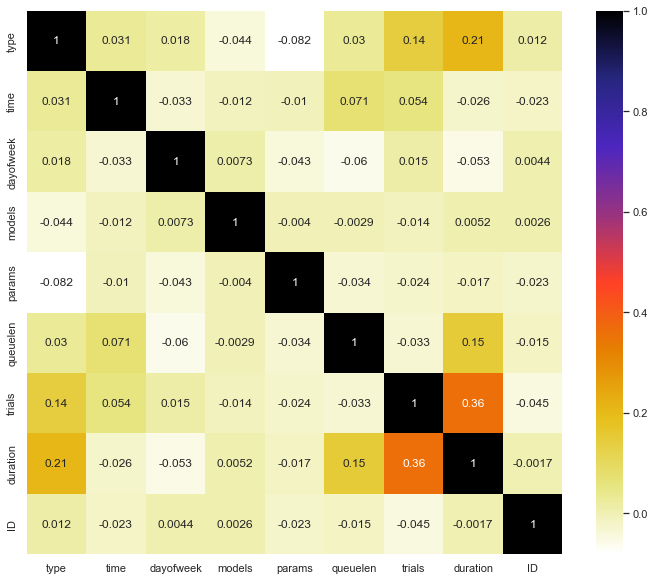

In [18]:
sns.set(font_scale = 1)
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
df_train['duration'].unique()

array([0., 1., 3., 2.])

### dropping 'id' as it is unique for all entities

In [20]:
train = df_train.drop('ID',axis = 1)
test = df_test.drop('ID',axis = 1)


### checking whether test columns contain categories other than train dataset 

In [21]:
print("no. of common elements in test and train data /// total unique values in test ")
for va in test.columns : 
    l2=(train[va].unique()).tolist()
    l1=(test[va].unique()).tolist()
    c=0
    uni =[]
    for i in l1:
        if  i in l2:
            uni.append(i)
            c= c+1
       

    print(va,":",c,"/// ",len(test[va].unique()),"\n")    

no. of common elements in test and train data /// total unique values in test 
type : 14 ///  15 

time : 462 ///  514 

dayofweek : 7 ///  7 

models : 71 ///  78 

params : 251 ///  748 

queuelen : 62 ///  90 

trials : 7 ///  7 



## data exploring

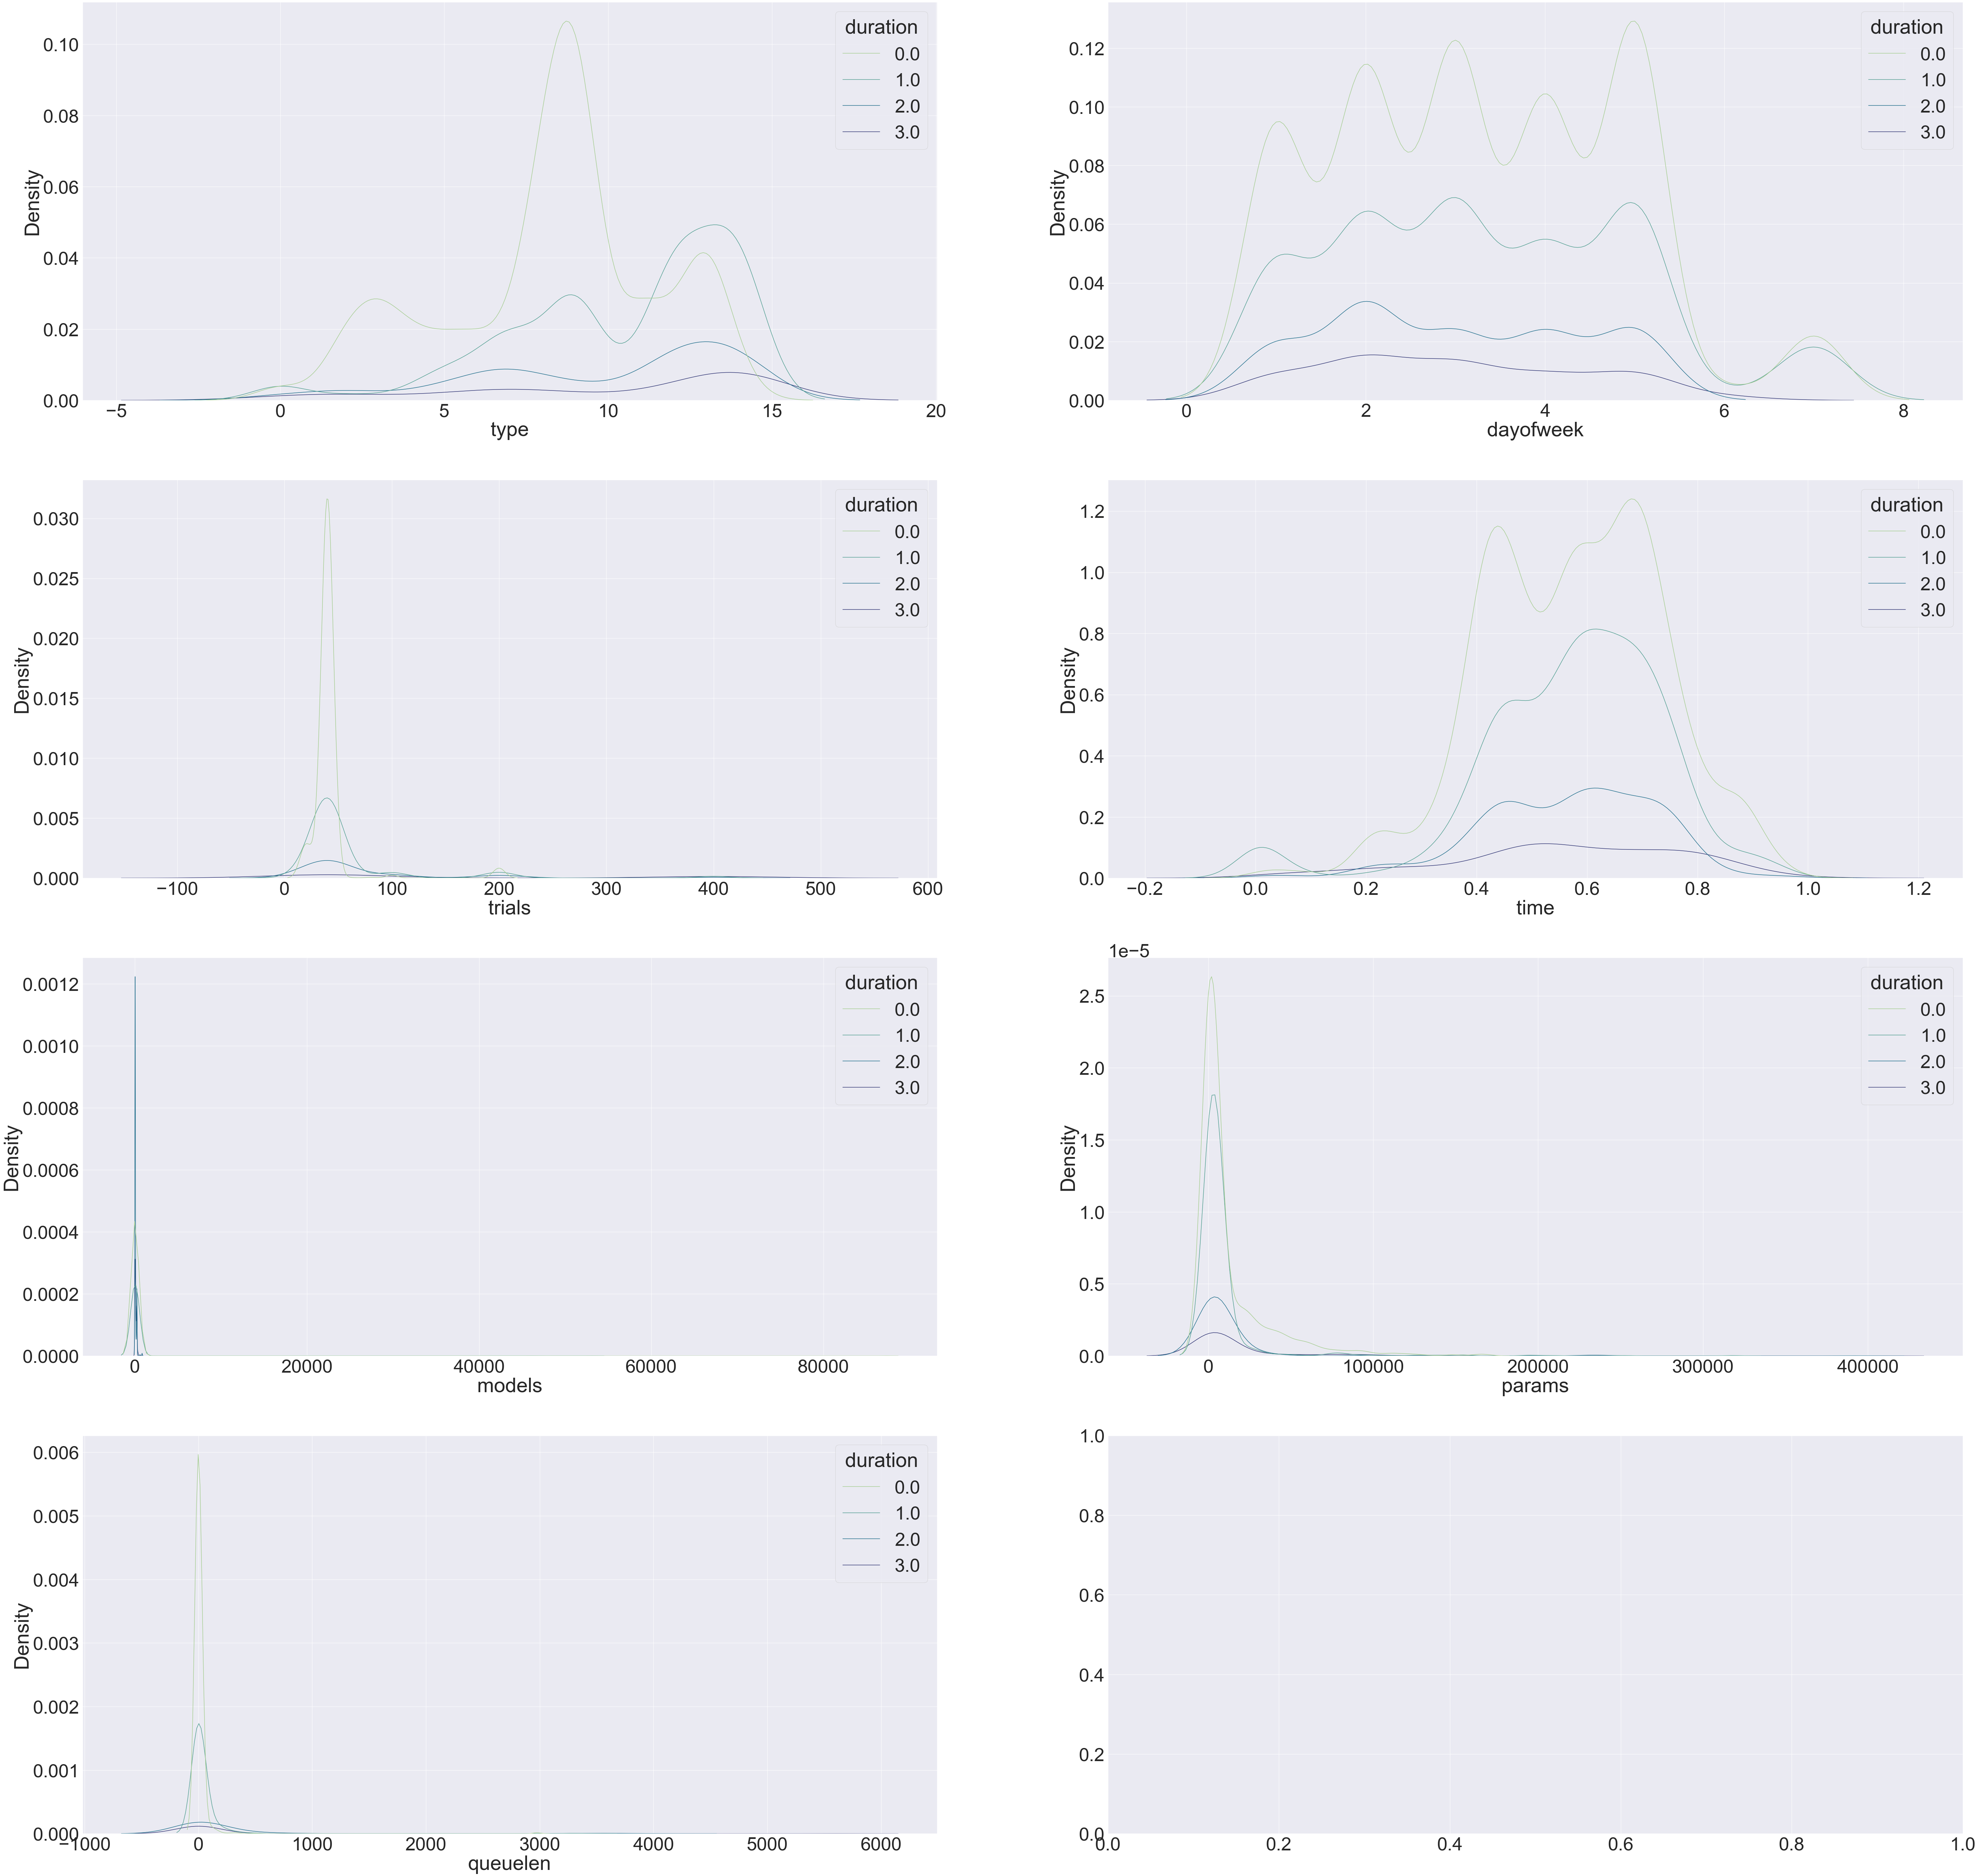

In [22]:
sns.set(font_scale = 5)
list = all_features 
fig, ax = plt.subplots(4,2, figsize=(100,100))
for i,col in enumerate(list):
  sns.kdeplot(ax = ax[i//2,i%2],x=col ,hue='duration',data= train,palette="crest")

In [23]:
train['type'].value_counts().sort_values(ascending = False)

9.0     708
14.0    408
13.0    374
12.0    328
8.0     279
7.0     221
11.0    168
5.0     132
2.0     124
3.0     109
6.0     108
4.0      75
0.0      67
10.0      3
Name: type, dtype: int64

In [24]:
test['type'].value_counts().sort_values(ascending = False)

9.0     184
14.0    112
13.0    104
12.0     76
7.0      71
8.0      66
11.0     47
3.0      33
5.0      27
6.0      24
2.0      23
4.0      16
0.0      15
10.0      3
Name: type, dtype: int64

In [25]:
train['duration'].value_counts().sort_values(ascending = False)

0.0    1767
1.0    1070
2.0     418
3.0     209
Name: duration, dtype: int64

In [26]:
train.groupby('type').mean()

,time,dayofweek,models,params,queuelen,trials,duration
type,,,,,,,
0.0,0.534142,2.820896,46.313433,4497.765625,62.597015,58.805970,1.119403
2.0,0.511195,2.467742,79.879032,33385.095652,0.000000,49.354839,0.774194
3.0,0.558766,3.183486,442.440367,1491.010101,0.000000,52.293578,0.018349
4.0,0.574575,3.786667,719.053333,1272.632353,0.000000,39.026667,0.266667
5.0,0.583140,3.340909,681.924242,10567.632000,178.522727,51.530303,0.886364
6.0,0.551910,2.981481,35.787037,1211.434343,62.972222,49.296296,0.518519
7.0,0.568338,3.113122,36.864253,2709.590244,82.642534,52.941176,1.325792
8.0,0.583729,3.132616,24.960573,42372.101562,0.000000,50.043011,0.071685
9.0,0.598981,3.707627,24.768362,1695.204651,47.987288,52.316384,0.395480


In [27]:
train.groupby('trials').mean()

,type,time,dayofweek,models,params,queuelen,duration
trials,,,,,,,
5.0,4.000000,0.238282,4.000000,52938.000000,991.000000,0.000000,1.000000
20.0,8.994536,0.506914,3.586538,37.259615,4614.347594,3.975962,0.471154
22.0,6.666667,0.640509,3.333333,9.500000,5385.666667,0.500000,0.166667
30.0,6.000000,0.655208,2.000000,38.500000,NaN,40.500000,1.500000
40.0,9.031323,0.574268,3.234244,76.248249,11539.173435,61.511204,0.644608
60.0,9.000000,0.716435,3.666667,7.000000,3697.333333,0.000000,0.333333
80.0,9.571429,0.544940,3.428571,15.571429,1700.333333,14.000000,0.857143
100.0,12.470085,0.592989,2.952000,21.696000,5327.717949,93.800000,1.336000
200.0,9.666667,0.554516,2.941935,4.154839,15844.496552,0.000000,1.083871


In [28]:
train.groupby('time').mean()

,type,dayofweek,models,params,queuelen,trials,duration
time,,,,,,,
0.000694,7.0,4.00,160.00,2705.000000,1.0,40.0,1.00
0.001389,13.0,4.00,160.00,2697.000000,19.0,40.0,1.00
0.003472,7.5,4.00,159.50,884.500000,6.0,40.0,1.00
0.004167,9.5,4.25,41.75,3054.666667,0.0,40.0,1.25
0.004861,10.5,2.50,15.75,1703.250000,0.0,40.0,1.00
...,...,...,...,...,...,...,...
0.958333,9.0,5.00,11.00,5750.000000,0.0,40.0,1.00
0.959028,9.0,5.00,7.00,3172.000000,0.0,40.0,0.00
0.967361,9.0,3.00,73.00,3566.000000,0.0,40.0,2.00


In [29]:
train.groupby('models').mean()


,type,time,dayofweek,params,queuelen,trials,duration
models,,,,,,,
1.0,8.786477,0.547395,3.116719,6700.347222,0.618297,94.037855,0.394322
2.0,9.173267,0.560074,3.349776,14998.471429,4.829596,75.784753,0.434978
3.0,9.311475,0.538765,3.459259,11759.796875,0.822222,44.311111,0.377778
4.0,8.477778,0.636223,3.030303,10922.819149,6.555556,44.868687,0.383838
5.0,8.943548,0.592381,3.426573,11884.671642,13.629371,38.755245,0.265734
...,...,...,...,...,...,...,...
828.0,7.500000,0.507812,3.000000,438.500000,2.500000,40.000000,1.750000
829.0,8.500000,0.366319,3.500000,1363.000000,0.000000,40.000000,2.000000
45938.0,3.000000,0.592329,3.000000,493.000000,0.000000,40.000000,1.000000


In [30]:
train.groupby('queuelen').mean().head(100)

,type,time,dayofweek,models,params,trials,duration
queuelen,,,,,,,
0.0,8.900679,0.570257,3.289092,98.599161,13025.424217,63.400076,0.678108
1.0,10.422414,0.530801,3.438462,32.723077,2609.112069,39.692308,0.530769
2.0,10.086207,0.566461,3.234375,35.281250,4734.473684,38.125000,0.546875
3.0,10.042553,0.545899,3.169811,42.396226,1077.739130,28.716981,1.320755
4.0,10.736842,0.599034,3.347826,23.478261,3339.631579,46.086957,0.478261
...,...,...,...,...,...,...,...
111.0,7.000000,0.607639,5.000000,17.000000,6305.000000,40.000000,1.000000
112.0,3.500000,0.522222,1.000000,17.000000,1440.000000,40.000000,0.500000
113.0,5.000000,0.602083,4.000000,10.000000,13982.000000,40.000000,1.000000


# Approach : collecting categories whose mean of duration is close to target values 

In [31]:
def mean_name(va):
    a=train.groupby(va).mean()
    l0=a.loc[a['duration']<0.12].index
    l1=a.loc[(a['duration']<1.12) &(a['duration']>0.88)].index
    l2=a.loc[(a['duration']<2.12) &(a['duration']>1.88)].index
    l3=a.loc[(a['duration']<3.12) &(a['duration']>2.88)].index
    return l0,l1,l2,l3

# more closer to target values

def mean_name_less(va):
    a=train.groupby(va).mean()
    l0=a.loc[a['duration']<0.1].index
    l1=a.loc[(a['duration']<1.1) &(a['duration']>0.9)].index
    l2=a.loc[(a['duration']<2.1) &(a['duration']>1.9)].index
    l3=a.loc[(a['duration']<3.1) &(a['duration']>2.9)].index
    return l0,l1,l2,l3

    
    

In [32]:
#models
l0,l1,l2,l3 = mean_name('models')
print(l0,'\n',l1,'\n',l2,'\n',l3)

Float64Index([37.0, 48.0, 54.0, 84.0, 101.0, 132.0, 291.0, 87293.0], dtype='float64', name='models') 
 Float64Index([   13.0,    20.0,    21.0,    26.0,    38.0,    42.0,    51.0,
                 55.0,    79.0,    81.0,    82.0,    86.0,    88.0,   141.0,
                160.0,   191.0, 45938.0, 52938.0],
             dtype='float64', name='models') 
 Float64Index([44.0, 65.0, 68.0, 69.0, 71.0, 73.0, 159.0, 342.0, 582.0, 829.0], dtype='float64', name='models') 
 Float64Index([76.0, 77.0, 80.0, 199.0, 200.0, 204.0, 205.0, 341.0, 602.0], dtype='float64', name='models')


In [33]:
#models
l0,l1,l2,l3 = mean_name_less('models')
print(l0,'\n',l1,'\n',l2,'\n',l3)

Float64Index([37.0, 48.0, 54.0, 84.0, 101.0, 132.0, 291.0, 87293.0], dtype='float64', name='models') 
 Float64Index([   13.0,    20.0,    21.0,    26.0,    38.0,    55.0,    79.0,
                 81.0,    86.0,    88.0,   141.0,   160.0,   191.0, 45938.0,
              52938.0],
             dtype='float64', name='models') 
 Float64Index([44.0, 65.0, 68.0, 69.0, 71.0, 73.0, 159.0, 342.0, 582.0, 829.0], dtype='float64', name='models') 
 Float64Index([76.0, 77.0, 80.0, 199.0, 200.0, 204.0, 205.0, 341.0, 602.0], dtype='float64', name='models')


# list of all categories following the above approach

In [34]:
for va in all_features:
    l0,l1,l2,l3 = mean_name_less(va)
    print(va,'\n 10',l0,'\n 20',l1,'\n 30',l2,'\n 40',l3)
    

type 
 10 Float64Index([3.0, 8.0, 10.0], dtype='float64', name='type') 
 20 Float64Index([], dtype='float64', name='type') 
 30 Float64Index([], dtype='float64', name='type') 
 40 Float64Index([], dtype='float64', name='type')
dayofweek 
 10 Float64Index([], dtype='float64', name='dayofweek') 
 20 Float64Index([6.0], dtype='float64', name='dayofweek') 
 30 Float64Index([], dtype='float64', name='dayofweek') 
 40 Float64Index([], dtype='float64', name='dayofweek')
trials 
 10 Float64Index([], dtype='float64', name='trials') 
 20 Float64Index([5.0, 200.0, 250.0, 300.0], dtype='float64', name='trials') 
 30 Float64Index([], dtype='float64', name='trials') 
 40 Float64Index([], dtype='float64', name='trials')
time 
 10 Float64Index([0.0166666666666666, 0.0263888888888888, 0.0583333333333333,
              0.0763888888888887, 0.0833333333333333, 0.1027777777777779,
                           0.125, 0.1854166666666666, 0.1881944444444445,
                         0.19375,
              ...
 

In [35]:
for va in all_features:
    l0,l1,l2,l3 = mean_name(va)
    print(va,'\n 10',l0,'\n 20',l1,'\n 30',l2,'\n 40',l3)
    

type 
 10 Float64Index([3.0, 8.0, 10.0], dtype='float64', name='type') 
 20 Float64Index([0.0, 5.0], dtype='float64', name='type') 
 30 Float64Index([], dtype='float64', name='type') 
 40 Float64Index([], dtype='float64', name='type')
dayofweek 
 10 Float64Index([], dtype='float64', name='dayofweek') 
 20 Float64Index([6.0], dtype='float64', name='dayofweek') 
 30 Float64Index([], dtype='float64', name='dayofweek') 
 40 Float64Index([], dtype='float64', name='dayofweek')
trials 
 10 Float64Index([], dtype='float64', name='trials') 
 20 Float64Index([5.0, 200.0, 250.0, 300.0], dtype='float64', name='trials') 
 30 Float64Index([], dtype='float64', name='trials') 
 40 Float64Index([], dtype='float64', name='trials')
time 
 10 Float64Index([0.0166666666666666, 0.0263888888888888, 0.0583333333333333,
              0.0763888888888887, 0.0833333333333333, 0.1027777777777779,
                           0.125, 0.1854166666666666, 0.1881944444444445,
                         0.19375,
           

# encoding categories as per the approach and filling nan with 0
# and changing target values so that our model can distinguish 0(nan) from 
# our target values


In [36]:
d={0.0:10,1.0:20,2.0:30,3.0:40}
train['duration']=train['duration'].map(d)

In [37]:
# for type
d_t = {3.0:10, 8.0:10, 10.0:10}
train['type_en']=train['type'].map(d_t)
train['type_en'].fillna(0,inplace=True)
test['type_en']=test['type'].map(d_t)
test['type_en'].fillna(0,inplace=True)

In [38]:
# for dayofweek
d_t = {6.0:20}
train['dow_en']=train['dayofweek'].map(d_t)
train['dow_en'].fillna(0,inplace=True)
test['dow_en']=test['dayofweek'].map(d_t)
test['dow_en'].fillna(0,inplace=True)

In [39]:
# for trials
d_t = {5.0:20, 200.0:20, 250.0:20, 300.0:20}
train['tr_en']=train['trials'].map(d_t)
train['tr_en'].fillna(0,inplace=True)
test['tr_en']=test['trials'].map(d_t)
test['tr_en'].fillna(0,inplace=True)

In [40]:
# for models
d_t = {37.0:10, 48.0:10, 54.0:10, 84.0:10, 101.0:10, 132.0:10, 291.0:10, 87293.0:10,
      13.0:20,    20.0:20,    21.0:20,    26.0:20,    38.0:20,    42.0:20,    51.0:20,
                 55.0:20,    79.0:20,    81.0:20,    82.0:20,    86.0:20,    88.0:20,   141.0:20,
                160.0:20,   191.0:20, 45938.0:20, 52938.0:20,
      44.0:30, 65.0:30, 68.0:30, 69.0:30, 71.0:30, 73.0:30, 159.0:30, 342.0:30, 582.0:30, 829.0:30,
      76.0:40, 77.0:40, 80.0:40, 199.0:40, 200.0:40, 204.0:40, 205.0:40, 341.0:40, 602.0:40}
train['mo_en']=train['models'].map(d_t)
train['mo_en'].fillna(0,inplace=True)
test['mo_en']=test['models'].map(d_t)
test['mo_en'].fillna(0,inplace=True)

In [41]:
#queuelen
l10 =[  25.0,   27.0,   36.0,   43.0,   53.0,   58.0,   63.0,   68.0,
                82.0,   92.0,   95.0,   98.0,  107.0,  114.0,  123.0,  136.0,
               144.0,  153.0,  155.0,  161.0,  201.0,  237.0,  320.0,  340.0,
              449.0,  511.0, 2969.0, 2970.0, 2975.0, 2990.0]
l20=[   5.0,    9.0,   10.0,   13.0,   15.0,   16.0,   17.0,   24.0,
                26.0,   28.0,   35.0,   37.0,   41.0,   42.0,   45.0,   48.0,
                54.0,   56.0,   57.0,   60.0,   66.0,   75.0,   76.0,   79.0,
                80.0,   83.0,   88.0,   94.0,   96.0,  103.0,  109.0,  111.0,
               113.0,  116.0,  118.0,  124.0,  125.0,  126.0,  127.0,  131.0,
               135.0,  145.0,  146.0,  147.0,  156.0,  164.0,  168.0,  169.0,
               178.0,  181.0,  183.0,  184.0,  185.0,  188.0,  189.0,  191.0,
               193.0,  196.0,  199.0,  205.0,  213.0,  215.0,  217.0,  218.0,
               220.0,  222.0,  224.0,  228.0,  268.0,  286.0,  287.0,  288.0,
               296.0,  309.0,  311.0,  314.0,  328.0,  338.0,  342.0,  346.0,
               362.0,  376.0,  379.0,  382.0,  397.0,  431.0,  489.0,  500.0,
               516.0,  726.0, 1718.0, 3002.0, 3056.0, 3238.0, 3268.0, 3340.0,
              3490.0]
l30=[  44.0,   74.0,   78.0,   81.0,  104.0,  120.0,  122.0,  132.0,
               157.0,  197.0,  202.0,  206.0,  214.0,  216.0,  219.0,  221.0,
               231.0,  242.0,  253.0,  261.0,  273.0,  275.0,  303.0,  349.0,
               350.0,  355.0,  356.0,  360.0,  366.0,  381.0,  390.0,  391.0,
               400.0,  417.0,  446.0,  451.0,  466.0,  477.0,  498.0,  503.0,
               545.0,  547.0,  549.0,  645.0,  662.0,  670.0,  731.0,  778.0,
               800.0,  803.0,  821.0,  917.0, 1038.0, 1099.0, 1846.0, 1942.0,
              2086.0, 2184.0, 2219.0, 2949.0, 2994.0, 3024.0, 3120.0, 3198.0,
              3276.0, 3374.0, 3427.0, 3494.0, 3517.0, 3526.0, 3539.0, 3611.0,
              3626.0, 3661.0, 3751.0, 3822.0, 3870.0, 3878.0]
l40=[40.0, 634.0, 3250.0, 5547.0]


d_t={} 
for i in l10:
    d_t[i]=10;
for i in l20:
    d_t[i]=20;
for i in l30:
    d_t[i]=30;    
for i in l40:
    d_t[i]=40;    
d_t    

{25.0: 10,
 27.0: 10,
 36.0: 10,
 43.0: 10,
 53.0: 10,
 58.0: 10,
 63.0: 10,
 68.0: 10,
 82.0: 10,
 92.0: 10,
 95.0: 10,
 98.0: 10,
 107.0: 10,
 114.0: 10,
 123.0: 10,
 136.0: 10,
 144.0: 10,
 153.0: 10,
 155.0: 10,
 161.0: 10,
 201.0: 10,
 237.0: 10,
 320.0: 10,
 340.0: 10,
 449.0: 10,
 511.0: 10,
 2969.0: 10,
 2970.0: 10,
 2975.0: 10,
 2990.0: 10,
 5.0: 20,
 9.0: 20,
 10.0: 20,
 13.0: 20,
 15.0: 20,
 16.0: 20,
 17.0: 20,
 24.0: 20,
 26.0: 20,
 28.0: 20,
 35.0: 20,
 37.0: 20,
 41.0: 20,
 42.0: 20,
 45.0: 20,
 48.0: 20,
 54.0: 20,
 56.0: 20,
 57.0: 20,
 60.0: 20,
 66.0: 20,
 75.0: 20,
 76.0: 20,
 79.0: 20,
 80.0: 20,
 83.0: 20,
 88.0: 20,
 94.0: 20,
 96.0: 20,
 103.0: 20,
 109.0: 20,
 111.0: 20,
 113.0: 20,
 116.0: 20,
 118.0: 20,
 124.0: 20,
 125.0: 20,
 126.0: 20,
 127.0: 20,
 131.0: 20,
 135.0: 20,
 145.0: 20,
 146.0: 20,
 147.0: 20,
 156.0: 20,
 164.0: 20,
 168.0: 20,
 169.0: 20,
 178.0: 20,
 181.0: 20,
 183.0: 20,
 184.0: 20,
 185.0: 20,
 188.0: 20,
 189.0: 20,
 191.0: 20,
 193.0:

In [42]:
# for queuelen

train['q_en']=train['queuelen'].map(d_t)
train['q_en'].fillna(0,inplace=True)
test['q_en']=test['queuelen'].map(d_t)
test['q_en'].fillna(0,inplace=True)

# as time is a continuous column therefore encoding range of time values with corresponding target values as per the above approach  

In [43]:
# for time
# ti = train.groupby('time').mean()
a= df_train.loc[df_train['time']<0.015,'ID']
a=a.to_list()
d_time={}
for i in a:
    d_time[i]=20
a= df_train.loc[(df_train['time']>0.92) & (df_train['time']<0.935),'ID']
a=a.to_list()  
for i in a:
    d_time[i]=10
d_time    

{433: 20,
 4252: 20,
 1158: 20,
 1919: 20,
 3957: 20,
 3400: 20,
 2325: 20,
 2364: 20,
 198: 20,
 3714: 20,
 2990: 20,
 3349: 20,
 4240: 20,
 961: 20,
 3917: 20,
 394: 20,
 3063: 20,
 3634: 20,
 2161: 20,
 4040: 20,
 1990: 20,
 1863: 20,
 1280: 20,
 2482: 20,
 3803: 20,
 2635: 20,
 625: 20,
 1895: 20,
 2625: 20,
 860: 20,
 1948: 10,
 985: 10,
 2004: 10,
 237: 10,
 714: 10,
 406: 10,
 326: 10,
 4328: 10,
 2982: 10,
 4188: 10,
 1008: 10,
 3327: 10,
 3446: 10}

In [44]:
# for time

train['time_en']=df_train['ID'].map(d_time)
train['time_en'].fillna(0,inplace=True)
test['time_en']=df_test['ID'].map(d_time)
test['time_en'].fillna(0,inplace=True)

In [45]:
train.head()

,type,time,dayofweek,models,params,queuelen,trials,duration,type_en,dow_en,tr_en,mo_en,q_en,time_en
0,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,10,0.0,0.0,0.0,20.0,0.0,0.0
1,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,10,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,10,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,10,10.0,0.0,0.0,0.0,0.0,0.0
4,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,10,0.0,0.0,0.0,0.0,0.0,0.0


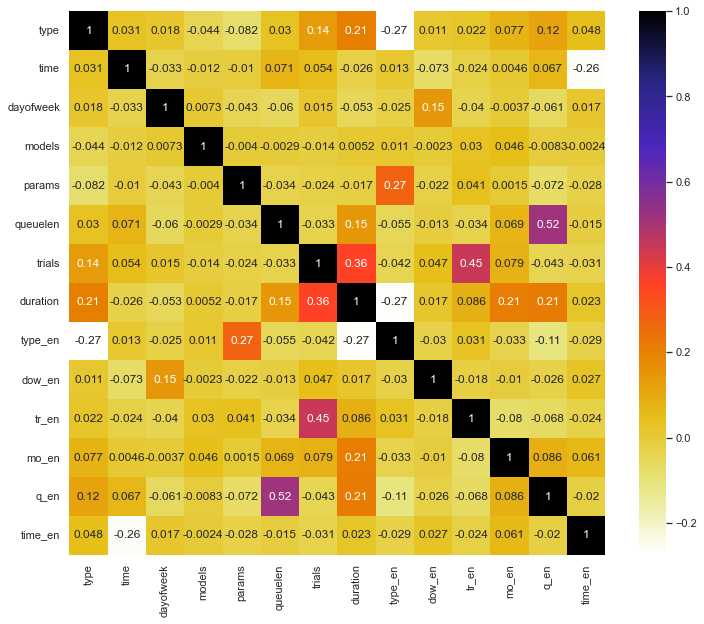

In [46]:
sns.set(font_scale = 1)
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# removing outliers

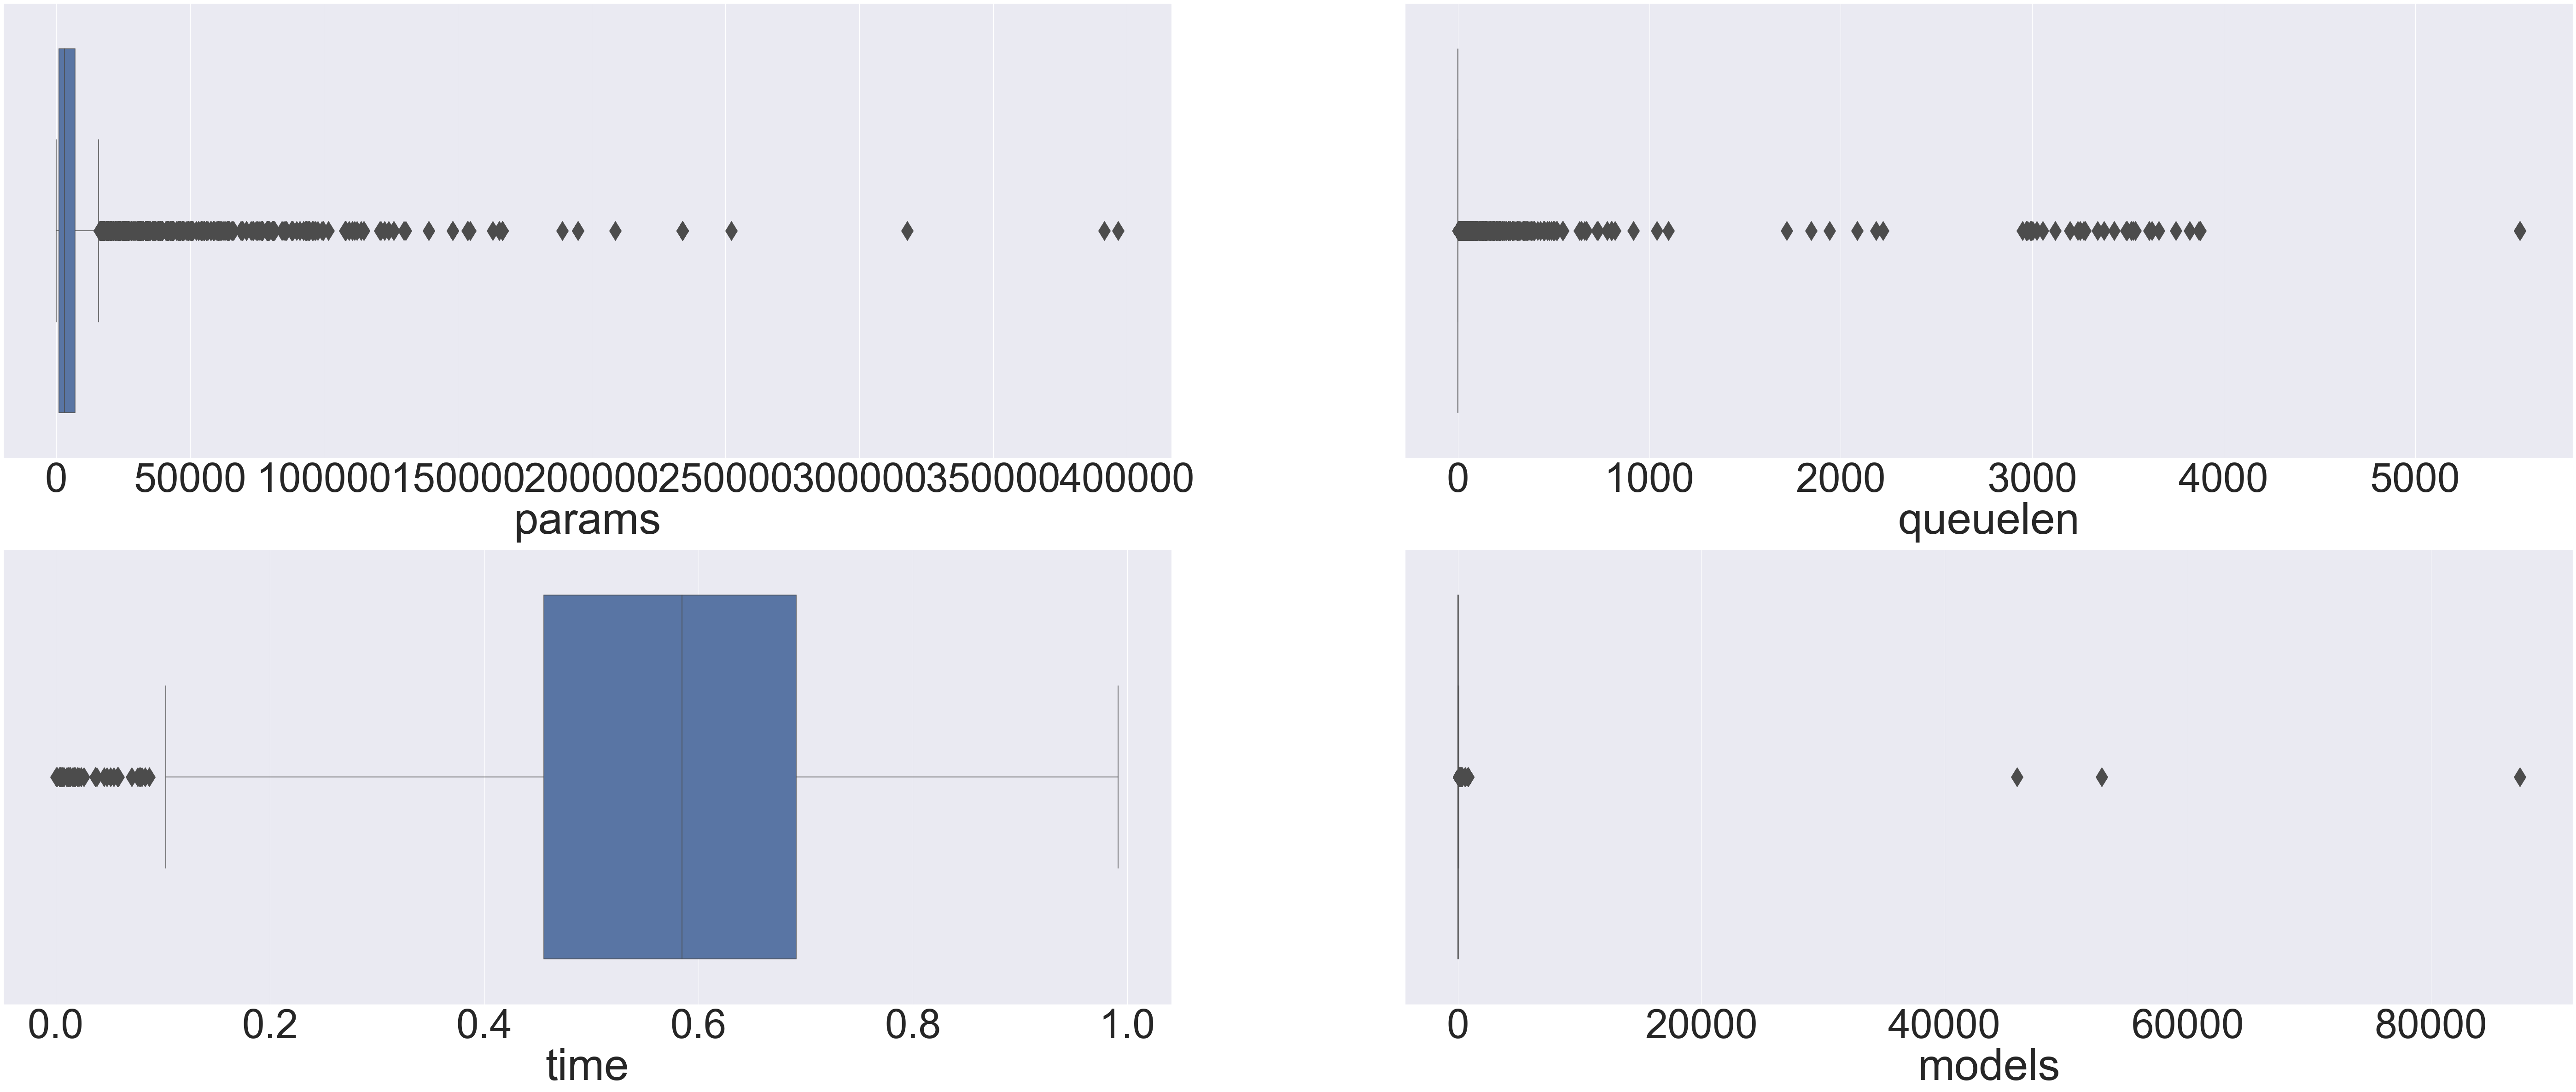

In [47]:
sns.set(font_scale = 8)
list = ['params','queuelen','time','models']
fig, ax = plt.subplots(2,2, figsize=(100,40))
for i,col in enumerate(list):
  sns.boxplot(ax = ax[i//2,i%2],x=col, data= train, fliersize=30)

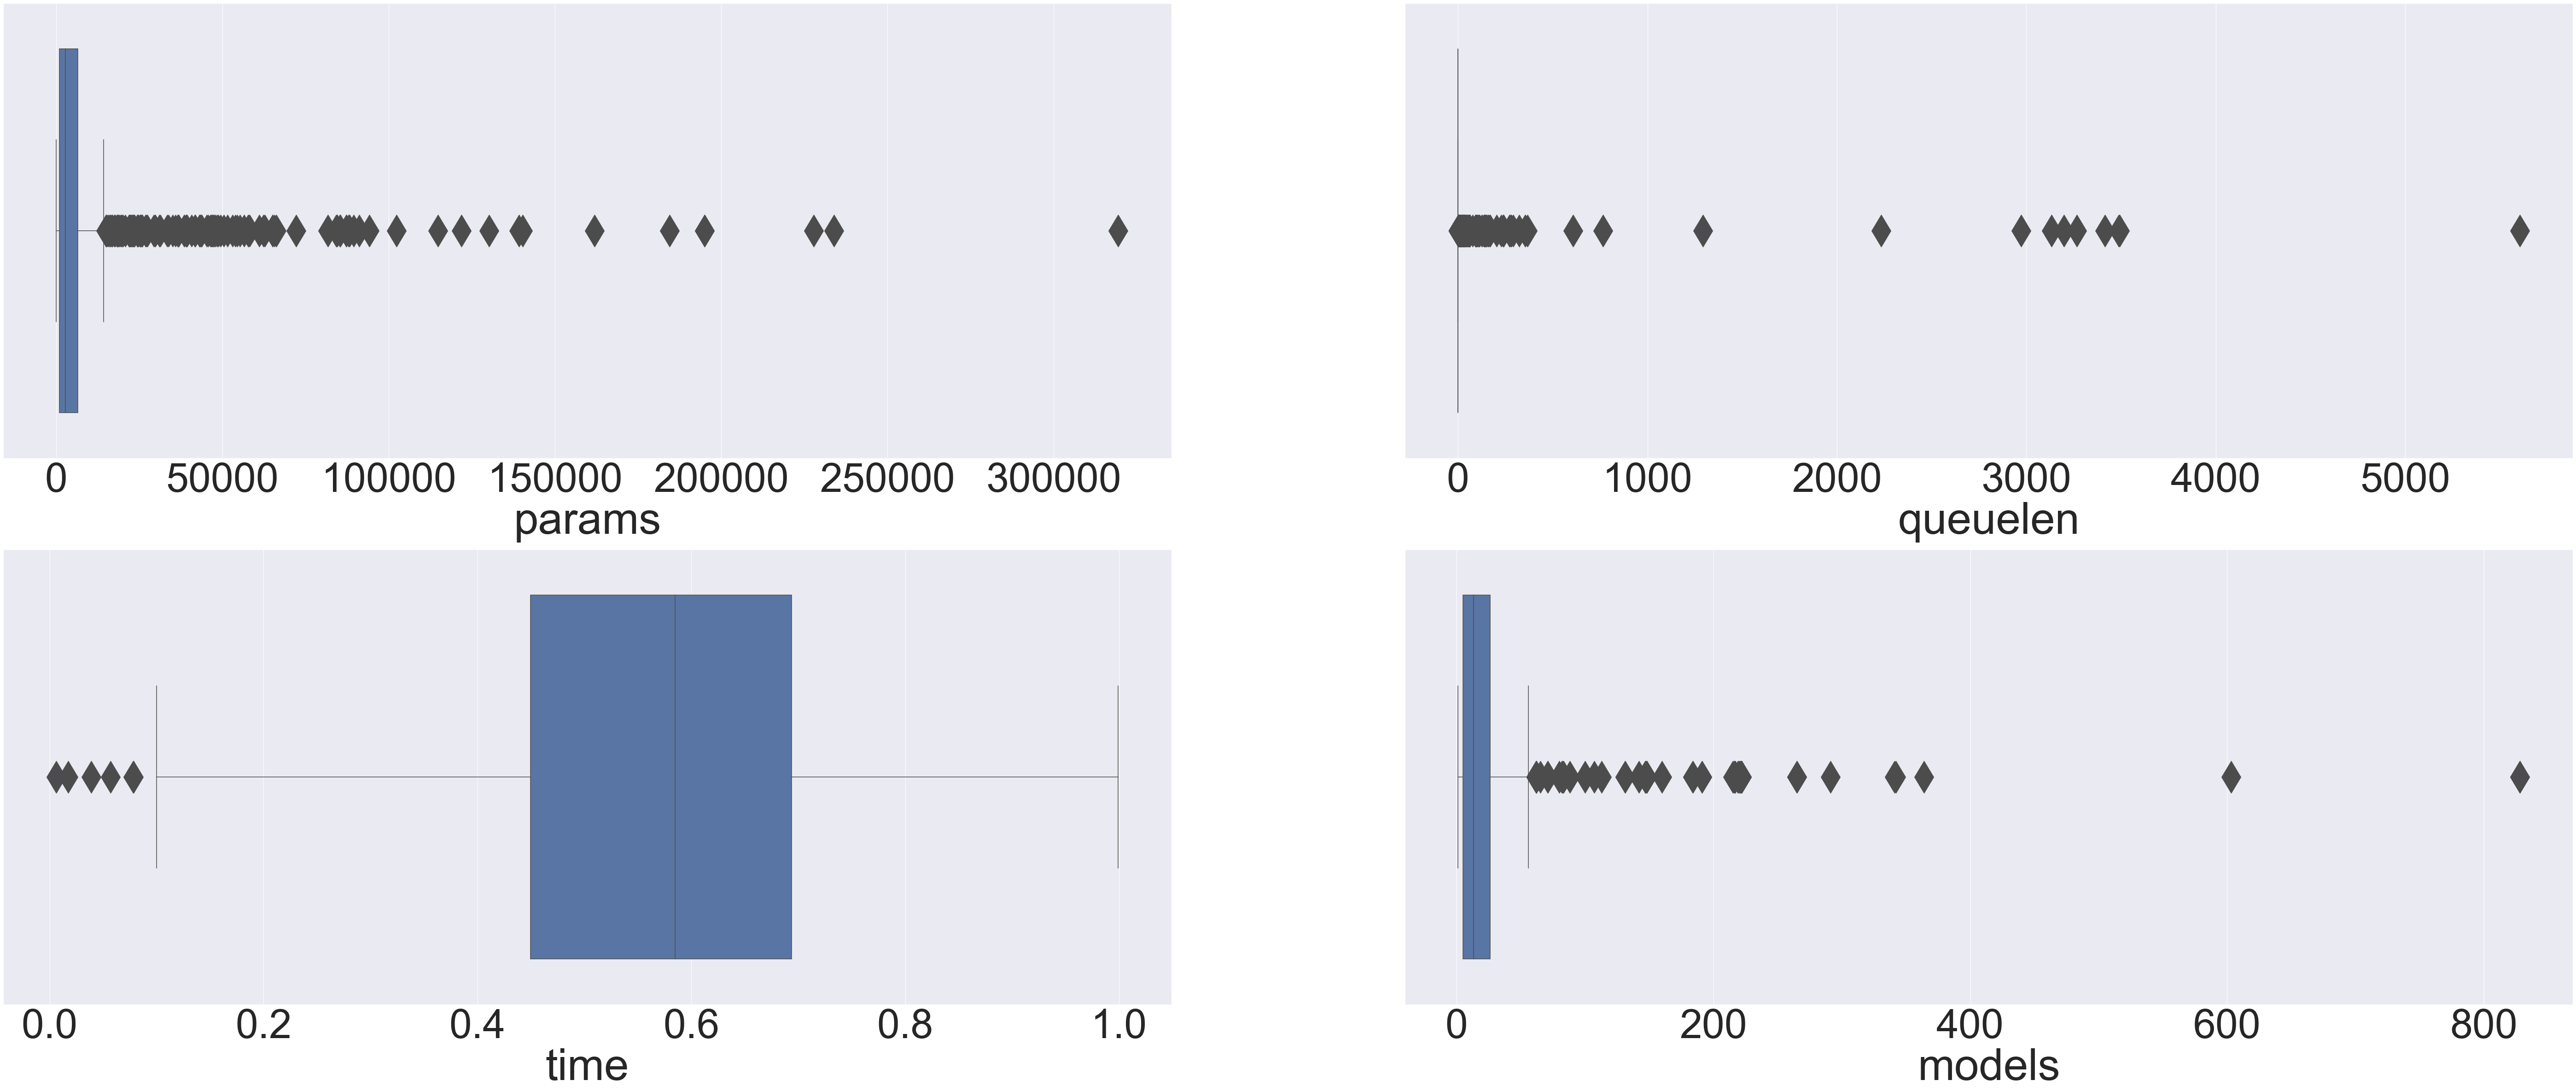

In [48]:
sns.set(font_scale = 8)
list =  ['params','queuelen','time','models']
fig, ax = plt.subplots(2,2, figsize=(100,40))
for i,col in enumerate(list):
  sns.boxplot(ax = ax[i//2,i%2],x=col, data= test, fliersize=50)

## as test data also has similar outliers in case of params,time and queuelen , hence not disturbing them
# removing outliers in models

In [49]:
train = train.loc[train['models']<850]

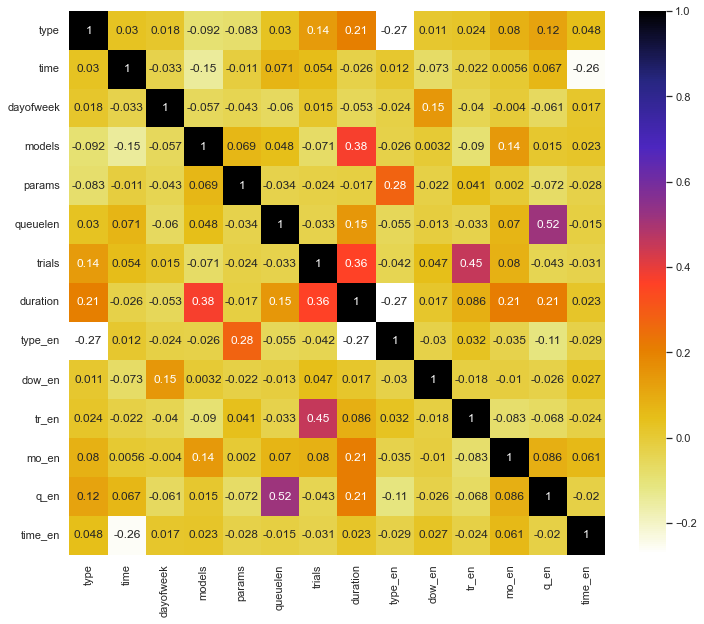

In [50]:
sns.set(font_scale = 1)
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

 # imbalanced data therefore ensembling techniques will be preferred 

In [51]:
for va in all_features :
    print(va,"\n")
    print(train[va].value_counts().sort_values(ascending = False)) # imbalanced data

type 

9.0     708
14.0    408
13.0    374
12.0    328
8.0     279
7.0     221
11.0    168
5.0     131
2.0     124
6.0     108
3.0     108
4.0      74
0.0      67
10.0      3
Name: type, dtype: int64
dayofweek 

5.0    740
2.0    717
3.0    715
4.0    587
1.0    547
7.0    131
6.0     24
Name: dayofweek, dtype: int64
trials 

40.0     2854
20.0      208
200.0     155
100.0     125
400.0      99
80.0        7
22.0        6
60.0        3
30.0        2
250.0       1
300.0       1
Name: trials, dtype: int64
time 

0.545139    23
0.545833    22
0.544444    18
0.699306    16
0.877778    16
            ..
0.020139     1
0.362500     1
0.245139     1
0.302083     1
0.723611     1
Name: time, Length: 872, dtype: int64
models 

1.0      317
13.0     240
2.0      223
8.0      170
5.0      143
        ... 
602.0      1
44.0       1
132.0      1
141.0      1
77.0       1
Name: models, Length: 104, dtype: int64
params 

79.0        10
80.0         9
73.0         8
3273.0       7
75.0         6
     

# randomly imputing nan values of type and params column 

In [52]:
def impute_nan_same(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=train[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    df[variable]=df[variable+'_random']
    df.drop(variable+'_random',axis = 1,inplace = True)   

In [53]:
impute_nan_same(train,'params')
impute_nan_same(test,'params')
impute_nan_same(train,'type')
impute_nan_same(test,'type')

In [54]:
test.isnull().sum()

type         0
time         0
dayofweek    0
models       0
params       0
queuelen     0
trials       0
type_en      0
dow_en       0
tr_en        0
mo_en        0
q_en         0
time_en      0
dtype: int64

In [55]:
train.isnull().sum()

type         0
time         0
dayofweek    0
models       0
params       0
queuelen     0
trials       0
duration     0
type_en      0
dow_en       0
tr_en        0
mo_en        0
q_en         0
time_en      0
dtype: int64

# train test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train.columns

Index(['type', 'time', 'dayofweek', 'models', 'params', 'queuelen', 'trials',
       'duration', 'type_en', 'dow_en', 'tr_en', 'mo_en', 'q_en', 'time_en'],
      dtype='object')

In [58]:
x_train = train.drop(['duration'],axis = 1)
y_train1 = train['duration']
X_train, X_test, y_train, y_true = train_test_split(x_train, y_train1, test_size=0.2, random_state=1)
x_test = test
x=np.array(x_train)
y=np.array(y_train1)


In [59]:
print(X_train.shape,y_train.shape,X_test.shape,x_test.shape)

(2768, 13) (2768,) (693, 13) (867, 13)


# cross validation

In [60]:
from sklearn.metrics import f1_score

## catboost

In [61]:
# cross validation
from catboost import CatBoostClassifier
model = CatBoostClassifier()
# Fit model
model.fit(X_train,y_train)
# Get predictions
y_pred = model.predict(X_test)
f1_score(y_true, y_pred,average='weighted')

Learning rate set to 0.083344
0:	learn: 1.3157427	total: 151ms	remaining: 2m 30s
1:	learn: 1.2569258	total: 155ms	remaining: 1m 17s
2:	learn: 1.2040957	total: 158ms	remaining: 52.4s
3:	learn: 1.1608512	total: 161ms	remaining: 40s
4:	learn: 1.1242549	total: 163ms	remaining: 32.5s
5:	learn: 1.0869264	total: 166ms	remaining: 27.6s
6:	learn: 1.0545363	total: 169ms	remaining: 24s
7:	learn: 1.0306849	total: 172ms	remaining: 21.4s
8:	learn: 1.0024592	total: 175ms	remaining: 19.3s
9:	learn: 0.9793667	total: 178ms	remaining: 17.6s
10:	learn: 0.9594951	total: 181ms	remaining: 16.3s
11:	learn: 0.9399796	total: 184ms	remaining: 15.2s
12:	learn: 0.9235071	total: 187ms	remaining: 14.2s
13:	learn: 0.9079500	total: 190ms	remaining: 13.4s
14:	learn: 0.8917395	total: 193ms	remaining: 12.7s
15:	learn: 0.8787965	total: 196ms	remaining: 12.1s
16:	learn: 0.8642366	total: 199ms	remaining: 11.5s
17:	learn: 0.8537758	total: 203ms	remaining: 11s
18:	learn: 0.8429225	total: 206ms	remaining: 10.6s
19:	learn: 0.83

165:	learn: 0.5057893	total: 684ms	remaining: 3.44s
166:	learn: 0.5050383	total: 688ms	remaining: 3.43s
167:	learn: 0.5040861	total: 691ms	remaining: 3.42s
168:	learn: 0.5028304	total: 695ms	remaining: 3.42s
169:	learn: 0.5014094	total: 699ms	remaining: 3.41s
170:	learn: 0.4996279	total: 702ms	remaining: 3.4s
171:	learn: 0.4981786	total: 706ms	remaining: 3.4s
172:	learn: 0.4972136	total: 709ms	remaining: 3.39s
173:	learn: 0.4965595	total: 713ms	remaining: 3.39s
174:	learn: 0.4958930	total: 717ms	remaining: 3.38s
175:	learn: 0.4948212	total: 721ms	remaining: 3.37s
176:	learn: 0.4938111	total: 724ms	remaining: 3.37s
177:	learn: 0.4930208	total: 728ms	remaining: 3.36s
178:	learn: 0.4924631	total: 731ms	remaining: 3.35s
179:	learn: 0.4910125	total: 734ms	remaining: 3.34s
180:	learn: 0.4903304	total: 738ms	remaining: 3.34s
181:	learn: 0.4893283	total: 741ms	remaining: 3.33s
182:	learn: 0.4881079	total: 744ms	remaining: 3.32s
183:	learn: 0.4873110	total: 748ms	remaining: 3.32s
184:	learn: 0.

325:	learn: 0.3921658	total: 1.23s	remaining: 2.55s
326:	learn: 0.3916635	total: 1.24s	remaining: 2.54s
327:	learn: 0.3912577	total: 1.24s	remaining: 2.54s
328:	learn: 0.3905966	total: 1.24s	remaining: 2.53s
329:	learn: 0.3900563	total: 1.25s	remaining: 2.53s
330:	learn: 0.3894845	total: 1.25s	remaining: 2.52s
331:	learn: 0.3888017	total: 1.25s	remaining: 2.52s
332:	learn: 0.3883409	total: 1.25s	remaining: 2.52s
333:	learn: 0.3879158	total: 1.26s	remaining: 2.51s
334:	learn: 0.3874493	total: 1.26s	remaining: 2.51s
335:	learn: 0.3871660	total: 1.27s	remaining: 2.5s
336:	learn: 0.3865001	total: 1.27s	remaining: 2.5s
337:	learn: 0.3859693	total: 1.27s	remaining: 2.49s
338:	learn: 0.3855538	total: 1.28s	remaining: 2.49s
339:	learn: 0.3852290	total: 1.28s	remaining: 2.48s
340:	learn: 0.3847000	total: 1.28s	remaining: 2.48s
341:	learn: 0.3841830	total: 1.28s	remaining: 2.47s
342:	learn: 0.3836789	total: 1.29s	remaining: 2.47s
343:	learn: 0.3830869	total: 1.29s	remaining: 2.46s
344:	learn: 0.

484:	learn: 0.3175069	total: 1.77s	remaining: 1.88s
485:	learn: 0.3171045	total: 1.78s	remaining: 1.88s
486:	learn: 0.3167864	total: 1.78s	remaining: 1.88s
487:	learn: 0.3164726	total: 1.78s	remaining: 1.87s
488:	learn: 0.3161633	total: 1.79s	remaining: 1.87s
489:	learn: 0.3159587	total: 1.79s	remaining: 1.86s
490:	learn: 0.3156509	total: 1.79s	remaining: 1.86s
491:	learn: 0.3150767	total: 1.8s	remaining: 1.85s
492:	learn: 0.3148272	total: 1.8s	remaining: 1.85s
493:	learn: 0.3143806	total: 1.8s	remaining: 1.85s
494:	learn: 0.3139848	total: 1.81s	remaining: 1.84s
495:	learn: 0.3135332	total: 1.81s	remaining: 1.84s
496:	learn: 0.3131464	total: 1.81s	remaining: 1.83s
497:	learn: 0.3126411	total: 1.82s	remaining: 1.83s
498:	learn: 0.3123298	total: 1.82s	remaining: 1.83s
499:	learn: 0.3119463	total: 1.82s	remaining: 1.82s
500:	learn: 0.3117412	total: 1.83s	remaining: 1.82s
501:	learn: 0.3114778	total: 1.83s	remaining: 1.81s
502:	learn: 0.3112148	total: 1.83s	remaining: 1.81s
503:	learn: 0.3

664:	learn: 0.2605776	total: 2.32s	remaining: 1.17s
665:	learn: 0.2603813	total: 2.32s	remaining: 1.17s
666:	learn: 0.2601480	total: 2.33s	remaining: 1.16s
667:	learn: 0.2599339	total: 2.33s	remaining: 1.16s
668:	learn: 0.2595031	total: 2.34s	remaining: 1.16s
669:	learn: 0.2592436	total: 2.34s	remaining: 1.15s
670:	learn: 0.2589390	total: 2.34s	remaining: 1.15s
671:	learn: 0.2587236	total: 2.35s	remaining: 1.15s
672:	learn: 0.2585377	total: 2.35s	remaining: 1.14s
673:	learn: 0.2582667	total: 2.35s	remaining: 1.14s
674:	learn: 0.2580068	total: 2.35s	remaining: 1.13s
675:	learn: 0.2577153	total: 2.36s	remaining: 1.13s
676:	learn: 0.2573907	total: 2.36s	remaining: 1.13s
677:	learn: 0.2572223	total: 2.36s	remaining: 1.12s
678:	learn: 0.2569253	total: 2.37s	remaining: 1.12s
679:	learn: 0.2566687	total: 2.37s	remaining: 1.11s
680:	learn: 0.2564659	total: 2.37s	remaining: 1.11s
681:	learn: 0.2561904	total: 2.38s	remaining: 1.11s
682:	learn: 0.2559860	total: 2.38s	remaining: 1.1s
683:	learn: 0

855:	learn: 0.2181529	total: 2.87s	remaining: 482ms
856:	learn: 0.2179517	total: 2.87s	remaining: 479ms
857:	learn: 0.2176160	total: 2.87s	remaining: 475ms
858:	learn: 0.2174286	total: 2.88s	remaining: 472ms
859:	learn: 0.2172440	total: 2.88s	remaining: 469ms
860:	learn: 0.2171007	total: 2.88s	remaining: 465ms
861:	learn: 0.2167892	total: 2.88s	remaining: 462ms
862:	learn: 0.2167038	total: 2.89s	remaining: 459ms
863:	learn: 0.2165681	total: 2.89s	remaining: 455ms
864:	learn: 0.2163220	total: 2.89s	remaining: 452ms
865:	learn: 0.2160143	total: 2.9s	remaining: 448ms
866:	learn: 0.2157626	total: 2.9s	remaining: 445ms
867:	learn: 0.2156767	total: 2.9s	remaining: 441ms
868:	learn: 0.2154569	total: 2.9s	remaining: 438ms
869:	learn: 0.2152949	total: 2.91s	remaining: 435ms
870:	learn: 0.2150540	total: 2.91s	remaining: 431ms
871:	learn: 0.2149258	total: 2.91s	remaining: 428ms
872:	learn: 0.2147368	total: 2.92s	remaining: 424ms
873:	learn: 0.2144514	total: 2.92s	remaining: 421ms
874:	learn: 0.21

0.8108247854149495

## xgboost

In [62]:
di={10:0,20:1,30:2,40:3}
y_train1 = train['duration'].map(di)
X_train, X_test, y_train, y_true = train_test_split(x_train, y_train1, test_size=0.2, random_state=0)
x_test = test
x=np.array(x_train)
y=np.array(y_train1)



In [63]:
import xgboost
from xgboost import XGBClassifier
model_2 = XGBClassifier()
# Fit model
model_2.fit(X_train,y_train)
# Get predictions
y_pred = model_2.predict(X_test)

f1_score(y_true, y_pred,average='weighted')

[00:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7956231559634629

## lgbm

In [64]:
import lightgbm as ltb
mosell = ltb.LGBMClassifier()
mosell.fit(X_train,y_train)
# Get predictions
y_pred = mosell.predict(X_test)
#score
f1_score(y_true, y_pred,average='weighted')

0.7942147357788972

## random forrest

In [65]:
from sklearn.ensemble import RandomForestClassifier

mosel = RandomForestClassifier(max_depth=2, random_state=0)

mosel.fit(X_train,y_train)
# Get predictions
y_pred = mosel.predict(X_test)

f1_score(y_true, y_pred,average='weighted')


0.43805177594333955

# hyper tuning cat boost since it gave good results on leaderboard

In [66]:
x_train = train.drop(['duration'],axis = 1)
y_train1 = train['duration']
X_train, X_test, y_train, y_true = train_test_split(x_train, y_train1, test_size=0.2, random_state=0)
x_test = test
x=np.array(x_train)
y=np.array(y_train1)


In [67]:
model1 = CatBoostClassifier()
grid = {'learning_rate': [0.01,0.03,0.05,0.07, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [ 3, 5, 7, 9]}
randomized_search_result = model1.randomized_search(grid,
                                                   X=x,
                                                   y=y)

0:	learn: 1.3454999	test: 1.3426350	best: 1.3426350 (0)	total: 6.34ms	remaining: 6.33s
1:	learn: 1.3106326	test: 1.3064562	best: 1.3064562 (1)	total: 7.95ms	remaining: 3.96s
2:	learn: 1.2756798	test: 1.2692085	best: 1.2692085 (2)	total: 9.45ms	remaining: 3.14s
3:	learn: 1.2443827	test: 1.2380239	best: 1.2380239 (3)	total: 10.9ms	remaining: 2.71s
4:	learn: 1.2223794	test: 1.2154538	best: 1.2154538 (4)	total: 12.4ms	remaining: 2.47s
5:	learn: 1.1959618	test: 1.1883647	best: 1.1883647 (5)	total: 13.8ms	remaining: 2.29s
6:	learn: 1.1735471	test: 1.1645696	best: 1.1645696 (6)	total: 15.3ms	remaining: 2.16s
7:	learn: 1.1522041	test: 1.1417707	best: 1.1417707 (7)	total: 16.7ms	remaining: 2.07s
8:	learn: 1.1320262	test: 1.1203268	best: 1.1203268 (8)	total: 18.2ms	remaining: 2s
9:	learn: 1.1110043	test: 1.0972163	best: 1.0972163 (9)	total: 19.6ms	remaining: 1.94s
10:	learn: 1.0946640	test: 1.0801374	best: 1.0801374 (10)	total: 21.1ms	remaining: 1.9s
11:	learn: 1.0817566	test: 1.0662330	best: 1.

109:	learn: 0.7154291	test: 0.6984314	best: 0.6984314 (109)	total: 179ms	remaining: 1.45s
110:	learn: 0.7138421	test: 0.6965949	best: 0.6965949 (110)	total: 181ms	remaining: 1.45s
111:	learn: 0.7130837	test: 0.6956795	best: 0.6956795 (111)	total: 182ms	remaining: 1.45s
112:	learn: 0.7114357	test: 0.6945620	best: 0.6945620 (112)	total: 184ms	remaining: 1.45s
113:	learn: 0.7103551	test: 0.6936519	best: 0.6936519 (113)	total: 186ms	remaining: 1.45s
114:	learn: 0.7087252	test: 0.6927603	best: 0.6927603 (114)	total: 188ms	remaining: 1.44s
115:	learn: 0.7082953	test: 0.6923604	best: 0.6923604 (115)	total: 190ms	remaining: 1.45s
116:	learn: 0.7075287	test: 0.6916990	best: 0.6916990 (116)	total: 192ms	remaining: 1.45s
117:	learn: 0.7062680	test: 0.6908839	best: 0.6908839 (117)	total: 194ms	remaining: 1.45s
118:	learn: 0.7052327	test: 0.6897776	best: 0.6897776 (118)	total: 196ms	remaining: 1.45s
119:	learn: 0.7045084	test: 0.6890913	best: 0.6890913 (119)	total: 198ms	remaining: 1.45s
120:	learn

211:	learn: 0.6235972	test: 0.6276285	best: 0.6276285 (211)	total: 361ms	remaining: 1.34s
212:	learn: 0.6227204	test: 0.6266984	best: 0.6266984 (212)	total: 362ms	remaining: 1.34s
213:	learn: 0.6225253	test: 0.6267373	best: 0.6266984 (212)	total: 364ms	remaining: 1.34s
214:	learn: 0.6218130	test: 0.6263382	best: 0.6263382 (214)	total: 366ms	remaining: 1.34s
215:	learn: 0.6204295	test: 0.6256135	best: 0.6256135 (215)	total: 368ms	remaining: 1.33s
216:	learn: 0.6193956	test: 0.6247520	best: 0.6247520 (216)	total: 370ms	remaining: 1.33s
217:	learn: 0.6185716	test: 0.6238555	best: 0.6238555 (217)	total: 372ms	remaining: 1.33s
218:	learn: 0.6174354	test: 0.6235367	best: 0.6235367 (218)	total: 374ms	remaining: 1.33s
219:	learn: 0.6169990	test: 0.6232551	best: 0.6232551 (219)	total: 375ms	remaining: 1.33s
220:	learn: 0.6164869	test: 0.6229944	best: 0.6229944 (220)	total: 377ms	remaining: 1.33s
221:	learn: 0.6159979	test: 0.6226586	best: 0.6226586 (221)	total: 379ms	remaining: 1.33s
222:	learn

312:	learn: 0.5669968	test: 0.5932270	best: 0.5932270 (312)	total: 541ms	remaining: 1.19s
313:	learn: 0.5661819	test: 0.5929649	best: 0.5929649 (313)	total: 543ms	remaining: 1.19s
314:	learn: 0.5659705	test: 0.5927691	best: 0.5927691 (314)	total: 545ms	remaining: 1.18s
315:	learn: 0.5657026	test: 0.5924897	best: 0.5924897 (315)	total: 546ms	remaining: 1.18s
316:	learn: 0.5650479	test: 0.5922276	best: 0.5922276 (316)	total: 548ms	remaining: 1.18s
317:	learn: 0.5648972	test: 0.5921272	best: 0.5921272 (317)	total: 550ms	remaining: 1.18s
318:	learn: 0.5645400	test: 0.5920859	best: 0.5920859 (318)	total: 551ms	remaining: 1.18s
319:	learn: 0.5639438	test: 0.5918739	best: 0.5918739 (319)	total: 553ms	remaining: 1.17s
320:	learn: 0.5636103	test: 0.5915368	best: 0.5915368 (320)	total: 554ms	remaining: 1.17s
321:	learn: 0.5631814	test: 0.5913433	best: 0.5913433 (321)	total: 556ms	remaining: 1.17s
322:	learn: 0.5627771	test: 0.5910087	best: 0.5910087 (322)	total: 558ms	remaining: 1.17s
323:	learn

415:	learn: 0.5282547	test: 0.5732917	best: 0.5732917 (415)	total: 721ms	remaining: 1.01s
416:	learn: 0.5279997	test: 0.5730383	best: 0.5730383 (416)	total: 723ms	remaining: 1.01s
417:	learn: 0.5277163	test: 0.5730915	best: 0.5730383 (416)	total: 724ms	remaining: 1.01s
418:	learn: 0.5275827	test: 0.5730547	best: 0.5730383 (416)	total: 726ms	remaining: 1.01s
419:	learn: 0.5273022	test: 0.5730647	best: 0.5730383 (416)	total: 728ms	remaining: 1s
420:	learn: 0.5269687	test: 0.5730600	best: 0.5730383 (416)	total: 729ms	remaining: 1s
421:	learn: 0.5266841	test: 0.5731306	best: 0.5730383 (416)	total: 731ms	remaining: 1s
422:	learn: 0.5265761	test: 0.5731583	best: 0.5730383 (416)	total: 733ms	remaining: 1000ms
423:	learn: 0.5263176	test: 0.5730072	best: 0.5730072 (423)	total: 734ms	remaining: 998ms
424:	learn: 0.5259280	test: 0.5729425	best: 0.5729425 (424)	total: 736ms	remaining: 996ms
425:	learn: 0.5254599	test: 0.5726371	best: 0.5726371 (425)	total: 738ms	remaining: 994ms
426:	learn: 0.5252

521:	learn: 0.4962628	test: 0.5606612	best: 0.5606612 (521)	total: 903ms	remaining: 827ms
522:	learn: 0.4960913	test: 0.5606439	best: 0.5606439 (522)	total: 904ms	remaining: 825ms
523:	learn: 0.4959643	test: 0.5605561	best: 0.5605561 (523)	total: 906ms	remaining: 823ms
524:	learn: 0.4958469	test: 0.5604340	best: 0.5604340 (524)	total: 908ms	remaining: 821ms
525:	learn: 0.4955059	test: 0.5603876	best: 0.5603876 (525)	total: 910ms	remaining: 820ms
526:	learn: 0.4952923	test: 0.5603556	best: 0.5603556 (526)	total: 911ms	remaining: 818ms
527:	learn: 0.4950047	test: 0.5604376	best: 0.5603556 (526)	total: 913ms	remaining: 816ms
528:	learn: 0.4944361	test: 0.5599057	best: 0.5599057 (528)	total: 915ms	remaining: 815ms
529:	learn: 0.4939576	test: 0.5598156	best: 0.5598156 (529)	total: 917ms	remaining: 813ms
530:	learn: 0.4936086	test: 0.5598340	best: 0.5598156 (529)	total: 918ms	remaining: 811ms
531:	learn: 0.4933256	test: 0.5596623	best: 0.5596623 (531)	total: 920ms	remaining: 809ms
532:	learn

624:	learn: 0.4693146	test: 0.5523838	best: 0.5521998 (619)	total: 1.08s	remaining: 650ms
625:	learn: 0.4690139	test: 0.5522172	best: 0.5521998 (619)	total: 1.08s	remaining: 648ms
626:	learn: 0.4687429	test: 0.5524058	best: 0.5521998 (619)	total: 1.09s	remaining: 647ms
627:	learn: 0.4685743	test: 0.5523867	best: 0.5521998 (619)	total: 1.09s	remaining: 645ms
628:	learn: 0.4684909	test: 0.5523559	best: 0.5521998 (619)	total: 1.09s	remaining: 643ms
629:	learn: 0.4683482	test: 0.5523145	best: 0.5521998 (619)	total: 1.09s	remaining: 641ms
630:	learn: 0.4681248	test: 0.5524293	best: 0.5521998 (619)	total: 1.09s	remaining: 640ms
631:	learn: 0.4679682	test: 0.5524729	best: 0.5521998 (619)	total: 1.09s	remaining: 638ms
632:	learn: 0.4677120	test: 0.5524556	best: 0.5521998 (619)	total: 1.1s	remaining: 636ms
633:	learn: 0.4675915	test: 0.5523184	best: 0.5521998 (619)	total: 1.1s	remaining: 635ms
634:	learn: 0.4673188	test: 0.5520731	best: 0.5520731 (634)	total: 1.1s	remaining: 633ms
635:	learn: 0

729:	learn: 0.4470184	test: 0.5457342	best: 0.5457340 (728)	total: 1.26s	remaining: 468ms
730:	learn: 0.4469143	test: 0.5457343	best: 0.5457340 (728)	total: 1.27s	remaining: 466ms
731:	learn: 0.4467045	test: 0.5456319	best: 0.5456319 (731)	total: 1.27s	remaining: 465ms
732:	learn: 0.4466250	test: 0.5456227	best: 0.5456227 (732)	total: 1.27s	remaining: 463ms
733:	learn: 0.4464471	test: 0.5455274	best: 0.5455274 (733)	total: 1.27s	remaining: 461ms
734:	learn: 0.4463097	test: 0.5454340	best: 0.5454340 (734)	total: 1.27s	remaining: 459ms
735:	learn: 0.4459611	test: 0.5453363	best: 0.5453363 (735)	total: 1.27s	remaining: 458ms
736:	learn: 0.4457608	test: 0.5453050	best: 0.5453050 (736)	total: 1.28s	remaining: 456ms
737:	learn: 0.4456285	test: 0.5454169	best: 0.5453050 (736)	total: 1.28s	remaining: 454ms
738:	learn: 0.4453346	test: 0.5453167	best: 0.5453050 (736)	total: 1.28s	remaining: 453ms
739:	learn: 0.4452390	test: 0.5453581	best: 0.5453050 (736)	total: 1.28s	remaining: 451ms
740:	learn

833:	learn: 0.4268156	test: 0.5407355	best: 0.5406913 (832)	total: 1.45s	remaining: 288ms
834:	learn: 0.4265577	test: 0.5406976	best: 0.5406913 (832)	total: 1.45s	remaining: 286ms
835:	learn: 0.4263356	test: 0.5405603	best: 0.5405603 (835)	total: 1.45s	remaining: 284ms
836:	learn: 0.4261832	test: 0.5403960	best: 0.5403960 (836)	total: 1.45s	remaining: 283ms
837:	learn: 0.4260726	test: 0.5402553	best: 0.5402553 (837)	total: 1.45s	remaining: 281ms
838:	learn: 0.4259045	test: 0.5402808	best: 0.5402553 (837)	total: 1.46s	remaining: 279ms
839:	learn: 0.4258065	test: 0.5401910	best: 0.5401910 (839)	total: 1.46s	remaining: 277ms
840:	learn: 0.4255597	test: 0.5399730	best: 0.5399730 (840)	total: 1.46s	remaining: 276ms
841:	learn: 0.4253147	test: 0.5399144	best: 0.5399144 (841)	total: 1.46s	remaining: 274ms
842:	learn: 0.4252318	test: 0.5397713	best: 0.5397713 (842)	total: 1.46s	remaining: 272ms
843:	learn: 0.4249930	test: 0.5397933	best: 0.5397713 (842)	total: 1.46s	remaining: 271ms
844:	learn

930:	learn: 0.4104695	test: 0.5364847	best: 0.5364429 (922)	total: 1.63s	remaining: 121ms
931:	learn: 0.4104009	test: 0.5363981	best: 0.5363981 (931)	total: 1.63s	remaining: 119ms
932:	learn: 0.4103163	test: 0.5363412	best: 0.5363412 (932)	total: 1.63s	remaining: 117ms
933:	learn: 0.4100407	test: 0.5364549	best: 0.5363412 (932)	total: 1.64s	remaining: 116ms
934:	learn: 0.4098625	test: 0.5364261	best: 0.5363412 (932)	total: 1.64s	remaining: 114ms
935:	learn: 0.4096486	test: 0.5362382	best: 0.5362382 (935)	total: 1.64s	remaining: 112ms
936:	learn: 0.4094651	test: 0.5361378	best: 0.5361378 (936)	total: 1.64s	remaining: 110ms
937:	learn: 0.4091784	test: 0.5360968	best: 0.5360968 (937)	total: 1.64s	remaining: 109ms
938:	learn: 0.4090540	test: 0.5360065	best: 0.5360065 (938)	total: 1.65s	remaining: 107ms
939:	learn: 0.4087080	test: 0.5359979	best: 0.5359979 (939)	total: 1.65s	remaining: 105ms
940:	learn: 0.4085776	test: 0.5359135	best: 0.5359135 (940)	total: 1.65s	remaining: 104ms
941:	learn

115:	learn: 0.6291976	test: 0.6285932	best: 0.6285932 (115)	total: 208ms	remaining: 1.58s
116:	learn: 0.6281511	test: 0.6273576	best: 0.6273576 (116)	total: 210ms	remaining: 1.58s
117:	learn: 0.6277770	test: 0.6271427	best: 0.6271427 (117)	total: 212ms	remaining: 1.58s
118:	learn: 0.6267313	test: 0.6262355	best: 0.6262355 (118)	total: 213ms	remaining: 1.58s
119:	learn: 0.6261037	test: 0.6260895	best: 0.6260895 (119)	total: 215ms	remaining: 1.58s
120:	learn: 0.6248187	test: 0.6248786	best: 0.6248786 (120)	total: 217ms	remaining: 1.57s
121:	learn: 0.6244258	test: 0.6248256	best: 0.6248256 (121)	total: 219ms	remaining: 1.57s
122:	learn: 0.6237410	test: 0.6242509	best: 0.6242509 (122)	total: 221ms	remaining: 1.57s
123:	learn: 0.6228613	test: 0.6239459	best: 0.6239459 (123)	total: 222ms	remaining: 1.57s
124:	learn: 0.6219150	test: 0.6231906	best: 0.6231906 (124)	total: 224ms	remaining: 1.57s
125:	learn: 0.6202696	test: 0.6221479	best: 0.6221479 (125)	total: 226ms	remaining: 1.57s
126:	learn

216:	learn: 0.5453128	test: 0.5764995	best: 0.5764995 (216)	total: 389ms	remaining: 1.4s
217:	learn: 0.5448331	test: 0.5763329	best: 0.5763329 (217)	total: 391ms	remaining: 1.4s
218:	learn: 0.5445384	test: 0.5760618	best: 0.5760618 (218)	total: 392ms	remaining: 1.4s
219:	learn: 0.5435663	test: 0.5758728	best: 0.5758728 (219)	total: 394ms	remaining: 1.4s
220:	learn: 0.5428160	test: 0.5755189	best: 0.5755189 (220)	total: 396ms	remaining: 1.4s
221:	learn: 0.5420932	test: 0.5755762	best: 0.5755189 (220)	total: 398ms	remaining: 1.39s
222:	learn: 0.5418776	test: 0.5753559	best: 0.5753559 (222)	total: 400ms	remaining: 1.39s
223:	learn: 0.5411217	test: 0.5749626	best: 0.5749626 (223)	total: 402ms	remaining: 1.39s
224:	learn: 0.5404904	test: 0.5745978	best: 0.5745978 (224)	total: 403ms	remaining: 1.39s
225:	learn: 0.5399595	test: 0.5742615	best: 0.5742615 (225)	total: 405ms	remaining: 1.39s
226:	learn: 0.5397326	test: 0.5743511	best: 0.5742615 (225)	total: 407ms	remaining: 1.39s
227:	learn: 0.5

317:	learn: 0.4939956	test: 0.5555706	best: 0.5555706 (317)	total: 571ms	remaining: 1.22s
318:	learn: 0.4936221	test: 0.5556182	best: 0.5555706 (317)	total: 573ms	remaining: 1.22s
319:	learn: 0.4929255	test: 0.5555462	best: 0.5555462 (319)	total: 575ms	remaining: 1.22s
320:	learn: 0.4925660	test: 0.5555863	best: 0.5555462 (319)	total: 576ms	remaining: 1.22s
321:	learn: 0.4919560	test: 0.5553437	best: 0.5553437 (321)	total: 578ms	remaining: 1.22s
322:	learn: 0.4915457	test: 0.5549985	best: 0.5549985 (322)	total: 580ms	remaining: 1.22s
323:	learn: 0.4911280	test: 0.5545995	best: 0.5545995 (323)	total: 582ms	remaining: 1.21s
324:	learn: 0.4907229	test: 0.5545037	best: 0.5545037 (324)	total: 584ms	remaining: 1.21s
325:	learn: 0.4900847	test: 0.5543857	best: 0.5543857 (325)	total: 586ms	remaining: 1.21s
326:	learn: 0.4896581	test: 0.5545421	best: 0.5543857 (325)	total: 587ms	remaining: 1.21s
327:	learn: 0.4893934	test: 0.5542952	best: 0.5542952 (327)	total: 589ms	remaining: 1.21s
328:	learn

421:	learn: 0.4542710	test: 0.5425542	best: 0.5425542 (421)	total: 749ms	remaining: 1.03s
422:	learn: 0.4542049	test: 0.5425569	best: 0.5425542 (421)	total: 751ms	remaining: 1.02s
423:	learn: 0.4537599	test: 0.5427155	best: 0.5425542 (421)	total: 753ms	remaining: 1.02s
424:	learn: 0.4535289	test: 0.5426509	best: 0.5425542 (421)	total: 755ms	remaining: 1.02s
425:	learn: 0.4532062	test: 0.5424607	best: 0.5424607 (425)	total: 756ms	remaining: 1.02s
426:	learn: 0.4531250	test: 0.5425294	best: 0.5424607 (425)	total: 758ms	remaining: 1.02s
427:	learn: 0.4529209	test: 0.5422068	best: 0.5422068 (427)	total: 759ms	remaining: 1.01s
428:	learn: 0.4526890	test: 0.5422452	best: 0.5422068 (427)	total: 761ms	remaining: 1.01s
429:	learn: 0.4524384	test: 0.5421264	best: 0.5421264 (429)	total: 763ms	remaining: 1.01s
430:	learn: 0.4522123	test: 0.5422344	best: 0.5421264 (429)	total: 765ms	remaining: 1.01s
431:	learn: 0.4519201	test: 0.5424033	best: 0.5421264 (429)	total: 766ms	remaining: 1.01s
432:	learn

525:	learn: 0.4218666	test: 0.5380350	best: 0.5378049 (523)	total: 932ms	remaining: 840ms
526:	learn: 0.4216577	test: 0.5381283	best: 0.5378049 (523)	total: 934ms	remaining: 839ms
527:	learn: 0.4213844	test: 0.5379538	best: 0.5378049 (523)	total: 936ms	remaining: 837ms
528:	learn: 0.4209372	test: 0.5377795	best: 0.5377795 (528)	total: 938ms	remaining: 835ms
529:	learn: 0.4206127	test: 0.5378063	best: 0.5377795 (528)	total: 940ms	remaining: 833ms
530:	learn: 0.4201832	test: 0.5378204	best: 0.5377795 (528)	total: 941ms	remaining: 831ms
531:	learn: 0.4199482	test: 0.5376451	best: 0.5376451 (531)	total: 943ms	remaining: 830ms
532:	learn: 0.4198593	test: 0.5375438	best: 0.5375438 (532)	total: 945ms	remaining: 828ms
533:	learn: 0.4194931	test: 0.5373266	best: 0.5373266 (533)	total: 947ms	remaining: 826ms
534:	learn: 0.4192759	test: 0.5370392	best: 0.5370392 (534)	total: 948ms	remaining: 824ms
535:	learn: 0.4190463	test: 0.5368424	best: 0.5368424 (535)	total: 950ms	remaining: 822ms
536:	learn

629:	learn: 0.3938194	test: 0.5334601	best: 0.5333183 (625)	total: 1.11s	remaining: 654ms
630:	learn: 0.3936210	test: 0.5333723	best: 0.5333183 (625)	total: 1.12s	remaining: 653ms
631:	learn: 0.3933640	test: 0.5333799	best: 0.5333183 (625)	total: 1.12s	remaining: 651ms
632:	learn: 0.3930537	test: 0.5329293	best: 0.5329293 (632)	total: 1.12s	remaining: 649ms
633:	learn: 0.3929330	test: 0.5328007	best: 0.5328007 (633)	total: 1.12s	remaining: 648ms
634:	learn: 0.3924137	test: 0.5328249	best: 0.5328007 (633)	total: 1.12s	remaining: 646ms
635:	learn: 0.3921481	test: 0.5328088	best: 0.5328007 (633)	total: 1.13s	remaining: 644ms
636:	learn: 0.3920125	test: 0.5329398	best: 0.5328007 (633)	total: 1.13s	remaining: 643ms
637:	learn: 0.3916786	test: 0.5328205	best: 0.5328007 (633)	total: 1.13s	remaining: 641ms
638:	learn: 0.3914804	test: 0.5326901	best: 0.5326901 (638)	total: 1.13s	remaining: 639ms
639:	learn: 0.3912394	test: 0.5327643	best: 0.5326901 (638)	total: 1.13s	remaining: 637ms
640:	learn

725:	learn: 0.3704728	test: 0.5302358	best: 0.5302358 (725)	total: 1.3s	remaining: 489ms
726:	learn: 0.3704057	test: 0.5302245	best: 0.5302245 (726)	total: 1.3s	remaining: 488ms
727:	learn: 0.3701490	test: 0.5301264	best: 0.5301264 (727)	total: 1.3s	remaining: 486ms
728:	learn: 0.3698378	test: 0.5300611	best: 0.5300611 (728)	total: 1.3s	remaining: 484ms
729:	learn: 0.3696519	test: 0.5301608	best: 0.5300611 (728)	total: 1.3s	remaining: 482ms
730:	learn: 0.3695444	test: 0.5302191	best: 0.5300611 (728)	total: 1.31s	remaining: 481ms
731:	learn: 0.3693117	test: 0.5300792	best: 0.5300611 (728)	total: 1.31s	remaining: 479ms
732:	learn: 0.3692121	test: 0.5298574	best: 0.5298574 (732)	total: 1.31s	remaining: 477ms
733:	learn: 0.3690282	test: 0.5297508	best: 0.5297508 (733)	total: 1.31s	remaining: 475ms
734:	learn: 0.3688932	test: 0.5296610	best: 0.5296610 (734)	total: 1.31s	remaining: 474ms
735:	learn: 0.3685599	test: 0.5296360	best: 0.5296360 (735)	total: 1.31s	remaining: 472ms
736:	learn: 0.3

819:	learn: 0.3518341	test: 0.5287736	best: 0.5275733 (803)	total: 1.47s	remaining: 324ms
820:	learn: 0.3517524	test: 0.5288805	best: 0.5275733 (803)	total: 1.48s	remaining: 322ms
821:	learn: 0.3515383	test: 0.5292524	best: 0.5275733 (803)	total: 1.48s	remaining: 320ms
822:	learn: 0.3512804	test: 0.5292885	best: 0.5275733 (803)	total: 1.48s	remaining: 318ms
823:	learn: 0.3511544	test: 0.5292446	best: 0.5275733 (803)	total: 1.48s	remaining: 316ms
824:	learn: 0.3510768	test: 0.5293467	best: 0.5275733 (803)	total: 1.48s	remaining: 315ms
825:	learn: 0.3509865	test: 0.5292652	best: 0.5275733 (803)	total: 1.49s	remaining: 313ms
826:	learn: 0.3508775	test: 0.5292873	best: 0.5275733 (803)	total: 1.49s	remaining: 311ms
827:	learn: 0.3505948	test: 0.5294175	best: 0.5275733 (803)	total: 1.49s	remaining: 309ms
828:	learn: 0.3504574	test: 0.5292361	best: 0.5275733 (803)	total: 1.49s	remaining: 307ms
829:	learn: 0.3502662	test: 0.5293128	best: 0.5275733 (803)	total: 1.49s	remaining: 306ms
830:	learn

921:	learn: 0.3336978	test: 0.5258067	best: 0.5252285 (908)	total: 1.66s	remaining: 140ms
922:	learn: 0.3336484	test: 0.5257172	best: 0.5252285 (908)	total: 1.66s	remaining: 138ms
923:	learn: 0.3334235	test: 0.5258404	best: 0.5252285 (908)	total: 1.66s	remaining: 136ms
924:	learn: 0.3333053	test: 0.5261295	best: 0.5252285 (908)	total: 1.66s	remaining: 135ms
925:	learn: 0.3331433	test: 0.5261678	best: 0.5252285 (908)	total: 1.66s	remaining: 133ms
926:	learn: 0.3330415	test: 0.5261555	best: 0.5252285 (908)	total: 1.66s	remaining: 131ms
927:	learn: 0.3328975	test: 0.5263145	best: 0.5252285 (908)	total: 1.67s	remaining: 129ms
928:	learn: 0.3327740	test: 0.5261487	best: 0.5252285 (908)	total: 1.67s	remaining: 128ms
929:	learn: 0.3325779	test: 0.5261830	best: 0.5252285 (908)	total: 1.67s	remaining: 126ms
930:	learn: 0.3324741	test: 0.5262303	best: 0.5252285 (908)	total: 1.67s	remaining: 124ms
931:	learn: 0.3322550	test: 0.5262559	best: 0.5252285 (908)	total: 1.67s	remaining: 122ms
932:	learn

21:	learn: 1.0793520	test: 1.0620047	best: 1.0620047 (21)	total: 38.9ms	remaining: 1.73s
22:	learn: 1.0708630	test: 1.0526128	best: 1.0526128 (22)	total: 40.7ms	remaining: 1.73s
23:	learn: 1.0639953	test: 1.0454861	best: 1.0454861 (23)	total: 42.4ms	remaining: 1.73s
24:	learn: 1.0562808	test: 1.0369692	best: 1.0369692 (24)	total: 44.3ms	remaining: 1.73s
25:	learn: 1.0488848	test: 1.0294738	best: 1.0294738 (25)	total: 46ms	remaining: 1.72s
26:	learn: 1.0417398	test: 1.0220792	best: 1.0220792 (26)	total: 47.7ms	remaining: 1.72s
27:	learn: 1.0342947	test: 1.0140709	best: 1.0140709 (27)	total: 49.7ms	remaining: 1.73s
28:	learn: 1.0264843	test: 1.0058145	best: 1.0058145 (28)	total: 51.6ms	remaining: 1.73s
29:	learn: 1.0194537	test: 0.9985027	best: 0.9985027 (29)	total: 53.3ms	remaining: 1.72s
30:	learn: 1.0137183	test: 0.9928035	best: 0.9928035 (30)	total: 55.1ms	remaining: 1.72s
31:	learn: 1.0066518	test: 0.9857400	best: 0.9857400 (31)	total: 56.8ms	remaining: 1.72s
32:	learn: 0.9999673	te

122:	learn: 0.7924341	test: 0.7642129	best: 0.7642129 (122)	total: 219ms	remaining: 1.56s
123:	learn: 0.7913857	test: 0.7631699	best: 0.7631699 (123)	total: 221ms	remaining: 1.56s
124:	learn: 0.7906219	test: 0.7626318	best: 0.7626318 (124)	total: 222ms	remaining: 1.56s
125:	learn: 0.7896460	test: 0.7615382	best: 0.7615382 (125)	total: 224ms	remaining: 1.55s
126:	learn: 0.7884903	test: 0.7603778	best: 0.7603778 (126)	total: 226ms	remaining: 1.55s
127:	learn: 0.7875170	test: 0.7596278	best: 0.7596278 (127)	total: 228ms	remaining: 1.56s
128:	learn: 0.7868049	test: 0.7589016	best: 0.7589016 (128)	total: 230ms	remaining: 1.55s
129:	learn: 0.7858239	test: 0.7579475	best: 0.7579475 (129)	total: 232ms	remaining: 1.55s
130:	learn: 0.7850336	test: 0.7571006	best: 0.7571006 (130)	total: 234ms	remaining: 1.55s
131:	learn: 0.7840373	test: 0.7563904	best: 0.7563904 (131)	total: 235ms	remaining: 1.55s
132:	learn: 0.7830365	test: 0.7554180	best: 0.7554180 (132)	total: 237ms	remaining: 1.54s
133:	learn

228:	learn: 0.7162542	test: 0.6966350	best: 0.6966350 (228)	total: 401ms	remaining: 1.35s
229:	learn: 0.7158593	test: 0.6961903	best: 0.6961903 (229)	total: 402ms	remaining: 1.35s
230:	learn: 0.7156033	test: 0.6958489	best: 0.6958489 (230)	total: 404ms	remaining: 1.34s
231:	learn: 0.7151535	test: 0.6956822	best: 0.6956822 (231)	total: 406ms	remaining: 1.34s
232:	learn: 0.7148195	test: 0.6953728	best: 0.6953728 (232)	total: 407ms	remaining: 1.34s
233:	learn: 0.7144206	test: 0.6951068	best: 0.6951068 (233)	total: 409ms	remaining: 1.34s
234:	learn: 0.7136274	test: 0.6945094	best: 0.6945094 (234)	total: 411ms	remaining: 1.34s
235:	learn: 0.7132576	test: 0.6941522	best: 0.6941522 (235)	total: 413ms	remaining: 1.34s
236:	learn: 0.7130539	test: 0.6940704	best: 0.6940704 (236)	total: 414ms	remaining: 1.33s
237:	learn: 0.7125236	test: 0.6936359	best: 0.6936359 (237)	total: 416ms	remaining: 1.33s
238:	learn: 0.7116716	test: 0.6929247	best: 0.6929247 (238)	total: 418ms	remaining: 1.33s
239:	learn

412:	learn: 0.6369008	test: 0.6334161	best: 0.6334161 (412)	total: 760ms	remaining: 1.08s
413:	learn: 0.6366277	test: 0.6331998	best: 0.6331998 (413)	total: 761ms	remaining: 1.08s
414:	learn: 0.6363771	test: 0.6329287	best: 0.6329287 (414)	total: 763ms	remaining: 1.07s
415:	learn: 0.6361020	test: 0.6327187	best: 0.6327187 (415)	total: 765ms	remaining: 1.07s
416:	learn: 0.6357404	test: 0.6325139	best: 0.6325139 (416)	total: 766ms	remaining: 1.07s
417:	learn: 0.6353066	test: 0.6324132	best: 0.6324132 (417)	total: 768ms	remaining: 1.07s
418:	learn: 0.6352460	test: 0.6323675	best: 0.6323675 (418)	total: 769ms	remaining: 1.07s
419:	learn: 0.6351232	test: 0.6322387	best: 0.6322387 (419)	total: 771ms	remaining: 1.06s
420:	learn: 0.6349433	test: 0.6320552	best: 0.6320552 (420)	total: 773ms	remaining: 1.06s
421:	learn: 0.6345584	test: 0.6317696	best: 0.6317696 (421)	total: 774ms	remaining: 1.06s
422:	learn: 0.6343555	test: 0.6315666	best: 0.6315666 (422)	total: 776ms	remaining: 1.06s
423:	learn

517:	learn: 0.6094407	test: 0.6150357	best: 0.6150357 (517)	total: 940ms	remaining: 875ms
518:	learn: 0.6092686	test: 0.6149566	best: 0.6149566 (518)	total: 942ms	remaining: 873ms
519:	learn: 0.6090170	test: 0.6147787	best: 0.6147787 (519)	total: 944ms	remaining: 871ms
520:	learn: 0.6086025	test: 0.6144062	best: 0.6144062 (520)	total: 946ms	remaining: 869ms
521:	learn: 0.6082886	test: 0.6142749	best: 0.6142749 (521)	total: 947ms	remaining: 868ms
522:	learn: 0.6082003	test: 0.6141851	best: 0.6141851 (522)	total: 949ms	remaining: 866ms
523:	learn: 0.6080681	test: 0.6141161	best: 0.6141161 (523)	total: 951ms	remaining: 864ms
524:	learn: 0.6079133	test: 0.6139474	best: 0.6139474 (524)	total: 953ms	remaining: 862ms
525:	learn: 0.6076793	test: 0.6139087	best: 0.6139087 (525)	total: 954ms	remaining: 860ms
526:	learn: 0.6073598	test: 0.6137841	best: 0.6137841 (526)	total: 956ms	remaining: 858ms
527:	learn: 0.6070248	test: 0.6135747	best: 0.6135747 (527)	total: 958ms	remaining: 856ms
528:	learn

622:	learn: 0.5860439	test: 0.6003550	best: 0.6003550 (622)	total: 1.12s	remaining: 679ms
623:	learn: 0.5859173	test: 0.6002616	best: 0.6002616 (623)	total: 1.12s	remaining: 677ms
624:	learn: 0.5858070	test: 0.6002044	best: 0.6002044 (624)	total: 1.13s	remaining: 675ms
625:	learn: 0.5856431	test: 0.6001606	best: 0.6001606 (625)	total: 1.13s	remaining: 673ms
626:	learn: 0.5853989	test: 0.5999433	best: 0.5999433 (626)	total: 1.13s	remaining: 671ms
627:	learn: 0.5851473	test: 0.5997806	best: 0.5997806 (627)	total: 1.13s	remaining: 670ms
628:	learn: 0.5850513	test: 0.5997070	best: 0.5997070 (628)	total: 1.13s	remaining: 668ms
629:	learn: 0.5848405	test: 0.5995539	best: 0.5995539 (629)	total: 1.13s	remaining: 666ms
630:	learn: 0.5846681	test: 0.5995176	best: 0.5995176 (630)	total: 1.14s	remaining: 665ms
631:	learn: 0.5845652	test: 0.5994686	best: 0.5994686 (631)	total: 1.14s	remaining: 663ms
632:	learn: 0.5842431	test: 0.5994167	best: 0.5994167 (632)	total: 1.14s	remaining: 661ms
633:	learn

723:	learn: 0.5685387	test: 0.5911296	best: 0.5911296 (723)	total: 1.3s	remaining: 497ms
724:	learn: 0.5684817	test: 0.5910547	best: 0.5910547 (724)	total: 1.3s	remaining: 495ms
725:	learn: 0.5683215	test: 0.5909412	best: 0.5909412 (725)	total: 1.31s	remaining: 493ms
726:	learn: 0.5680105	test: 0.5907885	best: 0.5907885 (726)	total: 1.31s	remaining: 491ms
727:	learn: 0.5677532	test: 0.5906990	best: 0.5906990 (727)	total: 1.31s	remaining: 490ms
728:	learn: 0.5676350	test: 0.5907063	best: 0.5906990 (727)	total: 1.31s	remaining: 488ms
729:	learn: 0.5676083	test: 0.5906869	best: 0.5906869 (729)	total: 1.31s	remaining: 486ms
730:	learn: 0.5675286	test: 0.5906450	best: 0.5906450 (730)	total: 1.31s	remaining: 484ms
731:	learn: 0.5673351	test: 0.5906826	best: 0.5906450 (730)	total: 1.32s	remaining: 482ms
732:	learn: 0.5671241	test: 0.5904453	best: 0.5904453 (732)	total: 1.32s	remaining: 481ms
733:	learn: 0.5669178	test: 0.5903604	best: 0.5903604 (733)	total: 1.32s	remaining: 479ms
734:	learn: 

821:	learn: 0.5518889	test: 0.5822229	best: 0.5822229 (821)	total: 1.48s	remaining: 321ms
822:	learn: 0.5517578	test: 0.5822691	best: 0.5822229 (821)	total: 1.48s	remaining: 319ms
823:	learn: 0.5517303	test: 0.5822406	best: 0.5822229 (821)	total: 1.49s	remaining: 317ms
824:	learn: 0.5514924	test: 0.5820564	best: 0.5820564 (824)	total: 1.49s	remaining: 315ms
825:	learn: 0.5513075	test: 0.5819746	best: 0.5819746 (825)	total: 1.49s	remaining: 314ms
826:	learn: 0.5510725	test: 0.5815837	best: 0.5815837 (826)	total: 1.49s	remaining: 312ms
827:	learn: 0.5507708	test: 0.5813538	best: 0.5813538 (827)	total: 1.49s	remaining: 310ms
828:	learn: 0.5506216	test: 0.5813061	best: 0.5813061 (828)	total: 1.49s	remaining: 308ms
829:	learn: 0.5504833	test: 0.5812937	best: 0.5812937 (829)	total: 1.5s	remaining: 306ms
830:	learn: 0.5501677	test: 0.5809983	best: 0.5809983 (830)	total: 1.5s	remaining: 305ms
831:	learn: 0.5499551	test: 0.5810030	best: 0.5809983 (830)	total: 1.5s	remaining: 303ms
832:	learn: 0

920:	learn: 0.5373113	test: 0.5753880	best: 0.5753880 (920)	total: 1.66s	remaining: 143ms
921:	learn: 0.5371883	test: 0.5753615	best: 0.5753615 (921)	total: 1.67s	remaining: 141ms
922:	learn: 0.5371629	test: 0.5753427	best: 0.5753427 (922)	total: 1.67s	remaining: 139ms
923:	learn: 0.5369645	test: 0.5753812	best: 0.5753427 (922)	total: 1.67s	remaining: 137ms
924:	learn: 0.5367942	test: 0.5752513	best: 0.5752513 (924)	total: 1.67s	remaining: 135ms
925:	learn: 0.5366123	test: 0.5750981	best: 0.5750981 (925)	total: 1.67s	remaining: 134ms
926:	learn: 0.5365080	test: 0.5750922	best: 0.5750922 (926)	total: 1.67s	remaining: 132ms
927:	learn: 0.5363759	test: 0.5750056	best: 0.5750056 (927)	total: 1.68s	remaining: 130ms
928:	learn: 0.5362835	test: 0.5749508	best: 0.5749508 (928)	total: 1.68s	remaining: 128ms
929:	learn: 0.5360787	test: 0.5746395	best: 0.5746395 (929)	total: 1.68s	remaining: 126ms
930:	learn: 0.5359259	test: 0.5745363	best: 0.5745363 (930)	total: 1.68s	remaining: 125ms
931:	learn

18:	learn: 0.9471979	test: 0.9220147	best: 0.9220147 (18)	total: 36.2ms	remaining: 1.87s
19:	learn: 0.9365436	test: 0.9115821	best: 0.9115821 (19)	total: 38.2ms	remaining: 1.87s
20:	learn: 0.9267785	test: 0.9013839	best: 0.9013839 (20)	total: 40.1ms	remaining: 1.87s
21:	learn: 0.9197548	test: 0.8941307	best: 0.8941307 (21)	total: 41.9ms	remaining: 1.86s
22:	learn: 0.9113298	test: 0.8849190	best: 0.8849190 (22)	total: 43.8ms	remaining: 1.86s
23:	learn: 0.9051271	test: 0.8789900	best: 0.8789900 (23)	total: 45.8ms	remaining: 1.86s
24:	learn: 0.8984912	test: 0.8719143	best: 0.8719143 (24)	total: 48.5ms	remaining: 1.89s
25:	learn: 0.8924339	test: 0.8665666	best: 0.8665666 (25)	total: 50.4ms	remaining: 1.89s
26:	learn: 0.8859337	test: 0.8601972	best: 0.8601972 (26)	total: 52.4ms	remaining: 1.89s
27:	learn: 0.8795901	test: 0.8534592	best: 0.8534592 (27)	total: 54.3ms	remaining: 1.88s
28:	learn: 0.8720327	test: 0.8453908	best: 0.8453908 (28)	total: 56.1ms	remaining: 1.88s
29:	learn: 0.8670000	

120:	learn: 0.6913260	test: 0.6761484	best: 0.6761484 (120)	total: 216ms	remaining: 1.57s
121:	learn: 0.6900638	test: 0.6749854	best: 0.6749854 (121)	total: 217ms	remaining: 1.56s
122:	learn: 0.6892093	test: 0.6740642	best: 0.6740642 (122)	total: 219ms	remaining: 1.56s
123:	learn: 0.6874757	test: 0.6727624	best: 0.6727624 (123)	total: 221ms	remaining: 1.56s
124:	learn: 0.6868087	test: 0.6722837	best: 0.6722837 (124)	total: 223ms	remaining: 1.56s
125:	learn: 0.6855773	test: 0.6710563	best: 0.6710563 (125)	total: 224ms	remaining: 1.56s
126:	learn: 0.6843467	test: 0.6697065	best: 0.6697065 (126)	total: 226ms	remaining: 1.55s
127:	learn: 0.6833248	test: 0.6684773	best: 0.6684773 (127)	total: 228ms	remaining: 1.55s
128:	learn: 0.6820919	test: 0.6672506	best: 0.6672506 (128)	total: 229ms	remaining: 1.55s
129:	learn: 0.6807571	test: 0.6666128	best: 0.6666128 (129)	total: 231ms	remaining: 1.54s
130:	learn: 0.6796966	test: 0.6660255	best: 0.6660255 (130)	total: 233ms	remaining: 1.54s
131:	learn

222:	learn: 0.6095073	test: 0.6154925	best: 0.6154925 (222)	total: 397ms	remaining: 1.38s
223:	learn: 0.6086205	test: 0.6149415	best: 0.6149415 (223)	total: 399ms	remaining: 1.38s
224:	learn: 0.6082783	test: 0.6146920	best: 0.6146920 (224)	total: 400ms	remaining: 1.38s
225:	learn: 0.6077932	test: 0.6145084	best: 0.6145084 (225)	total: 402ms	remaining: 1.38s
226:	learn: 0.6075407	test: 0.6142611	best: 0.6142611 (226)	total: 404ms	remaining: 1.37s
227:	learn: 0.6068826	test: 0.6140626	best: 0.6140626 (227)	total: 405ms	remaining: 1.37s
228:	learn: 0.6057800	test: 0.6127221	best: 0.6127221 (228)	total: 407ms	remaining: 1.37s
229:	learn: 0.6050287	test: 0.6123599	best: 0.6123599 (229)	total: 409ms	remaining: 1.37s
230:	learn: 0.6045045	test: 0.6123511	best: 0.6123511 (230)	total: 411ms	remaining: 1.37s
231:	learn: 0.6036993	test: 0.6121560	best: 0.6121560 (231)	total: 412ms	remaining: 1.36s
232:	learn: 0.6033248	test: 0.6120203	best: 0.6120203 (232)	total: 414ms	remaining: 1.36s
233:	learn

329:	learn: 0.5596280	test: 0.5854432	best: 0.5851718 (325)	total: 579ms	remaining: 1.18s
330:	learn: 0.5594513	test: 0.5853697	best: 0.5851718 (325)	total: 581ms	remaining: 1.17s
331:	learn: 0.5593144	test: 0.5853108	best: 0.5851718 (325)	total: 583ms	remaining: 1.17s
332:	learn: 0.5587718	test: 0.5846969	best: 0.5846969 (332)	total: 584ms	remaining: 1.17s
333:	learn: 0.5586923	test: 0.5846306	best: 0.5846306 (333)	total: 586ms	remaining: 1.17s
334:	learn: 0.5583082	test: 0.5844926	best: 0.5844926 (334)	total: 588ms	remaining: 1.17s
335:	learn: 0.5580823	test: 0.5846754	best: 0.5844926 (334)	total: 589ms	remaining: 1.16s
336:	learn: 0.5575754	test: 0.5842044	best: 0.5842044 (336)	total: 591ms	remaining: 1.16s
337:	learn: 0.5571162	test: 0.5838138	best: 0.5838138 (337)	total: 592ms	remaining: 1.16s
338:	learn: 0.5569453	test: 0.5836201	best: 0.5836201 (338)	total: 595ms	remaining: 1.16s
339:	learn: 0.5564870	test: 0.5831840	best: 0.5831840 (339)	total: 596ms	remaining: 1.16s
340:	learn

425:	learn: 0.5289065	test: 0.5702317	best: 0.5702317 (425)	total: 760ms	remaining: 1.02s
426:	learn: 0.5288520	test: 0.5702517	best: 0.5702317 (425)	total: 762ms	remaining: 1.02s
427:	learn: 0.5288020	test: 0.5701807	best: 0.5701807 (427)	total: 763ms	remaining: 1.02s
428:	learn: 0.5284562	test: 0.5701242	best: 0.5701242 (428)	total: 765ms	remaining: 1.02s
429:	learn: 0.5283197	test: 0.5700020	best: 0.5700020 (429)	total: 767ms	remaining: 1.02s
430:	learn: 0.5279625	test: 0.5697186	best: 0.5697186 (430)	total: 769ms	remaining: 1.01s
431:	learn: 0.5274807	test: 0.5700448	best: 0.5697186 (430)	total: 771ms	remaining: 1.01s
432:	learn: 0.5272797	test: 0.5699803	best: 0.5697186 (430)	total: 773ms	remaining: 1.01s
433:	learn: 0.5272012	test: 0.5699161	best: 0.5697186 (430)	total: 775ms	remaining: 1.01s
434:	learn: 0.5269027	test: 0.5700122	best: 0.5697186 (430)	total: 777ms	remaining: 1.01s
435:	learn: 0.5266536	test: 0.5698568	best: 0.5697186 (430)	total: 779ms	remaining: 1.01s
436:	learn

522:	learn: 0.5025193	test: 0.5618205	best: 0.5618205 (522)	total: 939ms	remaining: 857ms
523:	learn: 0.5024012	test: 0.5617564	best: 0.5617564 (523)	total: 941ms	remaining: 855ms
524:	learn: 0.5020940	test: 0.5615289	best: 0.5615289 (524)	total: 943ms	remaining: 853ms
525:	learn: 0.5017759	test: 0.5615212	best: 0.5615212 (525)	total: 945ms	remaining: 851ms
526:	learn: 0.5016991	test: 0.5614302	best: 0.5614302 (526)	total: 947ms	remaining: 850ms
527:	learn: 0.5015117	test: 0.5613395	best: 0.5613395 (527)	total: 948ms	remaining: 848ms
528:	learn: 0.5011797	test: 0.5609721	best: 0.5609721 (528)	total: 950ms	remaining: 846ms
529:	learn: 0.5006751	test: 0.5609125	best: 0.5609125 (529)	total: 952ms	remaining: 844ms
530:	learn: 0.5003321	test: 0.5609647	best: 0.5609125 (529)	total: 955ms	remaining: 843ms
531:	learn: 0.5000204	test: 0.5608744	best: 0.5608744 (531)	total: 956ms	remaining: 841ms
532:	learn: 0.4999721	test: 0.5608390	best: 0.5608390 (532)	total: 958ms	remaining: 839ms
533:	learn

623:	learn: 0.4786628	test: 0.5564120	best: 0.5563029 (616)	total: 1.12s	remaining: 676ms
624:	learn: 0.4785160	test: 0.5563302	best: 0.5563029 (616)	total: 1.12s	remaining: 675ms
625:	learn: 0.4782111	test: 0.5560716	best: 0.5560716 (625)	total: 1.13s	remaining: 673ms
626:	learn: 0.4780401	test: 0.5560698	best: 0.5560698 (626)	total: 1.13s	remaining: 671ms
627:	learn: 0.4778282	test: 0.5559982	best: 0.5559982 (627)	total: 1.13s	remaining: 669ms
628:	learn: 0.4777186	test: 0.5560151	best: 0.5559982 (627)	total: 1.13s	remaining: 667ms
629:	learn: 0.4774776	test: 0.5559259	best: 0.5559259 (629)	total: 1.13s	remaining: 666ms
630:	learn: 0.4772229	test: 0.5560466	best: 0.5559259 (629)	total: 1.14s	remaining: 664ms
631:	learn: 0.4771165	test: 0.5560825	best: 0.5559259 (629)	total: 1.14s	remaining: 662ms
632:	learn: 0.4768493	test: 0.5556811	best: 0.5556811 (632)	total: 1.14s	remaining: 660ms
633:	learn: 0.4765927	test: 0.5556312	best: 0.5556312 (633)	total: 1.14s	remaining: 658ms
634:	learn

725:	learn: 0.4577815	test: 0.5497350	best: 0.5497350 (725)	total: 1.3s	remaining: 491ms
726:	learn: 0.4576706	test: 0.5496845	best: 0.5496845 (726)	total: 1.3s	remaining: 490ms
727:	learn: 0.4574249	test: 0.5495693	best: 0.5495693 (727)	total: 1.3s	remaining: 488ms
728:	learn: 0.4573004	test: 0.5494637	best: 0.5494637 (728)	total: 1.31s	remaining: 486ms
729:	learn: 0.4572747	test: 0.5494550	best: 0.5494550 (729)	total: 1.31s	remaining: 484ms
730:	learn: 0.4571804	test: 0.5494610	best: 0.5494550 (729)	total: 1.31s	remaining: 482ms
731:	learn: 0.4569802	test: 0.5493429	best: 0.5493429 (731)	total: 1.31s	remaining: 481ms
732:	learn: 0.4569332	test: 0.5492846	best: 0.5492846 (732)	total: 1.31s	remaining: 479ms
733:	learn: 0.4567509	test: 0.5491954	best: 0.5491954 (733)	total: 1.32s	remaining: 477ms
734:	learn: 0.4565991	test: 0.5490802	best: 0.5490802 (734)	total: 1.32s	remaining: 475ms
735:	learn: 0.4562767	test: 0.5490830	best: 0.5490802 (734)	total: 1.32s	remaining: 474ms
736:	learn: 0

825:	learn: 0.4397616	test: 0.5454085	best: 0.5453226 (811)	total: 1.48s	remaining: 313ms
826:	learn: 0.4395213	test: 0.5452757	best: 0.5452757 (826)	total: 1.49s	remaining: 311ms
827:	learn: 0.4392225	test: 0.5450531	best: 0.5450531 (827)	total: 1.49s	remaining: 309ms
828:	learn: 0.4390935	test: 0.5449827	best: 0.5449827 (828)	total: 1.49s	remaining: 307ms
829:	learn: 0.4389135	test: 0.5448846	best: 0.5448846 (829)	total: 1.49s	remaining: 306ms
830:	learn: 0.4387513	test: 0.5446772	best: 0.5446772 (830)	total: 1.49s	remaining: 304ms
831:	learn: 0.4385344	test: 0.5446362	best: 0.5446362 (831)	total: 1.5s	remaining: 302ms
832:	learn: 0.4382038	test: 0.5446303	best: 0.5446303 (832)	total: 1.5s	remaining: 300ms
833:	learn: 0.4380198	test: 0.5447490	best: 0.5446303 (832)	total: 1.5s	remaining: 298ms
834:	learn: 0.4378684	test: 0.5446807	best: 0.5446303 (832)	total: 1.5s	remaining: 297ms
835:	learn: 0.4376724	test: 0.5445350	best: 0.5445350 (835)	total: 1.5s	remaining: 295ms
836:	learn: 0.4

918:	learn: 0.4246864	test: 0.5415027	best: 0.5413177 (909)	total: 1.67s	remaining: 147ms
919:	learn: 0.4245364	test: 0.5413709	best: 0.5413177 (909)	total: 1.67s	remaining: 145ms
920:	learn: 0.4242520	test: 0.5412948	best: 0.5412948 (920)	total: 1.67s	remaining: 143ms
921:	learn: 0.4241175	test: 0.5412316	best: 0.5412316 (921)	total: 1.67s	remaining: 141ms
922:	learn: 0.4240975	test: 0.5412039	best: 0.5412039 (922)	total: 1.67s	remaining: 140ms
923:	learn: 0.4239274	test: 0.5411730	best: 0.5411730 (923)	total: 1.67s	remaining: 138ms
924:	learn: 0.4237880	test: 0.5410833	best: 0.5410833 (924)	total: 1.68s	remaining: 136ms
925:	learn: 0.4236684	test: 0.5410554	best: 0.5410554 (925)	total: 1.68s	remaining: 134ms
926:	learn: 0.4235410	test: 0.5410040	best: 0.5410040 (926)	total: 1.68s	remaining: 132ms
927:	learn: 0.4232902	test: 0.5411488	best: 0.5410040 (926)	total: 1.68s	remaining: 131ms
928:	learn: 0.4231735	test: 0.5409842	best: 0.5409842 (928)	total: 1.68s	remaining: 129ms
929:	learn

97:	learn: 0.6638647	test: 0.6537561	best: 0.6537561 (97)	total: 202ms	remaining: 1.86s
98:	learn: 0.6635022	test: 0.6532141	best: 0.6532141 (98)	total: 204ms	remaining: 1.86s
99:	learn: 0.6617858	test: 0.6513879	best: 0.6513879 (99)	total: 206ms	remaining: 1.85s
100:	learn: 0.6603508	test: 0.6507781	best: 0.6507781 (100)	total: 208ms	remaining: 1.85s
101:	learn: 0.6590827	test: 0.6500115	best: 0.6500115 (101)	total: 210ms	remaining: 1.84s
102:	learn: 0.6578038	test: 0.6486754	best: 0.6486754 (102)	total: 211ms	remaining: 1.84s
103:	learn: 0.6564570	test: 0.6478428	best: 0.6478428 (103)	total: 213ms	remaining: 1.84s
104:	learn: 0.6556756	test: 0.6470976	best: 0.6470976 (104)	total: 215ms	remaining: 1.83s
105:	learn: 0.6547984	test: 0.6466979	best: 0.6466979 (105)	total: 217ms	remaining: 1.83s
106:	learn: 0.6535210	test: 0.6456255	best: 0.6456255 (106)	total: 219ms	remaining: 1.82s
107:	learn: 0.6518493	test: 0.6447710	best: 0.6447710 (107)	total: 220ms	remaining: 1.82s
108:	learn: 0.65

201:	learn: 0.5735912	test: 0.5953174	best: 0.5953174 (201)	total: 384ms	remaining: 1.51s
202:	learn: 0.5727653	test: 0.5947986	best: 0.5947986 (202)	total: 386ms	remaining: 1.51s
203:	learn: 0.5721409	test: 0.5944215	best: 0.5944215 (203)	total: 387ms	remaining: 1.51s
204:	learn: 0.5711181	test: 0.5947414	best: 0.5944215 (203)	total: 389ms	remaining: 1.51s
205:	learn: 0.5708726	test: 0.5947218	best: 0.5944215 (203)	total: 391ms	remaining: 1.51s
206:	learn: 0.5706007	test: 0.5942468	best: 0.5942468 (206)	total: 393ms	remaining: 1.5s
207:	learn: 0.5701708	test: 0.5939756	best: 0.5939756 (207)	total: 395ms	remaining: 1.5s
208:	learn: 0.5690968	test: 0.5928445	best: 0.5928445 (208)	total: 396ms	remaining: 1.5s
209:	learn: 0.5684561	test: 0.5924792	best: 0.5924792 (209)	total: 398ms	remaining: 1.5s
210:	learn: 0.5678240	test: 0.5920152	best: 0.5920152 (210)	total: 400ms	remaining: 1.5s
211:	learn: 0.5671054	test: 0.5911815	best: 0.5911815 (211)	total: 402ms	remaining: 1.49s
212:	learn: 0.5

302:	learn: 0.5266589	test: 0.5697481	best: 0.5697481 (302)	total: 563ms	remaining: 1.3s
303:	learn: 0.5261669	test: 0.5696994	best: 0.5696994 (303)	total: 565ms	remaining: 1.29s
304:	learn: 0.5258749	test: 0.5696161	best: 0.5696161 (304)	total: 567ms	remaining: 1.29s
305:	learn: 0.5255731	test: 0.5693655	best: 0.5693655 (305)	total: 569ms	remaining: 1.29s
306:	learn: 0.5248083	test: 0.5692893	best: 0.5692893 (306)	total: 571ms	remaining: 1.29s
307:	learn: 0.5246015	test: 0.5690621	best: 0.5690621 (307)	total: 572ms	remaining: 1.29s
308:	learn: 0.5238105	test: 0.5686145	best: 0.5686145 (308)	total: 574ms	remaining: 1.28s
309:	learn: 0.5231855	test: 0.5683514	best: 0.5683514 (309)	total: 576ms	remaining: 1.28s
310:	learn: 0.5225634	test: 0.5678231	best: 0.5678231 (310)	total: 578ms	remaining: 1.28s
311:	learn: 0.5220950	test: 0.5679319	best: 0.5678231 (310)	total: 580ms	remaining: 1.28s
312:	learn: 0.5215632	test: 0.5677745	best: 0.5677745 (312)	total: 582ms	remaining: 1.28s
313:	learn:

403:	learn: 0.4876791	test: 0.5551114	best: 0.5551114 (403)	total: 745ms	remaining: 1.1s
404:	learn: 0.4875293	test: 0.5551105	best: 0.5551105 (404)	total: 747ms	remaining: 1.1s
405:	learn: 0.4872787	test: 0.5551024	best: 0.5551024 (405)	total: 748ms	remaining: 1.09s
406:	learn: 0.4864812	test: 0.5548793	best: 0.5548793 (406)	total: 750ms	remaining: 1.09s
407:	learn: 0.4862248	test: 0.5545942	best: 0.5545942 (407)	total: 752ms	remaining: 1.09s
408:	learn: 0.4858293	test: 0.5544973	best: 0.5544973 (408)	total: 754ms	remaining: 1.09s
409:	learn: 0.4856273	test: 0.5544953	best: 0.5544953 (409)	total: 756ms	remaining: 1.09s
410:	learn: 0.4855703	test: 0.5543182	best: 0.5543182 (410)	total: 757ms	remaining: 1.08s
411:	learn: 0.4851645	test: 0.5540679	best: 0.5540679 (411)	total: 759ms	remaining: 1.08s
412:	learn: 0.4844782	test: 0.5535935	best: 0.5535935 (412)	total: 761ms	remaining: 1.08s
413:	learn: 0.4843337	test: 0.5537461	best: 0.5535935 (412)	total: 763ms	remaining: 1.08s
414:	learn: 

496:	learn: 0.4590776	test: 0.5464466	best: 0.5461369 (483)	total: 925ms	remaining: 936ms
497:	learn: 0.4589893	test: 0.5463837	best: 0.5461369 (483)	total: 927ms	remaining: 935ms
498:	learn: 0.4588256	test: 0.5462263	best: 0.5461369 (483)	total: 929ms	remaining: 933ms
499:	learn: 0.4586415	test: 0.5462249	best: 0.5461369 (483)	total: 931ms	remaining: 931ms
500:	learn: 0.4584556	test: 0.5463021	best: 0.5461369 (483)	total: 933ms	remaining: 929ms
501:	learn: 0.4581590	test: 0.5464815	best: 0.5461369 (483)	total: 935ms	remaining: 927ms
502:	learn: 0.4580697	test: 0.5465211	best: 0.5461369 (483)	total: 937ms	remaining: 925ms
503:	learn: 0.4579075	test: 0.5466455	best: 0.5461369 (483)	total: 938ms	remaining: 924ms
504:	learn: 0.4577696	test: 0.5466353	best: 0.5461369 (483)	total: 940ms	remaining: 922ms
505:	learn: 0.4575319	test: 0.5466536	best: 0.5461369 (483)	total: 942ms	remaining: 920ms
506:	learn: 0.4573590	test: 0.5468235	best: 0.5461369 (483)	total: 944ms	remaining: 918ms
507:	learn

592:	learn: 0.4343682	test: 0.5418088	best: 0.5415818 (584)	total: 1.1s	remaining: 759ms
593:	learn: 0.4341801	test: 0.5417393	best: 0.5415818 (584)	total: 1.11s	remaining: 757ms
594:	learn: 0.4340364	test: 0.5417760	best: 0.5415818 (584)	total: 1.11s	remaining: 755ms
595:	learn: 0.4338238	test: 0.5417332	best: 0.5415818 (584)	total: 1.11s	remaining: 753ms
596:	learn: 0.4336755	test: 0.5417561	best: 0.5415818 (584)	total: 1.11s	remaining: 751ms
597:	learn: 0.4335273	test: 0.5417130	best: 0.5415818 (584)	total: 1.11s	remaining: 749ms
598:	learn: 0.4330862	test: 0.5414495	best: 0.5414495 (598)	total: 1.12s	remaining: 747ms
599:	learn: 0.4329435	test: 0.5415732	best: 0.5414495 (598)	total: 1.12s	remaining: 746ms
600:	learn: 0.4326983	test: 0.5416397	best: 0.5414495 (598)	total: 1.12s	remaining: 744ms
601:	learn: 0.4324687	test: 0.5416417	best: 0.5414495 (598)	total: 1.12s	remaining: 742ms
602:	learn: 0.4323787	test: 0.5416946	best: 0.5414495 (598)	total: 1.12s	remaining: 740ms
603:	learn:

692:	learn: 0.4113520	test: 0.5375588	best: 0.5374698 (691)	total: 1.29s	remaining: 570ms
693:	learn: 0.4112049	test: 0.5374974	best: 0.5374698 (691)	total: 1.29s	remaining: 568ms
694:	learn: 0.4110219	test: 0.5376708	best: 0.5374698 (691)	total: 1.29s	remaining: 566ms
695:	learn: 0.4108732	test: 0.5377165	best: 0.5374698 (691)	total: 1.29s	remaining: 565ms
696:	learn: 0.4107332	test: 0.5378250	best: 0.5374698 (691)	total: 1.29s	remaining: 563ms
697:	learn: 0.4105183	test: 0.5376883	best: 0.5374698 (691)	total: 1.3s	remaining: 561ms
698:	learn: 0.4102601	test: 0.5374921	best: 0.5374698 (691)	total: 1.3s	remaining: 559ms
699:	learn: 0.4100239	test: 0.5375951	best: 0.5374698 (691)	total: 1.3s	remaining: 557ms
700:	learn: 0.4098596	test: 0.5374668	best: 0.5374668 (700)	total: 1.3s	remaining: 555ms
701:	learn: 0.4097382	test: 0.5374458	best: 0.5374458 (701)	total: 1.3s	remaining: 553ms
702:	learn: 0.4095354	test: 0.5374199	best: 0.5374199 (702)	total: 1.3s	remaining: 551ms
703:	learn: 0.40

795:	learn: 0.3917822	test: 0.5345226	best: 0.5343386 (788)	total: 1.47s	remaining: 376ms
796:	learn: 0.3915508	test: 0.5344864	best: 0.5343386 (788)	total: 1.47s	remaining: 374ms
797:	learn: 0.3914557	test: 0.5344351	best: 0.5343386 (788)	total: 1.47s	remaining: 373ms
798:	learn: 0.3913679	test: 0.5343583	best: 0.5343386 (788)	total: 1.47s	remaining: 371ms
799:	learn: 0.3911706	test: 0.5344073	best: 0.5343386 (788)	total: 1.48s	remaining: 369ms
800:	learn: 0.3909748	test: 0.5343700	best: 0.5343386 (788)	total: 1.48s	remaining: 367ms
801:	learn: 0.3908503	test: 0.5342557	best: 0.5342557 (801)	total: 1.48s	remaining: 365ms
802:	learn: 0.3907375	test: 0.5342198	best: 0.5342198 (802)	total: 1.48s	remaining: 363ms
803:	learn: 0.3906006	test: 0.5341331	best: 0.5341331 (803)	total: 1.48s	remaining: 361ms
804:	learn: 0.3904971	test: 0.5341908	best: 0.5341331 (803)	total: 1.48s	remaining: 359ms
805:	learn: 0.3901628	test: 0.5343334	best: 0.5341331 (803)	total: 1.49s	remaining: 358ms
806:	learn

900:	learn: 0.3740726	test: 0.5310231	best: 0.5308852 (899)	total: 1.65s	remaining: 181ms
901:	learn: 0.3739567	test: 0.5309712	best: 0.5308852 (899)	total: 1.65s	remaining: 179ms
902:	learn: 0.3738421	test: 0.5309667	best: 0.5308852 (899)	total: 1.65s	remaining: 178ms
903:	learn: 0.3738163	test: 0.5309923	best: 0.5308852 (899)	total: 1.65s	remaining: 176ms
904:	learn: 0.3737599	test: 0.5309951	best: 0.5308852 (899)	total: 1.66s	remaining: 174ms
905:	learn: 0.3736838	test: 0.5309620	best: 0.5308852 (899)	total: 1.66s	remaining: 172ms
906:	learn: 0.3736443	test: 0.5310507	best: 0.5308852 (899)	total: 1.66s	remaining: 170ms
907:	learn: 0.3734556	test: 0.5308433	best: 0.5308433 (907)	total: 1.66s	remaining: 168ms
908:	learn: 0.3731953	test: 0.5307414	best: 0.5307414 (908)	total: 1.66s	remaining: 167ms
909:	learn: 0.3730240	test: 0.5306951	best: 0.5306951 (909)	total: 1.66s	remaining: 165ms
910:	learn: 0.3724706	test: 0.5304691	best: 0.5304691 (910)	total: 1.67s	remaining: 163ms
911:	learn

1:	learn: 1.2751669	test: 1.2667428	best: 1.2667428 (1)	total: 7.46ms	remaining: 3.72s
2:	learn: 1.2285922	test: 1.2184436	best: 1.2184436 (2)	total: 11.2ms	remaining: 3.73s
3:	learn: 1.1879959	test: 1.1758987	best: 1.1758987 (3)	total: 14.4ms	remaining: 3.6s
4:	learn: 1.1527635	test: 1.1402806	best: 1.1402806 (4)	total: 17.9ms	remaining: 3.55s
5:	learn: 1.1223965	test: 1.1082604	best: 1.1082604 (5)	total: 21.2ms	remaining: 3.5s
6:	learn: 1.0954446	test: 1.0787952	best: 1.0787952 (6)	total: 24.6ms	remaining: 3.48s
7:	learn: 1.0725383	test: 1.0551958	best: 1.0551958 (7)	total: 27.8ms	remaining: 3.44s
8:	learn: 1.0500609	test: 1.0317445	best: 1.0317445 (8)	total: 31.6ms	remaining: 3.47s
9:	learn: 1.0305901	test: 1.0121873	best: 1.0121873 (9)	total: 34.9ms	remaining: 3.45s
10:	learn: 1.0122538	test: 0.9946565	best: 0.9946565 (10)	total: 38.1ms	remaining: 3.42s
11:	learn: 0.9909426	test: 0.9733884	best: 0.9733884 (11)	total: 41.3ms	remaining: 3.4s
12:	learn: 0.9727007	test: 0.9537274	best:

115:	learn: 0.6161929	test: 0.6334468	best: 0.6334468 (115)	total: 377ms	remaining: 2.88s
116:	learn: 0.6156370	test: 0.6330614	best: 0.6330614 (116)	total: 381ms	remaining: 2.87s
117:	learn: 0.6147156	test: 0.6325442	best: 0.6325442 (117)	total: 384ms	remaining: 2.87s
118:	learn: 0.6134810	test: 0.6320903	best: 0.6320903 (118)	total: 388ms	remaining: 2.87s
119:	learn: 0.6108816	test: 0.6307065	best: 0.6307065 (119)	total: 391ms	remaining: 2.87s
120:	learn: 0.6092636	test: 0.6302389	best: 0.6302389 (120)	total: 395ms	remaining: 2.87s
121:	learn: 0.6074710	test: 0.6287715	best: 0.6287715 (121)	total: 399ms	remaining: 2.87s
122:	learn: 0.6061729	test: 0.6280378	best: 0.6280378 (122)	total: 402ms	remaining: 2.87s
123:	learn: 0.6046038	test: 0.6273512	best: 0.6273512 (123)	total: 406ms	remaining: 2.87s
124:	learn: 0.6017740	test: 0.6250688	best: 0.6250688 (124)	total: 409ms	remaining: 2.86s
125:	learn: 0.6002765	test: 0.6235762	best: 0.6235762 (125)	total: 412ms	remaining: 2.86s
126:	learn

223:	learn: 0.5020765	test: 0.5711366	best: 0.5711366 (223)	total: 744ms	remaining: 2.58s
224:	learn: 0.5011703	test: 0.5704988	best: 0.5704988 (224)	total: 747ms	remaining: 2.57s
225:	learn: 0.5003763	test: 0.5703509	best: 0.5703509 (225)	total: 750ms	remaining: 2.57s
226:	learn: 0.4995598	test: 0.5696211	best: 0.5696211 (226)	total: 754ms	remaining: 2.57s
227:	learn: 0.4990903	test: 0.5695518	best: 0.5695518 (227)	total: 757ms	remaining: 2.56s
228:	learn: 0.4981499	test: 0.5691039	best: 0.5691039 (228)	total: 760ms	remaining: 2.56s
229:	learn: 0.4972882	test: 0.5684816	best: 0.5684816 (229)	total: 764ms	remaining: 2.56s
230:	learn: 0.4968389	test: 0.5686958	best: 0.5684816 (229)	total: 767ms	remaining: 2.55s
231:	learn: 0.4965380	test: 0.5684730	best: 0.5684730 (231)	total: 771ms	remaining: 2.55s
232:	learn: 0.4958715	test: 0.5680221	best: 0.5680221 (232)	total: 774ms	remaining: 2.55s
233:	learn: 0.4951566	test: 0.5680445	best: 0.5680221 (232)	total: 778ms	remaining: 2.54s
234:	learn

328:	learn: 0.4377614	test: 0.5500173	best: 0.5500173 (328)	total: 1.11s	remaining: 2.26s
329:	learn: 0.4370543	test: 0.5497859	best: 0.5497859 (329)	total: 1.11s	remaining: 2.26s
330:	learn: 0.4367493	test: 0.5495841	best: 0.5495841 (330)	total: 1.11s	remaining: 2.25s
331:	learn: 0.4363042	test: 0.5496124	best: 0.5495841 (330)	total: 1.12s	remaining: 2.25s
332:	learn: 0.4355310	test: 0.5493324	best: 0.5493324 (332)	total: 1.12s	remaining: 2.25s
333:	learn: 0.4351333	test: 0.5491877	best: 0.5491877 (333)	total: 1.13s	remaining: 2.25s
334:	learn: 0.4347486	test: 0.5490512	best: 0.5490512 (334)	total: 1.13s	remaining: 2.24s
335:	learn: 0.4343163	test: 0.5486962	best: 0.5486962 (335)	total: 1.13s	remaining: 2.24s
336:	learn: 0.4336745	test: 0.5484913	best: 0.5484913 (336)	total: 1.14s	remaining: 2.24s
337:	learn: 0.4330908	test: 0.5487775	best: 0.5484913 (336)	total: 1.14s	remaining: 2.23s
338:	learn: 0.4324973	test: 0.5485740	best: 0.5484913 (336)	total: 1.14s	remaining: 2.23s
339:	learn

437:	learn: 0.3907013	test: 0.5398278	best: 0.5398278 (437)	total: 1.48s	remaining: 1.9s
438:	learn: 0.3902376	test: 0.5394218	best: 0.5394218 (438)	total: 1.48s	remaining: 1.9s
439:	learn: 0.3899320	test: 0.5394606	best: 0.5394218 (438)	total: 1.49s	remaining: 1.89s
440:	learn: 0.3897670	test: 0.5395137	best: 0.5394218 (438)	total: 1.49s	remaining: 1.89s
441:	learn: 0.3895281	test: 0.5393533	best: 0.5393533 (441)	total: 1.49s	remaining: 1.89s
442:	learn: 0.3889124	test: 0.5393930	best: 0.5393533 (441)	total: 1.5s	remaining: 1.88s
443:	learn: 0.3884390	test: 0.5389776	best: 0.5389776 (443)	total: 1.5s	remaining: 1.88s
444:	learn: 0.3883160	test: 0.5388138	best: 0.5388138 (444)	total: 1.5s	remaining: 1.88s
445:	learn: 0.3878268	test: 0.5387023	best: 0.5387023 (445)	total: 1.51s	remaining: 1.87s
446:	learn: 0.3874695	test: 0.5384828	best: 0.5384828 (446)	total: 1.51s	remaining: 1.87s
447:	learn: 0.3869405	test: 0.5386425	best: 0.5384828 (446)	total: 1.51s	remaining: 1.87s
448:	learn: 0.3

547:	learn: 0.3551192	test: 0.5324319	best: 0.5323665 (546)	total: 1.85s	remaining: 1.52s
548:	learn: 0.3550425	test: 0.5324158	best: 0.5323665 (546)	total: 1.85s	remaining: 1.52s
549:	learn: 0.3545934	test: 0.5322985	best: 0.5322985 (549)	total: 1.85s	remaining: 1.52s
550:	learn: 0.3543669	test: 0.5323297	best: 0.5322985 (549)	total: 1.86s	remaining: 1.51s
551:	learn: 0.3542127	test: 0.5322922	best: 0.5322922 (551)	total: 1.86s	remaining: 1.51s
552:	learn: 0.3540102	test: 0.5322975	best: 0.5322922 (551)	total: 1.86s	remaining: 1.51s
553:	learn: 0.3537077	test: 0.5322152	best: 0.5322152 (553)	total: 1.87s	remaining: 1.5s
554:	learn: 0.3533977	test: 0.5321252	best: 0.5321252 (554)	total: 1.87s	remaining: 1.5s
555:	learn: 0.3531711	test: 0.5319627	best: 0.5319627 (555)	total: 1.87s	remaining: 1.5s
556:	learn: 0.3527780	test: 0.5321632	best: 0.5319627 (555)	total: 1.88s	remaining: 1.49s
557:	learn: 0.3523071	test: 0.5321938	best: 0.5319627 (555)	total: 1.88s	remaining: 1.49s
558:	learn: 0

653:	learn: 0.3237812	test: 0.5285602	best: 0.5285602 (653)	total: 2.21s	remaining: 1.17s
654:	learn: 0.3234876	test: 0.5286112	best: 0.5285602 (653)	total: 2.22s	remaining: 1.17s
655:	learn: 0.3230682	test: 0.5285468	best: 0.5285468 (655)	total: 2.22s	remaining: 1.16s
656:	learn: 0.3226657	test: 0.5285493	best: 0.5285468 (655)	total: 2.22s	remaining: 1.16s
657:	learn: 0.3225978	test: 0.5285586	best: 0.5285468 (655)	total: 2.23s	remaining: 1.16s
658:	learn: 0.3224698	test: 0.5284704	best: 0.5284704 (658)	total: 2.23s	remaining: 1.15s
659:	learn: 0.3221091	test: 0.5283562	best: 0.5283562 (659)	total: 2.23s	remaining: 1.15s
660:	learn: 0.3218216	test: 0.5280851	best: 0.5280851 (660)	total: 2.23s	remaining: 1.15s
661:	learn: 0.3214082	test: 0.5281054	best: 0.5280851 (660)	total: 2.24s	remaining: 1.14s
662:	learn: 0.3211357	test: 0.5283267	best: 0.5280851 (660)	total: 2.24s	remaining: 1.14s
663:	learn: 0.3207875	test: 0.5282428	best: 0.5280851 (660)	total: 2.25s	remaining: 1.14s
664:	learn

762:	learn: 0.2975476	test: 0.5255025	best: 0.5252806 (759)	total: 2.58s	remaining: 802ms
763:	learn: 0.2973433	test: 0.5253766	best: 0.5252806 (759)	total: 2.58s	remaining: 799ms
764:	learn: 0.2971002	test: 0.5254835	best: 0.5252806 (759)	total: 2.59s	remaining: 795ms
765:	learn: 0.2969353	test: 0.5254647	best: 0.5252806 (759)	total: 2.59s	remaining: 792ms
766:	learn: 0.2966544	test: 0.5251008	best: 0.5251008 (766)	total: 2.6s	remaining: 789ms
767:	learn: 0.2964262	test: 0.5252470	best: 0.5251008 (766)	total: 2.6s	remaining: 785ms
768:	learn: 0.2963558	test: 0.5252413	best: 0.5251008 (766)	total: 2.6s	remaining: 782ms
769:	learn: 0.2959612	test: 0.5251102	best: 0.5251008 (766)	total: 2.6s	remaining: 778ms
770:	learn: 0.2958400	test: 0.5251781	best: 0.5251008 (766)	total: 2.61s	remaining: 775ms
771:	learn: 0.2956450	test: 0.5253307	best: 0.5251008 (766)	total: 2.61s	remaining: 772ms
772:	learn: 0.2954153	test: 0.5254025	best: 0.5251008 (766)	total: 2.62s	remaining: 768ms
773:	learn: 0.

870:	learn: 0.2757528	test: 0.5240317	best: 0.5235984 (851)	total: 2.95s	remaining: 437ms
871:	learn: 0.2755806	test: 0.5239565	best: 0.5235984 (851)	total: 2.96s	remaining: 434ms
872:	learn: 0.2754314	test: 0.5239597	best: 0.5235984 (851)	total: 2.96s	remaining: 430ms
873:	learn: 0.2752567	test: 0.5239005	best: 0.5235984 (851)	total: 2.96s	remaining: 427ms
874:	learn: 0.2750363	test: 0.5239849	best: 0.5235984 (851)	total: 2.97s	remaining: 424ms
875:	learn: 0.2748056	test: 0.5238689	best: 0.5235984 (851)	total: 2.97s	remaining: 420ms
876:	learn: 0.2744943	test: 0.5237902	best: 0.5235984 (851)	total: 2.97s	remaining: 417ms
877:	learn: 0.2743469	test: 0.5237373	best: 0.5235984 (851)	total: 2.98s	remaining: 414ms
878:	learn: 0.2741593	test: 0.5237835	best: 0.5235984 (851)	total: 2.98s	remaining: 410ms
879:	learn: 0.2740301	test: 0.5236911	best: 0.5235984 (851)	total: 2.98s	remaining: 407ms
880:	learn: 0.2738203	test: 0.5237133	best: 0.5235984 (851)	total: 2.99s	remaining: 404ms
881:	learn

966:	learn: 0.2589310	test: 0.5262289	best: 0.5233523 (884)	total: 3.31s	remaining: 113ms
967:	learn: 0.2588039	test: 0.5262229	best: 0.5233523 (884)	total: 3.32s	remaining: 110ms
968:	learn: 0.2586008	test: 0.5260169	best: 0.5233523 (884)	total: 3.32s	remaining: 106ms
969:	learn: 0.2584419	test: 0.5259020	best: 0.5233523 (884)	total: 3.33s	remaining: 103ms
970:	learn: 0.2582605	test: 0.5260033	best: 0.5233523 (884)	total: 3.33s	remaining: 99.5ms
971:	learn: 0.2581270	test: 0.5259807	best: 0.5233523 (884)	total: 3.33s	remaining: 96.1ms
972:	learn: 0.2580351	test: 0.5260257	best: 0.5233523 (884)	total: 3.34s	remaining: 92.6ms
973:	learn: 0.2578256	test: 0.5259018	best: 0.5233523 (884)	total: 3.34s	remaining: 89.2ms
974:	learn: 0.2577059	test: 0.5260106	best: 0.5233523 (884)	total: 3.34s	remaining: 85.8ms
975:	learn: 0.2574825	test: 0.5260518	best: 0.5233523 (884)	total: 3.35s	remaining: 82.3ms
976:	learn: 0.2573440	test: 0.5259750	best: 0.5233523 (884)	total: 3.35s	remaining: 78.9ms
977

60:	learn: 1.0740886	test: 1.0566600	best: 1.0566600 (60)	total: 249ms	remaining: 3.83s
61:	learn: 1.0704463	test: 1.0527568	best: 1.0527568 (61)	total: 252ms	remaining: 3.81s
62:	learn: 1.0667746	test: 1.0489573	best: 1.0489573 (62)	total: 255ms	remaining: 3.8s
63:	learn: 1.0641730	test: 1.0461214	best: 1.0461214 (63)	total: 259ms	remaining: 3.78s
64:	learn: 1.0611803	test: 1.0428645	best: 1.0428645 (64)	total: 262ms	remaining: 3.77s
65:	learn: 1.0577550	test: 1.0392607	best: 1.0392607 (65)	total: 265ms	remaining: 3.75s
66:	learn: 1.0549682	test: 1.0362823	best: 1.0362823 (66)	total: 270ms	remaining: 3.75s
67:	learn: 1.0517618	test: 1.0329816	best: 1.0329816 (67)	total: 273ms	remaining: 3.74s
68:	learn: 1.0487662	test: 1.0299670	best: 1.0299670 (68)	total: 276ms	remaining: 3.72s
69:	learn: 1.0459091	test: 1.0269436	best: 1.0269436 (69)	total: 279ms	remaining: 3.71s
70:	learn: 1.0433958	test: 1.0244887	best: 1.0244887 (70)	total: 282ms	remaining: 3.69s
71:	learn: 1.0401327	test: 1.0210

170:	learn: 0.8677108	test: 0.8433610	best: 0.8433610 (170)	total: 615ms	remaining: 2.98s
171:	learn: 0.8665723	test: 0.8422656	best: 0.8422656 (171)	total: 618ms	remaining: 2.98s
172:	learn: 0.8655141	test: 0.8411362	best: 0.8411362 (172)	total: 622ms	remaining: 2.97s
173:	learn: 0.8646040	test: 0.8401712	best: 0.8401712 (173)	total: 625ms	remaining: 2.97s
174:	learn: 0.8638243	test: 0.8394118	best: 0.8394118 (174)	total: 629ms	remaining: 2.96s
175:	learn: 0.8627185	test: 0.8382539	best: 0.8382539 (175)	total: 632ms	remaining: 2.96s
176:	learn: 0.8614213	test: 0.8369791	best: 0.8369791 (176)	total: 636ms	remaining: 2.96s
177:	learn: 0.8604141	test: 0.8358850	best: 0.8358850 (177)	total: 639ms	remaining: 2.95s
178:	learn: 0.8592037	test: 0.8347107	best: 0.8347107 (178)	total: 643ms	remaining: 2.95s
179:	learn: 0.8583732	test: 0.8338538	best: 0.8338538 (179)	total: 646ms	remaining: 2.94s
180:	learn: 0.8574194	test: 0.8327487	best: 0.8327487 (180)	total: 649ms	remaining: 2.94s
181:	learn

281:	learn: 0.7857806	test: 0.7636012	best: 0.7636012 (281)	total: 981ms	remaining: 2.5s
282:	learn: 0.7853299	test: 0.7630060	best: 0.7630060 (282)	total: 984ms	remaining: 2.49s
283:	learn: 0.7848646	test: 0.7625109	best: 0.7625109 (283)	total: 989ms	remaining: 2.49s
284:	learn: 0.7842054	test: 0.7618766	best: 0.7618766 (284)	total: 992ms	remaining: 2.49s
285:	learn: 0.7838450	test: 0.7614626	best: 0.7614626 (285)	total: 995ms	remaining: 2.48s
286:	learn: 0.7835077	test: 0.7611064	best: 0.7611064 (286)	total: 999ms	remaining: 2.48s
287:	learn: 0.7830842	test: 0.7606858	best: 0.7606858 (287)	total: 1s	remaining: 2.48s
288:	learn: 0.7825389	test: 0.7600148	best: 0.7600148 (288)	total: 1s	remaining: 2.47s
289:	learn: 0.7819997	test: 0.7595167	best: 0.7595167 (289)	total: 1.01s	remaining: 2.47s
290:	learn: 0.7816852	test: 0.7592634	best: 0.7592634 (290)	total: 1.01s	remaining: 2.47s
291:	learn: 0.7811859	test: 0.7587845	best: 0.7587845 (291)	total: 1.01s	remaining: 2.46s
292:	learn: 0.780

390:	learn: 0.7386895	test: 0.7204338	best: 0.7204338 (390)	total: 1.35s	remaining: 2.1s
391:	learn: 0.7383841	test: 0.7201420	best: 0.7201420 (391)	total: 1.35s	remaining: 2.1s
392:	learn: 0.7382087	test: 0.7199875	best: 0.7199875 (392)	total: 1.35s	remaining: 2.09s
393:	learn: 0.7378827	test: 0.7197694	best: 0.7197694 (393)	total: 1.36s	remaining: 2.09s
394:	learn: 0.7373045	test: 0.7191877	best: 0.7191877 (394)	total: 1.36s	remaining: 2.08s
395:	learn: 0.7368359	test: 0.7187550	best: 0.7187550 (395)	total: 1.36s	remaining: 2.08s
396:	learn: 0.7364402	test: 0.7183222	best: 0.7183222 (396)	total: 1.37s	remaining: 2.08s
397:	learn: 0.7362192	test: 0.7181024	best: 0.7181024 (397)	total: 1.37s	remaining: 2.08s
398:	learn: 0.7359382	test: 0.7178718	best: 0.7178718 (398)	total: 1.38s	remaining: 2.07s
399:	learn: 0.7355799	test: 0.7176608	best: 0.7176608 (399)	total: 1.38s	remaining: 2.07s
400:	learn: 0.7353186	test: 0.7173670	best: 0.7173670 (400)	total: 1.38s	remaining: 2.06s
401:	learn: 

499:	learn: 0.7065879	test: 0.6933124	best: 0.6933124 (499)	total: 1.72s	remaining: 1.72s
500:	learn: 0.7064532	test: 0.6932028	best: 0.6932028 (500)	total: 1.72s	remaining: 1.71s
501:	learn: 0.7061738	test: 0.6929599	best: 0.6929599 (501)	total: 1.72s	remaining: 1.71s
502:	learn: 0.7061030	test: 0.6929090	best: 0.6929090 (502)	total: 1.72s	remaining: 1.7s
503:	learn: 0.7057883	test: 0.6926458	best: 0.6926458 (503)	total: 1.73s	remaining: 1.7s
504:	learn: 0.7054802	test: 0.6923929	best: 0.6923929 (504)	total: 1.73s	remaining: 1.7s
505:	learn: 0.7052893	test: 0.6922351	best: 0.6922351 (505)	total: 1.73s	remaining: 1.69s
506:	learn: 0.7050352	test: 0.6919994	best: 0.6919994 (506)	total: 1.74s	remaining: 1.69s
507:	learn: 0.7048168	test: 0.6918532	best: 0.6918532 (507)	total: 1.74s	remaining: 1.69s
508:	learn: 0.7046668	test: 0.6917619	best: 0.6917619 (508)	total: 1.74s	remaining: 1.68s
509:	learn: 0.7043868	test: 0.6914719	best: 0.6914719 (509)	total: 1.75s	remaining: 1.68s
510:	learn: 0

613:	learn: 0.6795110	test: 0.6720549	best: 0.6720549 (613)	total: 2.08s	remaining: 1.31s
614:	learn: 0.6792934	test: 0.6718911	best: 0.6718911 (614)	total: 2.09s	remaining: 1.31s
615:	learn: 0.6791481	test: 0.6717878	best: 0.6717878 (615)	total: 2.09s	remaining: 1.3s
616:	learn: 0.6787393	test: 0.6715000	best: 0.6715000 (616)	total: 2.09s	remaining: 1.3s
617:	learn: 0.6784318	test: 0.6712506	best: 0.6712506 (617)	total: 2.1s	remaining: 1.3s
618:	learn: 0.6784147	test: 0.6712237	best: 0.6712237 (618)	total: 2.1s	remaining: 1.29s
619:	learn: 0.6783427	test: 0.6711618	best: 0.6711618 (619)	total: 2.1s	remaining: 1.29s
620:	learn: 0.6780785	test: 0.6708912	best: 0.6708912 (620)	total: 2.1s	remaining: 1.28s
621:	learn: 0.6778746	test: 0.6706643	best: 0.6706643 (621)	total: 2.11s	remaining: 1.28s
622:	learn: 0.6775468	test: 0.6703997	best: 0.6703997 (622)	total: 2.11s	remaining: 1.28s
623:	learn: 0.6772045	test: 0.6701136	best: 0.6701136 (623)	total: 2.11s	remaining: 1.27s
624:	learn: 0.677

728:	learn: 0.6553902	test: 0.6537423	best: 0.6537423 (728)	total: 2.45s	remaining: 911ms
729:	learn: 0.6552365	test: 0.6536047	best: 0.6536047 (729)	total: 2.45s	remaining: 908ms
730:	learn: 0.6548886	test: 0.6533154	best: 0.6533154 (730)	total: 2.46s	remaining: 905ms
731:	learn: 0.6545309	test: 0.6530392	best: 0.6530392 (731)	total: 2.46s	remaining: 901ms
732:	learn: 0.6541868	test: 0.6526999	best: 0.6526999 (732)	total: 2.46s	remaining: 898ms
733:	learn: 0.6540093	test: 0.6525508	best: 0.6525508 (733)	total: 2.47s	remaining: 895ms
734:	learn: 0.6537215	test: 0.6523534	best: 0.6523534 (734)	total: 2.47s	remaining: 891ms
735:	learn: 0.6534600	test: 0.6520926	best: 0.6520926 (735)	total: 2.48s	remaining: 888ms
736:	learn: 0.6532200	test: 0.6519862	best: 0.6519862 (736)	total: 2.48s	remaining: 885ms
737:	learn: 0.6530925	test: 0.6519083	best: 0.6519083 (737)	total: 2.48s	remaining: 881ms
738:	learn: 0.6528611	test: 0.6517498	best: 0.6517498 (738)	total: 2.49s	remaining: 878ms
739:	learn

835:	learn: 0.6353505	test: 0.6394411	best: 0.6394411 (835)	total: 2.82s	remaining: 553ms
836:	learn: 0.6352138	test: 0.6392879	best: 0.6392879 (836)	total: 2.82s	remaining: 550ms
837:	learn: 0.6350333	test: 0.6391008	best: 0.6391008 (837)	total: 2.83s	remaining: 546ms
838:	learn: 0.6349003	test: 0.6389401	best: 0.6389401 (838)	total: 2.83s	remaining: 543ms
839:	learn: 0.6348357	test: 0.6389007	best: 0.6389007 (839)	total: 2.83s	remaining: 539ms
840:	learn: 0.6346076	test: 0.6387329	best: 0.6387329 (840)	total: 2.83s	remaining: 536ms
841:	learn: 0.6343473	test: 0.6385270	best: 0.6385270 (841)	total: 2.84s	remaining: 533ms
842:	learn: 0.6342489	test: 0.6384710	best: 0.6384710 (842)	total: 2.84s	remaining: 529ms
843:	learn: 0.6340238	test: 0.6383652	best: 0.6383652 (843)	total: 2.85s	remaining: 526ms
844:	learn: 0.6339032	test: 0.6382591	best: 0.6382591 (844)	total: 2.85s	remaining: 522ms
845:	learn: 0.6336419	test: 0.6380545	best: 0.6380545 (845)	total: 2.85s	remaining: 519ms
846:	learn

944:	learn: 0.6170080	test: 0.6262081	best: 0.6262081 (944)	total: 3.18s	remaining: 185ms
945:	learn: 0.6168718	test: 0.6261804	best: 0.6261804 (945)	total: 3.19s	remaining: 182ms
946:	learn: 0.6167678	test: 0.6260928	best: 0.6260928 (946)	total: 3.19s	remaining: 179ms
947:	learn: 0.6166377	test: 0.6259939	best: 0.6259939 (947)	total: 3.19s	remaining: 175ms
948:	learn: 0.6164720	test: 0.6258671	best: 0.6258671 (948)	total: 3.2s	remaining: 172ms
949:	learn: 0.6162695	test: 0.6256664	best: 0.6256664 (949)	total: 3.2s	remaining: 168ms
950:	learn: 0.6161762	test: 0.6256060	best: 0.6256060 (950)	total: 3.2s	remaining: 165ms
951:	learn: 0.6159566	test: 0.6253775	best: 0.6253775 (951)	total: 3.21s	remaining: 162ms
952:	learn: 0.6158132	test: 0.6252786	best: 0.6252786 (952)	total: 3.21s	remaining: 158ms
953:	learn: 0.6156198	test: 0.6252129	best: 0.6252129 (953)	total: 3.21s	remaining: 155ms
954:	learn: 0.6155199	test: 0.6251415	best: 0.6251415 (954)	total: 3.22s	remaining: 152ms
955:	learn: 0

52:	learn: 0.7903437	test: 0.7703843	best: 0.7703843 (52)	total: 183ms	remaining: 3.27s
53:	learn: 0.7879008	test: 0.7676650	best: 0.7676650 (53)	total: 187ms	remaining: 3.27s
54:	learn: 0.7858007	test: 0.7658095	best: 0.7658095 (54)	total: 191ms	remaining: 3.27s
55:	learn: 0.7840419	test: 0.7644070	best: 0.7644070 (55)	total: 194ms	remaining: 3.27s
56:	learn: 0.7809365	test: 0.7612500	best: 0.7612500 (56)	total: 198ms	remaining: 3.28s
57:	learn: 0.7776815	test: 0.7580910	best: 0.7580910 (57)	total: 202ms	remaining: 3.27s
58:	learn: 0.7763285	test: 0.7567092	best: 0.7567092 (58)	total: 205ms	remaining: 3.27s
59:	learn: 0.7737590	test: 0.7552402	best: 0.7552402 (59)	total: 209ms	remaining: 3.27s
60:	learn: 0.7716096	test: 0.7532531	best: 0.7532531 (60)	total: 213ms	remaining: 3.27s
61:	learn: 0.7696902	test: 0.7510885	best: 0.7510885 (61)	total: 216ms	remaining: 3.27s
62:	learn: 0.7671334	test: 0.7491801	best: 0.7491801 (62)	total: 220ms	remaining: 3.27s
63:	learn: 0.7650443	test: 0.747

162:	learn: 0.6433201	test: 0.6490841	best: 0.6490841 (162)	total: 552ms	remaining: 2.83s
163:	learn: 0.6420285	test: 0.6480096	best: 0.6480096 (163)	total: 555ms	remaining: 2.83s
164:	learn: 0.6415131	test: 0.6473698	best: 0.6473698 (164)	total: 559ms	remaining: 2.83s
165:	learn: 0.6407714	test: 0.6468430	best: 0.6468430 (165)	total: 562ms	remaining: 2.82s
166:	learn: 0.6398717	test: 0.6463925	best: 0.6463925 (166)	total: 565ms	remaining: 2.82s
167:	learn: 0.6391041	test: 0.6455906	best: 0.6455906 (167)	total: 569ms	remaining: 2.82s
168:	learn: 0.6383761	test: 0.6449362	best: 0.6449362 (168)	total: 572ms	remaining: 2.81s
169:	learn: 0.6371423	test: 0.6439075	best: 0.6439075 (169)	total: 576ms	remaining: 2.81s
170:	learn: 0.6362067	test: 0.6433360	best: 0.6433360 (170)	total: 579ms	remaining: 2.81s
171:	learn: 0.6349556	test: 0.6426209	best: 0.6426209 (171)	total: 582ms	remaining: 2.8s
172:	learn: 0.6343341	test: 0.6422416	best: 0.6422416 (172)	total: 586ms	remaining: 2.8s
173:	learn: 

270:	learn: 0.5625905	test: 0.5962876	best: 0.5962876 (270)	total: 918ms	remaining: 2.47s
271:	learn: 0.5618015	test: 0.5959556	best: 0.5959556 (271)	total: 921ms	remaining: 2.46s
272:	learn: 0.5611327	test: 0.5956351	best: 0.5956351 (272)	total: 925ms	remaining: 2.46s
273:	learn: 0.5606930	test: 0.5953231	best: 0.5953231 (273)	total: 928ms	remaining: 2.46s
274:	learn: 0.5602115	test: 0.5950134	best: 0.5950134 (274)	total: 932ms	remaining: 2.46s
275:	learn: 0.5599379	test: 0.5948247	best: 0.5948247 (275)	total: 935ms	remaining: 2.45s
276:	learn: 0.5592668	test: 0.5941903	best: 0.5941903 (276)	total: 938ms	remaining: 2.45s
277:	learn: 0.5582955	test: 0.5936761	best: 0.5936761 (277)	total: 942ms	remaining: 2.44s
278:	learn: 0.5581153	test: 0.5935501	best: 0.5935501 (278)	total: 945ms	remaining: 2.44s
279:	learn: 0.5572959	test: 0.5933506	best: 0.5933506 (279)	total: 948ms	remaining: 2.44s
280:	learn: 0.5570028	test: 0.5932895	best: 0.5932895 (280)	total: 951ms	remaining: 2.43s
281:	learn

380:	learn: 0.5122031	test: 0.5743871	best: 0.5740611 (375)	total: 1.29s	remaining: 2.09s
381:	learn: 0.5116062	test: 0.5742105	best: 0.5740611 (375)	total: 1.29s	remaining: 2.09s
382:	learn: 0.5108808	test: 0.5742478	best: 0.5740611 (375)	total: 1.29s	remaining: 2.08s
383:	learn: 0.5103804	test: 0.5740079	best: 0.5740079 (383)	total: 1.3s	remaining: 2.08s
384:	learn: 0.5097761	test: 0.5740950	best: 0.5740079 (383)	total: 1.3s	remaining: 2.08s
385:	learn: 0.5093928	test: 0.5740017	best: 0.5740017 (385)	total: 1.3s	remaining: 2.08s
386:	learn: 0.5090565	test: 0.5740078	best: 0.5740017 (385)	total: 1.31s	remaining: 2.07s
387:	learn: 0.5087855	test: 0.5735082	best: 0.5735082 (387)	total: 1.31s	remaining: 2.07s
388:	learn: 0.5085336	test: 0.5734601	best: 0.5734601 (388)	total: 1.31s	remaining: 2.06s
389:	learn: 0.5084610	test: 0.5734567	best: 0.5734567 (389)	total: 1.32s	remaining: 2.06s
390:	learn: 0.5078727	test: 0.5734208	best: 0.5734208 (390)	total: 1.32s	remaining: 2.06s
391:	learn: 0

485:	learn: 0.4767264	test: 0.5615876	best: 0.5615876 (485)	total: 1.66s	remaining: 1.75s
486:	learn: 0.4763169	test: 0.5614662	best: 0.5614662 (486)	total: 1.66s	remaining: 1.75s
487:	learn: 0.4761196	test: 0.5615417	best: 0.5614662 (486)	total: 1.66s	remaining: 1.74s
488:	learn: 0.4758060	test: 0.5615097	best: 0.5614662 (486)	total: 1.67s	remaining: 1.74s
489:	learn: 0.4752336	test: 0.5614595	best: 0.5614595 (489)	total: 1.67s	remaining: 1.74s
490:	learn: 0.4750519	test: 0.5612707	best: 0.5612707 (490)	total: 1.67s	remaining: 1.73s
491:	learn: 0.4747844	test: 0.5611063	best: 0.5611063 (491)	total: 1.68s	remaining: 1.73s
492:	learn: 0.4743571	test: 0.5609528	best: 0.5609528 (492)	total: 1.68s	remaining: 1.73s
493:	learn: 0.4738567	test: 0.5606798	best: 0.5606798 (493)	total: 1.68s	remaining: 1.72s
494:	learn: 0.4737003	test: 0.5605852	best: 0.5605852 (494)	total: 1.69s	remaining: 1.72s
495:	learn: 0.4734463	test: 0.5605020	best: 0.5605020 (495)	total: 1.69s	remaining: 1.72s
496:	learn

588:	learn: 0.4464500	test: 0.5544281	best: 0.5544281 (588)	total: 2.02s	remaining: 1.41s
589:	learn: 0.4461608	test: 0.5542327	best: 0.5542327 (589)	total: 2.02s	remaining: 1.41s
590:	learn: 0.4459126	test: 0.5543181	best: 0.5542327 (589)	total: 2.03s	remaining: 1.4s
591:	learn: 0.4454825	test: 0.5542851	best: 0.5542327 (589)	total: 2.03s	remaining: 1.4s
592:	learn: 0.4451404	test: 0.5540288	best: 0.5540288 (592)	total: 2.04s	remaining: 1.4s
593:	learn: 0.4451176	test: 0.5539837	best: 0.5539837 (593)	total: 2.04s	remaining: 1.39s
594:	learn: 0.4449148	test: 0.5538584	best: 0.5538584 (594)	total: 2.04s	remaining: 1.39s
595:	learn: 0.4445474	test: 0.5540824	best: 0.5538584 (594)	total: 2.04s	remaining: 1.39s
596:	learn: 0.4441339	test: 0.5537093	best: 0.5537093 (596)	total: 2.05s	remaining: 1.38s
597:	learn: 0.4437596	test: 0.5536658	best: 0.5536658 (597)	total: 2.05s	remaining: 1.38s
598:	learn: 0.4435318	test: 0.5535422	best: 0.5535422 (598)	total: 2.06s	remaining: 1.38s
599:	learn: 0

692:	learn: 0.4190806	test: 0.5475218	best: 0.5475218 (692)	total: 2.39s	remaining: 1.06s
693:	learn: 0.4189348	test: 0.5475075	best: 0.5475075 (693)	total: 2.39s	remaining: 1.05s
694:	learn: 0.4185535	test: 0.5474774	best: 0.5474774 (694)	total: 2.39s	remaining: 1.05s
695:	learn: 0.4182981	test: 0.5472528	best: 0.5472528 (695)	total: 2.4s	remaining: 1.05s
696:	learn: 0.4180530	test: 0.5472720	best: 0.5472528 (695)	total: 2.4s	remaining: 1.04s
697:	learn: 0.4177238	test: 0.5471562	best: 0.5471562 (697)	total: 2.4s	remaining: 1.04s
698:	learn: 0.4173704	test: 0.5470930	best: 0.5470930 (698)	total: 2.41s	remaining: 1.04s
699:	learn: 0.4171441	test: 0.5470780	best: 0.5470780 (699)	total: 2.41s	remaining: 1.03s
700:	learn: 0.4167608	test: 0.5469184	best: 0.5469184 (700)	total: 2.41s	remaining: 1.03s
701:	learn: 0.4164367	test: 0.5466171	best: 0.5466171 (701)	total: 2.42s	remaining: 1.03s
702:	learn: 0.4162440	test: 0.5466658	best: 0.5466171 (701)	total: 2.42s	remaining: 1.02s
703:	learn: 0

801:	learn: 0.3964089	test: 0.5415224	best: 0.5415224 (801)	total: 2.75s	remaining: 680ms
802:	learn: 0.3961552	test: 0.5414701	best: 0.5414701 (802)	total: 2.76s	remaining: 677ms
803:	learn: 0.3958346	test: 0.5415378	best: 0.5414701 (802)	total: 2.76s	remaining: 673ms
804:	learn: 0.3956941	test: 0.5413892	best: 0.5413892 (804)	total: 2.77s	remaining: 670ms
805:	learn: 0.3953440	test: 0.5415925	best: 0.5413892 (804)	total: 2.77s	remaining: 666ms
806:	learn: 0.3951557	test: 0.5415621	best: 0.5413892 (804)	total: 2.77s	remaining: 663ms
807:	learn: 0.3949598	test: 0.5415249	best: 0.5413892 (804)	total: 2.77s	remaining: 660ms
808:	learn: 0.3946944	test: 0.5415282	best: 0.5413892 (804)	total: 2.78s	remaining: 656ms
809:	learn: 0.3943872	test: 0.5413410	best: 0.5413410 (809)	total: 2.78s	remaining: 653ms
810:	learn: 0.3941578	test: 0.5413268	best: 0.5413268 (810)	total: 2.79s	remaining: 649ms
811:	learn: 0.3940691	test: 0.5413176	best: 0.5413176 (811)	total: 2.79s	remaining: 646ms
812:	learn

903:	learn: 0.3769329	test: 0.5370241	best: 0.5369890 (898)	total: 3.12s	remaining: 332ms
904:	learn: 0.3766859	test: 0.5369628	best: 0.5369628 (904)	total: 3.13s	remaining: 328ms
905:	learn: 0.3764950	test: 0.5368286	best: 0.5368286 (905)	total: 3.13s	remaining: 325ms
906:	learn: 0.3764077	test: 0.5368116	best: 0.5368116 (906)	total: 3.14s	remaining: 322ms
907:	learn: 0.3761741	test: 0.5368496	best: 0.5368116 (906)	total: 3.14s	remaining: 318ms
908:	learn: 0.3759736	test: 0.5367480	best: 0.5367480 (908)	total: 3.15s	remaining: 315ms
909:	learn: 0.3757958	test: 0.5367598	best: 0.5367480 (908)	total: 3.15s	remaining: 312ms
910:	learn: 0.3755798	test: 0.5367557	best: 0.5367480 (908)	total: 3.16s	remaining: 309ms
911:	learn: 0.3754024	test: 0.5366998	best: 0.5366998 (911)	total: 3.16s	remaining: 305ms
912:	learn: 0.3751589	test: 0.5366831	best: 0.5366831 (912)	total: 3.17s	remaining: 302ms
913:	learn: 0.3749821	test: 0.5366442	best: 0.5366442 (913)	total: 3.17s	remaining: 298ms
914:	learn


bestTest = 0.5337777882
bestIteration = 995

7:	loss: 0.5337778	best: 0.5230727 (1)	total: 19.9s	remaining: 4.97s
0:	learn: 1.3777324	test: 1.3772069	best: 1.3772069 (0)	total: 51.2ms	remaining: 51.1s
1:	learn: 1.3678786	test: 1.3669940	best: 1.3669940 (1)	total: 106ms	remaining: 52.8s
2:	learn: 1.3584363	test: 1.3572209	best: 1.3572209 (2)	total: 161ms	remaining: 53.7s
3:	learn: 1.3503345	test: 1.3486055	best: 1.3486055 (3)	total: 212ms	remaining: 52.9s
4:	learn: 1.3418538	test: 1.3394920	best: 1.3394920 (4)	total: 260ms	remaining: 51.8s
5:	learn: 1.3347018	test: 1.3321539	best: 1.3321539 (5)	total: 308ms	remaining: 51s
6:	learn: 1.3276067	test: 1.3249475	best: 1.3249475 (6)	total: 355ms	remaining: 50.4s
7:	learn: 1.3204776	test: 1.3178521	best: 1.3178521 (7)	total: 407ms	remaining: 50.5s
8:	learn: 1.3116752	test: 1.3086980	best: 1.3086980 (8)	total: 454ms	remaining: 50s
9:	learn: 1.3045493	test: 1.3012862	best: 1.3012862 (9)	total: 502ms	remaining: 49.7s
10:	learn: 1.2972373	test: 1

93:	learn: 0.9479369	test: 0.9432196	best: 0.9432196 (93)	total: 4.35s	remaining: 41.9s
94:	learn: 0.9453573	test: 0.9406943	best: 0.9406943 (94)	total: 4.4s	remaining: 41.9s
95:	learn: 0.9430481	test: 0.9383201	best: 0.9383201 (95)	total: 4.45s	remaining: 41.9s
96:	learn: 0.9410891	test: 0.9365907	best: 0.9365907 (96)	total: 4.5s	remaining: 41.9s
97:	learn: 0.9387307	test: 0.9340981	best: 0.9340981 (97)	total: 4.54s	remaining: 41.8s
98:	learn: 0.9364626	test: 0.9318741	best: 0.9318741 (98)	total: 4.59s	remaining: 41.8s
99:	learn: 0.9341484	test: 0.9297492	best: 0.9297492 (99)	total: 4.63s	remaining: 41.7s
100:	learn: 0.9319648	test: 0.9276514	best: 0.9276514 (100)	total: 4.68s	remaining: 41.6s
101:	learn: 0.9296505	test: 0.9255206	best: 0.9255206 (101)	total: 4.73s	remaining: 41.6s
102:	learn: 0.9271045	test: 0.9230380	best: 0.9230380 (102)	total: 4.77s	remaining: 41.6s
103:	learn: 0.9252741	test: 0.9216071	best: 0.9216071 (103)	total: 4.82s	remaining: 41.5s
104:	learn: 0.9232452	test

189:	learn: 0.7879643	test: 0.7930450	best: 0.7930450 (189)	total: 8.45s	remaining: 36s
190:	learn: 0.7873042	test: 0.7923081	best: 0.7923081 (190)	total: 8.49s	remaining: 36s
191:	learn: 0.7862352	test: 0.7912065	best: 0.7912065 (191)	total: 8.54s	remaining: 35.9s
192:	learn: 0.7851582	test: 0.7903832	best: 0.7903832 (192)	total: 8.58s	remaining: 35.9s
193:	learn: 0.7840703	test: 0.7895170	best: 0.7895170 (193)	total: 8.62s	remaining: 35.8s
194:	learn: 0.7828846	test: 0.7884244	best: 0.7884244 (194)	total: 8.67s	remaining: 35.8s
195:	learn: 0.7817741	test: 0.7875165	best: 0.7875165 (195)	total: 8.71s	remaining: 35.7s
196:	learn: 0.7808022	test: 0.7866938	best: 0.7866938 (196)	total: 8.75s	remaining: 35.7s
197:	learn: 0.7798418	test: 0.7859756	best: 0.7859756 (197)	total: 8.79s	remaining: 35.6s
198:	learn: 0.7788035	test: 0.7850714	best: 0.7850714 (198)	total: 8.83s	remaining: 35.6s
199:	learn: 0.7780750	test: 0.7842649	best: 0.7842649 (199)	total: 8.84s	remaining: 35.4s
200:	learn: 0.

283:	learn: 0.7074581	test: 0.7244906	best: 0.7244906 (283)	total: 12.3s	remaining: 30.9s
284:	learn: 0.7067943	test: 0.7240137	best: 0.7240137 (284)	total: 12.3s	remaining: 30.9s
285:	learn: 0.7063297	test: 0.7235407	best: 0.7235407 (285)	total: 12.3s	remaining: 30.7s
286:	learn: 0.7057467	test: 0.7230742	best: 0.7230742 (286)	total: 12.4s	remaining: 30.7s
287:	learn: 0.7051972	test: 0.7226378	best: 0.7226378 (287)	total: 12.4s	remaining: 30.6s
288:	learn: 0.7045668	test: 0.7220934	best: 0.7220934 (288)	total: 12.4s	remaining: 30.6s
289:	learn: 0.7039837	test: 0.7215468	best: 0.7215468 (289)	total: 12.5s	remaining: 30.5s
290:	learn: 0.7032443	test: 0.7209172	best: 0.7209172 (290)	total: 12.5s	remaining: 30.5s
291:	learn: 0.7024730	test: 0.7202513	best: 0.7202513 (291)	total: 12.6s	remaining: 30.5s
292:	learn: 0.7017076	test: 0.7197288	best: 0.7197288 (292)	total: 12.6s	remaining: 30.4s
293:	learn: 0.7011335	test: 0.7193143	best: 0.7193143 (293)	total: 12.7s	remaining: 30.4s
294:	learn

376:	learn: 0.6565234	test: 0.6857409	best: 0.6857409 (376)	total: 16.1s	remaining: 26.6s
377:	learn: 0.6562391	test: 0.6855082	best: 0.6855082 (377)	total: 16.1s	remaining: 26.6s
378:	learn: 0.6557860	test: 0.6852416	best: 0.6852416 (378)	total: 16.2s	remaining: 26.5s
379:	learn: 0.6552944	test: 0.6848366	best: 0.6848366 (379)	total: 16.3s	remaining: 26.5s
380:	learn: 0.6549964	test: 0.6845688	best: 0.6845688 (380)	total: 16.3s	remaining: 26.5s
381:	learn: 0.6543917	test: 0.6843503	best: 0.6843503 (381)	total: 16.4s	remaining: 26.5s
382:	learn: 0.6539975	test: 0.6840074	best: 0.6840074 (382)	total: 16.4s	remaining: 26.5s
383:	learn: 0.6534086	test: 0.6834880	best: 0.6834880 (383)	total: 16.5s	remaining: 26.4s
384:	learn: 0.6528544	test: 0.6830444	best: 0.6830444 (384)	total: 16.5s	remaining: 26.4s
385:	learn: 0.6524159	test: 0.6827867	best: 0.6827867 (385)	total: 16.6s	remaining: 26.4s
386:	learn: 0.6518478	test: 0.6823681	best: 0.6823681 (386)	total: 16.6s	remaining: 26.3s
387:	learn

468:	learn: 0.6172876	test: 0.6590820	best: 0.6590820 (468)	total: 20.9s	remaining: 23.7s
469:	learn: 0.6167544	test: 0.6587181	best: 0.6587181 (469)	total: 21s	remaining: 23.7s
470:	learn: 0.6162792	test: 0.6583121	best: 0.6583121 (470)	total: 21s	remaining: 23.6s
471:	learn: 0.6158565	test: 0.6580829	best: 0.6580829 (471)	total: 21.1s	remaining: 23.6s
472:	learn: 0.6155181	test: 0.6578691	best: 0.6578691 (472)	total: 21.1s	remaining: 23.6s
473:	learn: 0.6151400	test: 0.6575863	best: 0.6575863 (473)	total: 21.2s	remaining: 23.5s
474:	learn: 0.6148548	test: 0.6574035	best: 0.6574035 (474)	total: 21.2s	remaining: 23.5s
475:	learn: 0.6145588	test: 0.6572062	best: 0.6572062 (475)	total: 21.3s	remaining: 23.4s
476:	learn: 0.6139678	test: 0.6568018	best: 0.6568018 (476)	total: 21.3s	remaining: 23.4s
477:	learn: 0.6137047	test: 0.6566386	best: 0.6566386 (477)	total: 21.4s	remaining: 23.4s
478:	learn: 0.6133182	test: 0.6564196	best: 0.6564196 (478)	total: 21.4s	remaining: 23.3s
479:	learn: 0.

560:	learn: 0.5866431	test: 0.6393809	best: 0.6393809 (560)	total: 25.2s	remaining: 19.7s
561:	learn: 0.5863534	test: 0.6391161	best: 0.6391161 (561)	total: 25.2s	remaining: 19.6s
562:	learn: 0.5860709	test: 0.6390163	best: 0.6390163 (562)	total: 25.2s	remaining: 19.6s
563:	learn: 0.5857745	test: 0.6389644	best: 0.6389644 (563)	total: 25.3s	remaining: 19.5s
564:	learn: 0.5853736	test: 0.6388011	best: 0.6388011 (564)	total: 25.3s	remaining: 19.5s
565:	learn: 0.5850200	test: 0.6386273	best: 0.6386273 (565)	total: 25.4s	remaining: 19.5s
566:	learn: 0.5847796	test: 0.6384967	best: 0.6384967 (566)	total: 25.4s	remaining: 19.4s
567:	learn: 0.5843202	test: 0.6382619	best: 0.6382619 (567)	total: 25.5s	remaining: 19.4s
568:	learn: 0.5838642	test: 0.6379252	best: 0.6379252 (568)	total: 25.5s	remaining: 19.3s
569:	learn: 0.5835949	test: 0.6378347	best: 0.6378347 (569)	total: 25.5s	remaining: 19.3s
570:	learn: 0.5831682	test: 0.6375997	best: 0.6375997 (570)	total: 25.6s	remaining: 19.2s
571:	learn

654:	learn: 0.5590214	test: 0.6232253	best: 0.6232253 (654)	total: 29.1s	remaining: 15.3s
655:	learn: 0.5586812	test: 0.6230964	best: 0.6230964 (655)	total: 29.1s	remaining: 15.3s
656:	learn: 0.5585081	test: 0.6229323	best: 0.6229323 (656)	total: 29.1s	remaining: 15.2s
657:	learn: 0.5582010	test: 0.6227896	best: 0.6227896 (657)	total: 29.2s	remaining: 15.2s
658:	learn: 0.5579432	test: 0.6226660	best: 0.6226660 (658)	total: 29.2s	remaining: 15.1s
659:	learn: 0.5575272	test: 0.6224164	best: 0.6224164 (659)	total: 29.3s	remaining: 15.1s
660:	learn: 0.5572748	test: 0.6222300	best: 0.6222300 (660)	total: 29.3s	remaining: 15s
661:	learn: 0.5571810	test: 0.6221521	best: 0.6221521 (661)	total: 29.3s	remaining: 15s
662:	learn: 0.5567798	test: 0.6220224	best: 0.6220224 (662)	total: 29.4s	remaining: 14.9s
663:	learn: 0.5566042	test: 0.6219319	best: 0.6219319 (663)	total: 29.4s	remaining: 14.9s
664:	learn: 0.5563852	test: 0.6218576	best: 0.6218576 (664)	total: 29.5s	remaining: 14.8s
665:	learn: 0.

751:	learn: 0.5340223	test: 0.6090086	best: 0.6090086 (751)	total: 33.2s	remaining: 11s
752:	learn: 0.5337360	test: 0.6088574	best: 0.6088574 (752)	total: 33.3s	remaining: 10.9s
753:	learn: 0.5334915	test: 0.6086772	best: 0.6086772 (753)	total: 33.3s	remaining: 10.9s
754:	learn: 0.5332822	test: 0.6085929	best: 0.6085929 (754)	total: 33.4s	remaining: 10.8s
755:	learn: 0.5329977	test: 0.6084194	best: 0.6084194 (755)	total: 33.4s	remaining: 10.8s
756:	learn: 0.5328181	test: 0.6082759	best: 0.6082759 (756)	total: 33.4s	remaining: 10.7s
757:	learn: 0.5326461	test: 0.6081994	best: 0.6081994 (757)	total: 33.5s	remaining: 10.7s
758:	learn: 0.5324687	test: 0.6081468	best: 0.6081468 (758)	total: 33.5s	remaining: 10.6s
759:	learn: 0.5322161	test: 0.6079639	best: 0.6079639 (759)	total: 33.6s	remaining: 10.6s
760:	learn: 0.5318582	test: 0.6078123	best: 0.6078123 (760)	total: 33.6s	remaining: 10.6s
761:	learn: 0.5316076	test: 0.6077169	best: 0.6077169 (761)	total: 33.6s	remaining: 10.5s
762:	learn: 

848:	learn: 0.5084156	test: 0.5968936	best: 0.5968936 (848)	total: 37.5s	remaining: 6.67s
849:	learn: 0.5082117	test: 0.5968531	best: 0.5968531 (849)	total: 37.6s	remaining: 6.63s
850:	learn: 0.5079823	test: 0.5967238	best: 0.5967238 (850)	total: 37.6s	remaining: 6.58s
851:	learn: 0.5076967	test: 0.5965240	best: 0.5965240 (851)	total: 37.7s	remaining: 6.54s
852:	learn: 0.5074646	test: 0.5964668	best: 0.5964668 (852)	total: 37.7s	remaining: 6.5s
853:	learn: 0.5070714	test: 0.5961462	best: 0.5961462 (853)	total: 37.7s	remaining: 6.45s
854:	learn: 0.5067420	test: 0.5959364	best: 0.5959364 (854)	total: 37.8s	remaining: 6.41s
855:	learn: 0.5065407	test: 0.5958454	best: 0.5958454 (855)	total: 37.8s	remaining: 6.37s
856:	learn: 0.5062686	test: 0.5957587	best: 0.5957587 (856)	total: 37.9s	remaining: 6.32s
857:	learn: 0.5060409	test: 0.5956856	best: 0.5956856 (857)	total: 37.9s	remaining: 6.28s
858:	learn: 0.5057918	test: 0.5955601	best: 0.5955601 (858)	total: 38s	remaining: 6.23s
859:	learn: 0

942:	learn: 0.4848170	test: 0.5866787	best: 0.5866787 (942)	total: 41.8s	remaining: 2.52s
943:	learn: 0.4846502	test: 0.5865717	best: 0.5865717 (943)	total: 41.8s	remaining: 2.48s
944:	learn: 0.4844814	test: 0.5864620	best: 0.5864620 (944)	total: 41.9s	remaining: 2.44s
945:	learn: 0.4842544	test: 0.5863628	best: 0.5863628 (945)	total: 41.9s	remaining: 2.39s
946:	learn: 0.4839649	test: 0.5861454	best: 0.5861454 (946)	total: 41.9s	remaining: 2.35s
947:	learn: 0.4837132	test: 0.5860516	best: 0.5860516 (947)	total: 42s	remaining: 2.3s
948:	learn: 0.4834498	test: 0.5860039	best: 0.5860039 (948)	total: 42s	remaining: 2.26s
949:	learn: 0.4831798	test: 0.5858109	best: 0.5858109 (949)	total: 42.1s	remaining: 2.21s
950:	learn: 0.4829537	test: 0.5856413	best: 0.5856413 (950)	total: 42.1s	remaining: 2.17s
951:	learn: 0.4827311	test: 0.5855421	best: 0.5855421 (951)	total: 42.2s	remaining: 2.13s
952:	learn: 0.4825091	test: 0.5854026	best: 0.5854026 (952)	total: 42.2s	remaining: 2.08s
953:	learn: 0.4

37:	learn: 0.7368077	test: 0.7435619	best: 0.7435619 (37)	total: 1.64s	remaining: 41.6s
38:	learn: 0.7308411	test: 0.7387363	best: 0.7387363 (38)	total: 1.68s	remaining: 41.5s
39:	learn: 0.7277339	test: 0.7367024	best: 0.7367024 (39)	total: 1.73s	remaining: 41.5s
40:	learn: 0.7219420	test: 0.7319112	best: 0.7319112 (40)	total: 1.77s	remaining: 41.4s
41:	learn: 0.7163780	test: 0.7275208	best: 0.7275208 (41)	total: 1.81s	remaining: 41.3s
42:	learn: 0.7118139	test: 0.7239306	best: 0.7239306 (42)	total: 1.86s	remaining: 41.3s
43:	learn: 0.7075997	test: 0.7205027	best: 0.7205027 (43)	total: 1.9s	remaining: 41.2s
44:	learn: 0.7035493	test: 0.7168685	best: 0.7168685 (44)	total: 1.94s	remaining: 41.1s
45:	learn: 0.6993440	test: 0.7133742	best: 0.7133742 (45)	total: 1.98s	remaining: 41s
46:	learn: 0.6958312	test: 0.7101977	best: 0.7101977 (46)	total: 2.02s	remaining: 40.9s
47:	learn: 0.6919068	test: 0.7075192	best: 0.7075192 (47)	total: 2.06s	remaining: 40.9s
48:	learn: 0.6885620	test: 0.705306

132:	learn: 0.5183156	test: 0.5976870	best: 0.5976870 (132)	total: 5.49s	remaining: 35.8s
133:	learn: 0.5161069	test: 0.5958582	best: 0.5958582 (133)	total: 5.53s	remaining: 35.8s
134:	learn: 0.5147233	test: 0.5954737	best: 0.5954737 (134)	total: 5.58s	remaining: 35.7s
135:	learn: 0.5136585	test: 0.5948932	best: 0.5948932 (135)	total: 5.62s	remaining: 35.7s
136:	learn: 0.5124830	test: 0.5942538	best: 0.5942538 (136)	total: 5.66s	remaining: 35.6s
137:	learn: 0.5108767	test: 0.5937863	best: 0.5937863 (137)	total: 5.7s	remaining: 35.6s
138:	learn: 0.5093670	test: 0.5933850	best: 0.5933850 (138)	total: 5.74s	remaining: 35.6s
139:	learn: 0.5076977	test: 0.5924032	best: 0.5924032 (139)	total: 5.79s	remaining: 35.5s
140:	learn: 0.5061354	test: 0.5917114	best: 0.5917114 (140)	total: 5.83s	remaining: 35.5s
141:	learn: 0.5049049	test: 0.5912634	best: 0.5912634 (141)	total: 5.87s	remaining: 35.5s
142:	learn: 0.5031142	test: 0.5901553	best: 0.5901553 (142)	total: 5.92s	remaining: 35.5s
143:	learn:

225:	learn: 0.4082885	test: 0.5572389	best: 0.5572389 (225)	total: 9.61s	remaining: 32.9s
226:	learn: 0.4071823	test: 0.5569837	best: 0.5569837 (226)	total: 9.65s	remaining: 32.9s
227:	learn: 0.4061931	test: 0.5566784	best: 0.5566784 (227)	total: 9.69s	remaining: 32.8s
228:	learn: 0.4053587	test: 0.5565339	best: 0.5565339 (228)	total: 9.74s	remaining: 32.8s
229:	learn: 0.4043855	test: 0.5564101	best: 0.5564101 (229)	total: 9.78s	remaining: 32.8s
230:	learn: 0.4033622	test: 0.5560679	best: 0.5560679 (230)	total: 9.83s	remaining: 32.7s
231:	learn: 0.4022278	test: 0.5557087	best: 0.5557087 (231)	total: 9.87s	remaining: 32.7s
232:	learn: 0.4015246	test: 0.5557417	best: 0.5557087 (231)	total: 9.92s	remaining: 32.7s
233:	learn: 0.4008252	test: 0.5555816	best: 0.5555816 (233)	total: 9.97s	remaining: 32.6s
234:	learn: 0.4001477	test: 0.5551485	best: 0.5551485 (234)	total: 10s	remaining: 32.6s
235:	learn: 0.3993786	test: 0.5548545	best: 0.5548545 (235)	total: 10.1s	remaining: 32.5s
236:	learn: 

318:	learn: 0.3416245	test: 0.5441727	best: 0.5441727 (318)	total: 13.8s	remaining: 29.5s
319:	learn: 0.3411146	test: 0.5440659	best: 0.5440659 (319)	total: 13.9s	remaining: 29.5s
320:	learn: 0.3407236	test: 0.5440182	best: 0.5440182 (320)	total: 13.9s	remaining: 29.4s
321:	learn: 0.3402331	test: 0.5440624	best: 0.5440182 (320)	total: 14s	remaining: 29.4s
322:	learn: 0.3397802	test: 0.5439940	best: 0.5439940 (322)	total: 14s	remaining: 29.4s
323:	learn: 0.3394927	test: 0.5439761	best: 0.5439761 (323)	total: 14s	remaining: 29.3s
324:	learn: 0.3388485	test: 0.5439329	best: 0.5439329 (324)	total: 14.1s	remaining: 29.3s
325:	learn: 0.3384703	test: 0.5438384	best: 0.5438384 (325)	total: 14.1s	remaining: 29.2s
326:	learn: 0.3376701	test: 0.5439284	best: 0.5438384 (325)	total: 14.2s	remaining: 29.2s
327:	learn: 0.3368900	test: 0.5439975	best: 0.5438384 (325)	total: 14.2s	remaining: 29.2s
328:	learn: 0.3363948	test: 0.5438457	best: 0.5438384 (325)	total: 14.3s	remaining: 29.1s
329:	learn: 0.33

414:	learn: 0.2913678	test: 0.5406518	best: 0.5406518 (414)	total: 18.1s	remaining: 25.4s
415:	learn: 0.2909059	test: 0.5406102	best: 0.5406102 (415)	total: 18.1s	remaining: 25.4s
416:	learn: 0.2903585	test: 0.5404881	best: 0.5404881 (416)	total: 18.2s	remaining: 25.4s
417:	learn: 0.2898711	test: 0.5403765	best: 0.5403765 (417)	total: 18.2s	remaining: 25.4s
418:	learn: 0.2896644	test: 0.5401735	best: 0.5401735 (418)	total: 18.3s	remaining: 25.3s
419:	learn: 0.2893120	test: 0.5402134	best: 0.5401735 (418)	total: 18.3s	remaining: 25.3s
420:	learn: 0.2887941	test: 0.5400572	best: 0.5400572 (420)	total: 18.4s	remaining: 25.2s
421:	learn: 0.2883414	test: 0.5402497	best: 0.5400572 (420)	total: 18.4s	remaining: 25.2s
422:	learn: 0.2880787	test: 0.5402609	best: 0.5400572 (420)	total: 18.4s	remaining: 25.1s
423:	learn: 0.2876223	test: 0.5401817	best: 0.5400572 (420)	total: 18.5s	remaining: 25.1s
424:	learn: 0.2872118	test: 0.5401805	best: 0.5400572 (420)	total: 18.5s	remaining: 25.1s
425:	learn

508:	learn: 0.2545238	test: 0.5395861	best: 0.5393761 (501)	total: 22.6s	remaining: 21.8s
509:	learn: 0.2542088	test: 0.5396276	best: 0.5393761 (501)	total: 22.7s	remaining: 21.8s
510:	learn: 0.2538769	test: 0.5395468	best: 0.5393761 (501)	total: 22.7s	remaining: 21.7s
511:	learn: 0.2535897	test: 0.5393825	best: 0.5393761 (501)	total: 22.8s	remaining: 21.7s
512:	learn: 0.2533888	test: 0.5393068	best: 0.5393068 (512)	total: 22.8s	remaining: 21.6s
513:	learn: 0.2529724	test: 0.5392724	best: 0.5392724 (513)	total: 22.8s	remaining: 21.6s
514:	learn: 0.2526367	test: 0.5391699	best: 0.5391699 (514)	total: 22.9s	remaining: 21.5s
515:	learn: 0.2523109	test: 0.5391362	best: 0.5391362 (515)	total: 22.9s	remaining: 21.5s
516:	learn: 0.2518556	test: 0.5390361	best: 0.5390361 (516)	total: 23s	remaining: 21.4s
517:	learn: 0.2514363	test: 0.5390175	best: 0.5390175 (517)	total: 23s	remaining: 21.4s
518:	learn: 0.2511168	test: 0.5390349	best: 0.5390175 (517)	total: 23s	remaining: 21.4s
519:	learn: 0.25

604:	learn: 0.2234159	test: 0.5391207	best: 0.5387763 (528)	total: 26.7s	remaining: 17.5s
605:	learn: 0.2231771	test: 0.5390955	best: 0.5387763 (528)	total: 26.8s	remaining: 17.4s
606:	learn: 0.2229331	test: 0.5392044	best: 0.5387763 (528)	total: 26.8s	remaining: 17.4s
607:	learn: 0.2226326	test: 0.5392122	best: 0.5387763 (528)	total: 26.9s	remaining: 17.3s
608:	learn: 0.2223540	test: 0.5391657	best: 0.5387763 (528)	total: 26.9s	remaining: 17.3s
609:	learn: 0.2220334	test: 0.5392856	best: 0.5387763 (528)	total: 27s	remaining: 17.2s
610:	learn: 0.2217421	test: 0.5393503	best: 0.5387763 (528)	total: 27s	remaining: 17.2s
611:	learn: 0.2214556	test: 0.5392899	best: 0.5387763 (528)	total: 27s	remaining: 17.1s
612:	learn: 0.2212003	test: 0.5393967	best: 0.5387763 (528)	total: 27.1s	remaining: 17.1s
613:	learn: 0.2210100	test: 0.5393602	best: 0.5387763 (528)	total: 27.1s	remaining: 17.1s
614:	learn: 0.2207373	test: 0.5393077	best: 0.5387763 (528)	total: 27.2s	remaining: 17s
615:	learn: 0.2204

699:	learn: 0.1993522	test: 0.5412165	best: 0.5387763 (528)	total: 30.8s	remaining: 13.2s
700:	learn: 0.1991947	test: 0.5410769	best: 0.5387763 (528)	total: 30.9s	remaining: 13.2s
701:	learn: 0.1988704	test: 0.5410556	best: 0.5387763 (528)	total: 30.9s	remaining: 13.1s
702:	learn: 0.1986497	test: 0.5411400	best: 0.5387763 (528)	total: 31s	remaining: 13.1s
703:	learn: 0.1983883	test: 0.5409638	best: 0.5387763 (528)	total: 31s	remaining: 13s
704:	learn: 0.1981011	test: 0.5408335	best: 0.5387763 (528)	total: 31.1s	remaining: 13s
705:	learn: 0.1979006	test: 0.5407244	best: 0.5387763 (528)	total: 31.1s	remaining: 12.9s
706:	learn: 0.1976769	test: 0.5407571	best: 0.5387763 (528)	total: 31.1s	remaining: 12.9s
707:	learn: 0.1974769	test: 0.5405620	best: 0.5387763 (528)	total: 31.2s	remaining: 12.9s
708:	learn: 0.1972185	test: 0.5406688	best: 0.5387763 (528)	total: 31.2s	remaining: 12.8s
709:	learn: 0.1970130	test: 0.5406580	best: 0.5387763 (528)	total: 31.3s	remaining: 12.8s
710:	learn: 0.1967

793:	learn: 0.1791160	test: 0.5414931	best: 0.5387763 (528)	total: 34.9s	remaining: 9.04s
794:	learn: 0.1789215	test: 0.5415522	best: 0.5387763 (528)	total: 34.9s	remaining: 9s
795:	learn: 0.1787158	test: 0.5416115	best: 0.5387763 (528)	total: 34.9s	remaining: 8.96s
796:	learn: 0.1784451	test: 0.5416763	best: 0.5387763 (528)	total: 35s	remaining: 8.91s
797:	learn: 0.1782145	test: 0.5418744	best: 0.5387763 (528)	total: 35s	remaining: 8.87s
798:	learn: 0.1780723	test: 0.5420320	best: 0.5387763 (528)	total: 35.1s	remaining: 8.82s
799:	learn: 0.1778444	test: 0.5420150	best: 0.5387763 (528)	total: 35.1s	remaining: 8.78s
800:	learn: 0.1776480	test: 0.5421340	best: 0.5387763 (528)	total: 35.2s	remaining: 8.74s
801:	learn: 0.1774903	test: 0.5421619	best: 0.5387763 (528)	total: 35.2s	remaining: 8.69s
802:	learn: 0.1772960	test: 0.5420540	best: 0.5387763 (528)	total: 35.3s	remaining: 8.65s
803:	learn: 0.1770596	test: 0.5422317	best: 0.5387763 (528)	total: 35.3s	remaining: 8.6s
804:	learn: 0.1769

886:	learn: 0.1626651	test: 0.5438816	best: 0.5387763 (528)	total: 38.9s	remaining: 4.95s
887:	learn: 0.1624825	test: 0.5439388	best: 0.5387763 (528)	total: 38.9s	remaining: 4.91s
888:	learn: 0.1623011	test: 0.5439310	best: 0.5387763 (528)	total: 39s	remaining: 4.86s
889:	learn: 0.1621586	test: 0.5438521	best: 0.5387763 (528)	total: 39s	remaining: 4.82s
890:	learn: 0.1619621	test: 0.5438244	best: 0.5387763 (528)	total: 39s	remaining: 4.78s
891:	learn: 0.1618099	test: 0.5439127	best: 0.5387763 (528)	total: 39.1s	remaining: 4.73s
892:	learn: 0.1616227	test: 0.5438457	best: 0.5387763 (528)	total: 39.1s	remaining: 4.69s
893:	learn: 0.1614840	test: 0.5438853	best: 0.5387763 (528)	total: 39.2s	remaining: 4.64s
894:	learn: 0.1613711	test: 0.5439157	best: 0.5387763 (528)	total: 39.2s	remaining: 4.6s
895:	learn: 0.1611721	test: 0.5439051	best: 0.5387763 (528)	total: 39.3s	remaining: 4.56s
896:	learn: 0.1609665	test: 0.5439222	best: 0.5387763 (528)	total: 39.3s	remaining: 4.51s
897:	learn: 0.160

980:	learn: 0.1487393	test: 0.5463919	best: 0.5387763 (528)	total: 42.9s	remaining: 830ms
981:	learn: 0.1486000	test: 0.5464194	best: 0.5387763 (528)	total: 42.9s	remaining: 786ms
982:	learn: 0.1484694	test: 0.5464005	best: 0.5387763 (528)	total: 42.9s	remaining: 743ms
983:	learn: 0.1483176	test: 0.5466157	best: 0.5387763 (528)	total: 43s	remaining: 699ms
984:	learn: 0.1481545	test: 0.5466362	best: 0.5387763 (528)	total: 43s	remaining: 655ms
985:	learn: 0.1480035	test: 0.5466118	best: 0.5387763 (528)	total: 43.1s	remaining: 611ms
986:	learn: 0.1478844	test: 0.5466086	best: 0.5387763 (528)	total: 43.1s	remaining: 568ms
987:	learn: 0.1477854	test: 0.5466829	best: 0.5387763 (528)	total: 43.1s	remaining: 524ms
988:	learn: 0.1476296	test: 0.5466817	best: 0.5387763 (528)	total: 43.2s	remaining: 480ms
989:	learn: 0.1474377	test: 0.5467959	best: 0.5387763 (528)	total: 43.2s	remaining: 437ms
990:	learn: 0.1473035	test: 0.5469439	best: 0.5387763 (528)	total: 43.3s	remaining: 393ms
991:	learn: 0.

88:	learn: 0.6700737	test: 0.6796474	best: 0.6796474 (88)	total: 158ms	remaining: 1.61s
89:	learn: 0.6682064	test: 0.6783468	best: 0.6783468 (89)	total: 159ms	remaining: 1.61s
90:	learn: 0.6667118	test: 0.6768436	best: 0.6768436 (90)	total: 161ms	remaining: 1.61s
91:	learn: 0.6650540	test: 0.6756479	best: 0.6756479 (91)	total: 163ms	remaining: 1.6s
92:	learn: 0.6639488	test: 0.6746597	best: 0.6746597 (92)	total: 164ms	remaining: 1.6s
93:	learn: 0.6619430	test: 0.6735514	best: 0.6735514 (93)	total: 166ms	remaining: 1.6s
94:	learn: 0.6606726	test: 0.6727832	best: 0.6727832 (94)	total: 168ms	remaining: 1.6s
95:	learn: 0.6573885	test: 0.6702570	best: 0.6702570 (95)	total: 170ms	remaining: 1.6s
96:	learn: 0.6559039	test: 0.6689270	best: 0.6689270 (96)	total: 171ms	remaining: 1.59s
97:	learn: 0.6549021	test: 0.6677239	best: 0.6677239 (97)	total: 173ms	remaining: 1.59s
98:	learn: 0.6537157	test: 0.6667668	best: 0.6667668 (98)	total: 175ms	remaining: 1.59s
99:	learn: 0.6531706	test: 0.6662069	

192:	learn: 0.5602726	test: 0.6059682	best: 0.6059682 (192)	total: 338ms	remaining: 1.41s
193:	learn: 0.5593082	test: 0.6057578	best: 0.6057578 (193)	total: 340ms	remaining: 1.41s
194:	learn: 0.5587570	test: 0.6054071	best: 0.6054071 (194)	total: 341ms	remaining: 1.41s
195:	learn: 0.5573760	test: 0.6045095	best: 0.6045095 (195)	total: 343ms	remaining: 1.41s
196:	learn: 0.5567400	test: 0.6042316	best: 0.6042316 (196)	total: 345ms	remaining: 1.41s
197:	learn: 0.5565269	test: 0.6040851	best: 0.6040851 (197)	total: 346ms	remaining: 1.4s
198:	learn: 0.5555693	test: 0.6037407	best: 0.6037407 (198)	total: 348ms	remaining: 1.4s
199:	learn: 0.5550618	test: 0.6037819	best: 0.6037407 (198)	total: 350ms	remaining: 1.4s
200:	learn: 0.5546242	test: 0.6040452	best: 0.6037407 (198)	total: 352ms	remaining: 1.4s
201:	learn: 0.5536681	test: 0.6038898	best: 0.6037407 (198)	total: 353ms	remaining: 1.4s
202:	learn: 0.5532100	test: 0.6037069	best: 0.6037069 (202)	total: 355ms	remaining: 1.39s
203:	learn: 0.5

296:	learn: 0.5002817	test: 0.5762482	best: 0.5760590 (295)	total: 518ms	remaining: 1.23s
297:	learn: 0.5000039	test: 0.5760831	best: 0.5760590 (295)	total: 520ms	remaining: 1.23s
298:	learn: 0.4996783	test: 0.5757603	best: 0.5757603 (298)	total: 522ms	remaining: 1.22s
299:	learn: 0.4992973	test: 0.5756867	best: 0.5756867 (299)	total: 524ms	remaining: 1.22s
300:	learn: 0.4990517	test: 0.5756706	best: 0.5756706 (300)	total: 526ms	remaining: 1.22s
301:	learn: 0.4988626	test: 0.5756279	best: 0.5756279 (301)	total: 528ms	remaining: 1.22s
302:	learn: 0.4983539	test: 0.5754821	best: 0.5754821 (302)	total: 530ms	remaining: 1.22s
303:	learn: 0.4978684	test: 0.5754848	best: 0.5754821 (302)	total: 531ms	remaining: 1.22s
304:	learn: 0.4971576	test: 0.5748215	best: 0.5748215 (304)	total: 533ms	remaining: 1.21s
305:	learn: 0.4965658	test: 0.5743782	best: 0.5743782 (305)	total: 535ms	remaining: 1.21s
306:	learn: 0.4963354	test: 0.5743838	best: 0.5743782 (305)	total: 537ms	remaining: 1.21s
307:	learn

400:	learn: 0.4565477	test: 0.5589516	best: 0.5589516 (400)	total: 699ms	remaining: 1.04s
401:	learn: 0.4559623	test: 0.5589017	best: 0.5589017 (401)	total: 701ms	remaining: 1.04s
402:	learn: 0.4557681	test: 0.5589539	best: 0.5589017 (401)	total: 703ms	remaining: 1.04s
403:	learn: 0.4553092	test: 0.5586338	best: 0.5586338 (403)	total: 705ms	remaining: 1.04s
404:	learn: 0.4551072	test: 0.5586508	best: 0.5586338 (403)	total: 706ms	remaining: 1.04s
405:	learn: 0.4547912	test: 0.5586532	best: 0.5586338 (403)	total: 708ms	remaining: 1.03s
406:	learn: 0.4543621	test: 0.5585309	best: 0.5585309 (406)	total: 710ms	remaining: 1.03s
407:	learn: 0.4542439	test: 0.5585675	best: 0.5585309 (406)	total: 711ms	remaining: 1.03s
408:	learn: 0.4535142	test: 0.5578998	best: 0.5578998 (408)	total: 713ms	remaining: 1.03s
409:	learn: 0.4531108	test: 0.5582957	best: 0.5578998 (408)	total: 715ms	remaining: 1.03s
410:	learn: 0.4529885	test: 0.5583434	best: 0.5578998 (408)	total: 717ms	remaining: 1.03s
411:	learn

506:	learn: 0.4200802	test: 0.5475928	best: 0.5475928 (506)	total: 880ms	remaining: 856ms
507:	learn: 0.4199518	test: 0.5476495	best: 0.5475928 (506)	total: 882ms	remaining: 854ms
508:	learn: 0.4197506	test: 0.5475550	best: 0.5475550 (508)	total: 883ms	remaining: 852ms
509:	learn: 0.4195550	test: 0.5472936	best: 0.5472936 (509)	total: 885ms	remaining: 850ms
510:	learn: 0.4193740	test: 0.5473007	best: 0.5472936 (509)	total: 887ms	remaining: 849ms
511:	learn: 0.4189589	test: 0.5470918	best: 0.5470918 (511)	total: 889ms	remaining: 847ms
512:	learn: 0.4188468	test: 0.5471302	best: 0.5470918 (511)	total: 890ms	remaining: 845ms
513:	learn: 0.4185324	test: 0.5469800	best: 0.5469800 (513)	total: 892ms	remaining: 843ms
514:	learn: 0.4181032	test: 0.5470788	best: 0.5469800 (513)	total: 894ms	remaining: 842ms
515:	learn: 0.4179048	test: 0.5469877	best: 0.5469800 (513)	total: 895ms	remaining: 840ms
516:	learn: 0.4176255	test: 0.5468009	best: 0.5468009 (516)	total: 897ms	remaining: 838ms
517:	learn

611:	learn: 0.3935102	test: 0.5377863	best: 0.5375769 (609)	total: 1.06s	remaining: 672ms
612:	learn: 0.3932416	test: 0.5376032	best: 0.5375769 (609)	total: 1.06s	remaining: 670ms
613:	learn: 0.3930858	test: 0.5374141	best: 0.5374141 (613)	total: 1.06s	remaining: 668ms
614:	learn: 0.3929002	test: 0.5374924	best: 0.5374141 (613)	total: 1.06s	remaining: 667ms
615:	learn: 0.3928078	test: 0.5374988	best: 0.5374141 (613)	total: 1.07s	remaining: 665ms
616:	learn: 0.3926628	test: 0.5375348	best: 0.5374141 (613)	total: 1.07s	remaining: 663ms
617:	learn: 0.3925902	test: 0.5374618	best: 0.5374141 (613)	total: 1.07s	remaining: 662ms
618:	learn: 0.3923022	test: 0.5376374	best: 0.5374141 (613)	total: 1.07s	remaining: 660ms
619:	learn: 0.3919306	test: 0.5375087	best: 0.5374141 (613)	total: 1.07s	remaining: 658ms
620:	learn: 0.3916408	test: 0.5373509	best: 0.5373509 (620)	total: 1.07s	remaining: 657ms
621:	learn: 0.3915133	test: 0.5373587	best: 0.5373509 (620)	total: 1.08s	remaining: 655ms
622:	learn

716:	learn: 0.3711305	test: 0.5335945	best: 0.5334424 (711)	total: 1.24s	remaining: 490ms
717:	learn: 0.3710583	test: 0.5335371	best: 0.5334424 (711)	total: 1.24s	remaining: 489ms
718:	learn: 0.3709186	test: 0.5334229	best: 0.5334229 (718)	total: 1.25s	remaining: 487ms
719:	learn: 0.3706780	test: 0.5333360	best: 0.5333360 (719)	total: 1.25s	remaining: 485ms
720:	learn: 0.3704633	test: 0.5333546	best: 0.5333360 (719)	total: 1.25s	remaining: 483ms
721:	learn: 0.3701779	test: 0.5335897	best: 0.5333360 (719)	total: 1.25s	remaining: 482ms
722:	learn: 0.3699131	test: 0.5334665	best: 0.5333360 (719)	total: 1.25s	remaining: 480ms
723:	learn: 0.3697305	test: 0.5335332	best: 0.5333360 (719)	total: 1.25s	remaining: 478ms
724:	learn: 0.3695381	test: 0.5335849	best: 0.5333360 (719)	total: 1.26s	remaining: 477ms
725:	learn: 0.3692615	test: 0.5335588	best: 0.5333360 (719)	total: 1.26s	remaining: 475ms
726:	learn: 0.3691612	test: 0.5336292	best: 0.5333360 (719)	total: 1.26s	remaining: 473ms
727:	learn

819:	learn: 0.3512460	test: 0.5271205	best: 0.5271205 (819)	total: 1.42s	remaining: 312ms
820:	learn: 0.3511202	test: 0.5271644	best: 0.5271205 (819)	total: 1.42s	remaining: 311ms
821:	learn: 0.3508660	test: 0.5270423	best: 0.5270423 (821)	total: 1.43s	remaining: 309ms
822:	learn: 0.3507214	test: 0.5270454	best: 0.5270423 (821)	total: 1.43s	remaining: 307ms
823:	learn: 0.3505928	test: 0.5271356	best: 0.5270423 (821)	total: 1.43s	remaining: 305ms
824:	learn: 0.3503965	test: 0.5270217	best: 0.5270217 (824)	total: 1.43s	remaining: 304ms
825:	learn: 0.3503687	test: 0.5269462	best: 0.5269462 (825)	total: 1.43s	remaining: 302ms
826:	learn: 0.3502837	test: 0.5269874	best: 0.5269462 (825)	total: 1.44s	remaining: 300ms
827:	learn: 0.3498199	test: 0.5267954	best: 0.5267954 (827)	total: 1.44s	remaining: 299ms
828:	learn: 0.3494196	test: 0.5267896	best: 0.5267896 (828)	total: 1.44s	remaining: 297ms
829:	learn: 0.3493862	test: 0.5267433	best: 0.5267433 (829)	total: 1.44s	remaining: 295ms
830:	learn

0:	learn: 1.3021361	test: 1.3088322	best: 1.3088322 (0)	total: 13.7ms	remaining: 13.7s
1:	learn: 1.2373666	test: 1.2479783	best: 1.2479783 (1)	total: 16.2ms	remaining: 8.09s
2:	learn: 1.1925205	test: 1.2060524	best: 1.2060524 (2)	total: 18.9ms	remaining: 6.28s
3:	learn: 1.1466292	test: 1.1620255	best: 1.1620255 (3)	total: 21.4ms	remaining: 5.33s
4:	learn: 1.1054863	test: 1.1217672	best: 1.1217672 (4)	total: 23.3ms	remaining: 4.63s
5:	learn: 1.0719283	test: 1.0898729	best: 1.0898729 (5)	total: 24.8ms	remaining: 4.11s
6:	learn: 1.0431131	test: 1.0640650	best: 1.0640650 (6)	total: 26.4ms	remaining: 3.74s
7:	learn: 1.0165020	test: 1.0391459	best: 1.0391459 (7)	total: 28ms	remaining: 3.48s
8:	learn: 0.9953251	test: 1.0190120	best: 1.0190120 (8)	total: 29.6ms	remaining: 3.26s
9:	learn: 0.9800132	test: 1.0058433	best: 1.0058433 (9)	total: 31.1ms	remaining: 3.08s
10:	learn: 0.9619031	test: 0.9885661	best: 0.9885661 (10)	total: 32.6ms	remaining: 2.93s
11:	learn: 0.9432769	test: 0.9717681	best: 

106:	learn: 0.6163264	test: 0.6942806	best: 0.6942806 (106)	total: 192ms	remaining: 1.6s
107:	learn: 0.6139608	test: 0.6916442	best: 0.6916442 (107)	total: 194ms	remaining: 1.6s
108:	learn: 0.6129741	test: 0.6912989	best: 0.6912989 (108)	total: 196ms	remaining: 1.6s
109:	learn: 0.6118086	test: 0.6902388	best: 0.6902388 (109)	total: 197ms	remaining: 1.59s
110:	learn: 0.6102774	test: 0.6902010	best: 0.6902010 (110)	total: 199ms	remaining: 1.59s
111:	learn: 0.6088817	test: 0.6894298	best: 0.6894298 (111)	total: 201ms	remaining: 1.59s
112:	learn: 0.6073670	test: 0.6886072	best: 0.6886072 (112)	total: 202ms	remaining: 1.59s
113:	learn: 0.6051786	test: 0.6872412	best: 0.6872412 (113)	total: 204ms	remaining: 1.58s
114:	learn: 0.6037102	test: 0.6855563	best: 0.6855563 (114)	total: 206ms	remaining: 1.58s
115:	learn: 0.6031236	test: 0.6850128	best: 0.6850128 (115)	total: 207ms	remaining: 1.58s
116:	learn: 0.6016661	test: 0.6840339	best: 0.6840339 (116)	total: 209ms	remaining: 1.58s
117:	learn: 0

210:	learn: 0.5269272	test: 0.6383726	best: 0.6383726 (210)	total: 373ms	remaining: 1.4s
211:	learn: 0.5262978	test: 0.6375977	best: 0.6375977 (211)	total: 375ms	remaining: 1.39s
212:	learn: 0.5256318	test: 0.6374198	best: 0.6374198 (212)	total: 377ms	remaining: 1.39s
213:	learn: 0.5253447	test: 0.6373486	best: 0.6373486 (213)	total: 379ms	remaining: 1.39s
214:	learn: 0.5246479	test: 0.6373339	best: 0.6373339 (214)	total: 381ms	remaining: 1.39s
215:	learn: 0.5242343	test: 0.6368627	best: 0.6368627 (215)	total: 382ms	remaining: 1.39s
216:	learn: 0.5234247	test: 0.6365389	best: 0.6365389 (216)	total: 384ms	remaining: 1.39s
217:	learn: 0.5229916	test: 0.6364620	best: 0.6364620 (217)	total: 386ms	remaining: 1.38s
218:	learn: 0.5226753	test: 0.6362801	best: 0.6362801 (218)	total: 388ms	remaining: 1.38s
219:	learn: 0.5223608	test: 0.6364042	best: 0.6362801 (218)	total: 390ms	remaining: 1.38s
220:	learn: 0.5218064	test: 0.6361472	best: 0.6361472 (220)	total: 391ms	remaining: 1.38s
221:	learn:

312:	learn: 0.4725130	test: 0.6163250	best: 0.6163250 (312)	total: 552ms	remaining: 1.21s
313:	learn: 0.4724089	test: 0.6163374	best: 0.6163250 (312)	total: 554ms	remaining: 1.21s
314:	learn: 0.4719095	test: 0.6161512	best: 0.6161512 (314)	total: 556ms	remaining: 1.21s
315:	learn: 0.4717542	test: 0.6159865	best: 0.6159865 (315)	total: 557ms	remaining: 1.21s
316:	learn: 0.4710873	test: 0.6155289	best: 0.6155289 (316)	total: 559ms	remaining: 1.2s
317:	learn: 0.4706993	test: 0.6152435	best: 0.6152435 (317)	total: 561ms	remaining: 1.2s
318:	learn: 0.4704040	test: 0.6153144	best: 0.6152435 (317)	total: 562ms	remaining: 1.2s
319:	learn: 0.4702203	test: 0.6151646	best: 0.6151646 (319)	total: 564ms	remaining: 1.2s
320:	learn: 0.4698566	test: 0.6151665	best: 0.6151646 (319)	total: 566ms	remaining: 1.2s
321:	learn: 0.4693230	test: 0.6149939	best: 0.6149939 (321)	total: 567ms	remaining: 1.19s
322:	learn: 0.4689152	test: 0.6145623	best: 0.6145623 (322)	total: 569ms	remaining: 1.19s
323:	learn: 0.4

416:	learn: 0.4343256	test: 0.6055124	best: 0.6052663 (404)	total: 734ms	remaining: 1.03s
417:	learn: 0.4342305	test: 0.6054771	best: 0.6052663 (404)	total: 736ms	remaining: 1.02s
418:	learn: 0.4337685	test: 0.6054999	best: 0.6052663 (404)	total: 738ms	remaining: 1.02s
419:	learn: 0.4330034	test: 0.6049669	best: 0.6049669 (419)	total: 740ms	remaining: 1.02s
420:	learn: 0.4327641	test: 0.6050452	best: 0.6049669 (419)	total: 741ms	remaining: 1.02s
421:	learn: 0.4324931	test: 0.6051149	best: 0.6049669 (419)	total: 743ms	remaining: 1.02s
422:	learn: 0.4323602	test: 0.6051679	best: 0.6049669 (419)	total: 745ms	remaining: 1.02s
423:	learn: 0.4320405	test: 0.6049236	best: 0.6049236 (423)	total: 747ms	remaining: 1.01s
424:	learn: 0.4318418	test: 0.6047370	best: 0.6047370 (424)	total: 749ms	remaining: 1.01s
425:	learn: 0.4317453	test: 0.6046159	best: 0.6046159 (425)	total: 750ms	remaining: 1.01s
426:	learn: 0.4315024	test: 0.6043831	best: 0.6043831 (426)	total: 752ms	remaining: 1.01s
427:	learn

518:	learn: 0.3996004	test: 0.5958532	best: 0.5957848 (517)	total: 914ms	remaining: 847ms
519:	learn: 0.3993269	test: 0.5958018	best: 0.5957848 (517)	total: 915ms	remaining: 845ms
520:	learn: 0.3991323	test: 0.5956523	best: 0.5956523 (520)	total: 917ms	remaining: 843ms
521:	learn: 0.3990158	test: 0.5956169	best: 0.5956169 (521)	total: 919ms	remaining: 841ms
522:	learn: 0.3986668	test: 0.5954336	best: 0.5954336 (522)	total: 920ms	remaining: 840ms
523:	learn: 0.3983053	test: 0.5953657	best: 0.5953657 (523)	total: 922ms	remaining: 838ms
524:	learn: 0.3979479	test: 0.5950649	best: 0.5950649 (524)	total: 924ms	remaining: 836ms
525:	learn: 0.3975714	test: 0.5949614	best: 0.5949614 (525)	total: 925ms	remaining: 834ms
526:	learn: 0.3973054	test: 0.5948751	best: 0.5948751 (526)	total: 927ms	remaining: 832ms
527:	learn: 0.3971681	test: 0.5947318	best: 0.5947318 (527)	total: 929ms	remaining: 830ms
528:	learn: 0.3968853	test: 0.5947328	best: 0.5947318 (527)	total: 930ms	remaining: 828ms
529:	learn

625:	learn: 0.3717095	test: 0.5897458	best: 0.5897458 (625)	total: 1.09s	remaining: 654ms
626:	learn: 0.3715569	test: 0.5897455	best: 0.5897455 (626)	total: 1.1s	remaining: 652ms
627:	learn: 0.3714051	test: 0.5897347	best: 0.5897347 (627)	total: 1.1s	remaining: 651ms
628:	learn: 0.3712779	test: 0.5897422	best: 0.5897347 (627)	total: 1.1s	remaining: 649ms
629:	learn: 0.3709053	test: 0.5894955	best: 0.5894955 (629)	total: 1.1s	remaining: 647ms
630:	learn: 0.3707705	test: 0.5894583	best: 0.5894583 (630)	total: 1.1s	remaining: 646ms
631:	learn: 0.3706866	test: 0.5893674	best: 0.5893674 (631)	total: 1.1s	remaining: 644ms
632:	learn: 0.3704789	test: 0.5892515	best: 0.5892515 (632)	total: 1.11s	remaining: 642ms
633:	learn: 0.3703969	test: 0.5891738	best: 0.5891738 (633)	total: 1.11s	remaining: 641ms
634:	learn: 0.3702517	test: 0.5892149	best: 0.5891738 (633)	total: 1.11s	remaining: 639ms
635:	learn: 0.3701426	test: 0.5891077	best: 0.5891077 (635)	total: 1.11s	remaining: 637ms
636:	learn: 0.36

726:	learn: 0.3484248	test: 0.5846414	best: 0.5845410 (720)	total: 1.27s	remaining: 479ms
727:	learn: 0.3483076	test: 0.5845366	best: 0.5845366 (727)	total: 1.28s	remaining: 477ms
728:	learn: 0.3480327	test: 0.5844770	best: 0.5844770 (728)	total: 1.28s	remaining: 475ms
729:	learn: 0.3479316	test: 0.5846336	best: 0.5844770 (728)	total: 1.28s	remaining: 474ms
730:	learn: 0.3478044	test: 0.5845604	best: 0.5844770 (728)	total: 1.28s	remaining: 472ms
731:	learn: 0.3476746	test: 0.5844370	best: 0.5844370 (731)	total: 1.28s	remaining: 470ms
732:	learn: 0.3474088	test: 0.5843454	best: 0.5843454 (732)	total: 1.28s	remaining: 468ms
733:	learn: 0.3471936	test: 0.5843563	best: 0.5843454 (732)	total: 1.29s	remaining: 467ms
734:	learn: 0.3468938	test: 0.5839971	best: 0.5839971 (734)	total: 1.29s	remaining: 465ms
735:	learn: 0.3466140	test: 0.5837398	best: 0.5837398 (735)	total: 1.29s	remaining: 463ms
736:	learn: 0.3463210	test: 0.5835711	best: 0.5835711 (736)	total: 1.29s	remaining: 461ms
737:	learn

830:	learn: 0.3257427	test: 0.5790965	best: 0.5787479 (827)	total: 1.46s	remaining: 296ms
831:	learn: 0.3255471	test: 0.5791419	best: 0.5787479 (827)	total: 1.46s	remaining: 295ms
832:	learn: 0.3254050	test: 0.5791125	best: 0.5787479 (827)	total: 1.46s	remaining: 293ms
833:	learn: 0.3251969	test: 0.5792320	best: 0.5787479 (827)	total: 1.46s	remaining: 291ms
834:	learn: 0.3249891	test: 0.5792536	best: 0.5787479 (827)	total: 1.46s	remaining: 289ms
835:	learn: 0.3247976	test: 0.5792828	best: 0.5787479 (827)	total: 1.47s	remaining: 288ms
836:	learn: 0.3246800	test: 0.5793622	best: 0.5787479 (827)	total: 1.47s	remaining: 286ms
837:	learn: 0.3245498	test: 0.5794274	best: 0.5787479 (827)	total: 1.47s	remaining: 284ms
838:	learn: 0.3243546	test: 0.5795147	best: 0.5787479 (827)	total: 1.47s	remaining: 282ms
839:	learn: 0.3242345	test: 0.5795459	best: 0.5787479 (827)	total: 1.47s	remaining: 281ms
840:	learn: 0.3239812	test: 0.5797322	best: 0.5787479 (827)	total: 1.47s	remaining: 279ms
841:	learn

934:	learn: 0.3066379	test: 0.5783962	best: 0.5783962 (934)	total: 1.64s	remaining: 114ms
935:	learn: 0.3063364	test: 0.5781985	best: 0.5781985 (935)	total: 1.64s	remaining: 112ms
936:	learn: 0.3061556	test: 0.5780529	best: 0.5780529 (936)	total: 1.64s	remaining: 110ms
937:	learn: 0.3059918	test: 0.5780463	best: 0.5780463 (937)	total: 1.64s	remaining: 109ms
938:	learn: 0.3059289	test: 0.5779650	best: 0.5779650 (938)	total: 1.65s	remaining: 107ms
939:	learn: 0.3058837	test: 0.5779510	best: 0.5779510 (939)	total: 1.65s	remaining: 105ms
940:	learn: 0.3057336	test: 0.5780138	best: 0.5779510 (939)	total: 1.65s	remaining: 103ms
941:	learn: 0.3055388	test: 0.5781869	best: 0.5779510 (939)	total: 1.65s	remaining: 102ms
942:	learn: 0.3053832	test: 0.5780845	best: 0.5779510 (939)	total: 1.65s	remaining: 99.9ms
943:	learn: 0.3052388	test: 0.5781584	best: 0.5779510 (939)	total: 1.65s	remaining: 98.2ms
944:	learn: 0.3051451	test: 0.5782929	best: 0.5779510 (939)	total: 1.66s	remaining: 96.4ms
945:	le

131:	learn: 0.6082438	test: 0.6539658	best: 0.6539658 (131)	total: 233ms	remaining: 1.53s
132:	learn: 0.6068733	test: 0.6534762	best: 0.6534762 (132)	total: 235ms	remaining: 1.53s
133:	learn: 0.6045819	test: 0.6520086	best: 0.6520086 (133)	total: 237ms	remaining: 1.53s
134:	learn: 0.6040324	test: 0.6516137	best: 0.6516137 (134)	total: 238ms	remaining: 1.53s
135:	learn: 0.6035221	test: 0.6515199	best: 0.6515199 (135)	total: 240ms	remaining: 1.53s
136:	learn: 0.6028167	test: 0.6512817	best: 0.6512817 (136)	total: 242ms	remaining: 1.52s
137:	learn: 0.6018421	test: 0.6510028	best: 0.6510028 (137)	total: 244ms	remaining: 1.52s
138:	learn: 0.6006110	test: 0.6503114	best: 0.6503114 (138)	total: 245ms	remaining: 1.52s
139:	learn: 0.5995766	test: 0.6492669	best: 0.6492669 (139)	total: 247ms	remaining: 1.52s
140:	learn: 0.5977990	test: 0.6478742	best: 0.6478742 (140)	total: 249ms	remaining: 1.52s
141:	learn: 0.5971927	test: 0.6473842	best: 0.6473842 (141)	total: 251ms	remaining: 1.51s
142:	learn

234:	learn: 0.5275218	test: 0.6041058	best: 0.6041058 (234)	total: 414ms	remaining: 1.35s
235:	learn: 0.5271165	test: 0.6038361	best: 0.6038361 (235)	total: 416ms	remaining: 1.34s
236:	learn: 0.5264611	test: 0.6034357	best: 0.6034357 (236)	total: 417ms	remaining: 1.34s
237:	learn: 0.5259750	test: 0.6029412	best: 0.6029412 (237)	total: 419ms	remaining: 1.34s
238:	learn: 0.5258300	test: 0.6028158	best: 0.6028158 (238)	total: 421ms	remaining: 1.34s
239:	learn: 0.5251976	test: 0.6021015	best: 0.6021015 (239)	total: 423ms	remaining: 1.34s
240:	learn: 0.5244732	test: 0.6017546	best: 0.6017546 (240)	total: 425ms	remaining: 1.34s
241:	learn: 0.5239480	test: 0.6017045	best: 0.6017045 (241)	total: 427ms	remaining: 1.34s
242:	learn: 0.5236387	test: 0.6015897	best: 0.6015897 (242)	total: 429ms	remaining: 1.34s
243:	learn: 0.5227572	test: 0.6010380	best: 0.6010380 (243)	total: 431ms	remaining: 1.33s
244:	learn: 0.5223756	test: 0.6011101	best: 0.6010380 (243)	total: 433ms	remaining: 1.33s
245:	learn

338:	learn: 0.4765818	test: 0.5789463	best: 0.5789463 (338)	total: 593ms	remaining: 1.16s
339:	learn: 0.4763985	test: 0.5789870	best: 0.5789463 (338)	total: 595ms	remaining: 1.16s
340:	learn: 0.4759010	test: 0.5788129	best: 0.5788129 (340)	total: 597ms	remaining: 1.15s
341:	learn: 0.4755629	test: 0.5787227	best: 0.5787227 (341)	total: 599ms	remaining: 1.15s
342:	learn: 0.4753603	test: 0.5786630	best: 0.5786630 (342)	total: 601ms	remaining: 1.15s
343:	learn: 0.4749877	test: 0.5784479	best: 0.5784479 (343)	total: 603ms	remaining: 1.15s
344:	learn: 0.4747427	test: 0.5784311	best: 0.5784311 (344)	total: 605ms	remaining: 1.15s
345:	learn: 0.4745777	test: 0.5784146	best: 0.5784146 (345)	total: 606ms	remaining: 1.15s
346:	learn: 0.4744219	test: 0.5783177	best: 0.5783177 (346)	total: 608ms	remaining: 1.14s
347:	learn: 0.4739223	test: 0.5784024	best: 0.5783177 (346)	total: 610ms	remaining: 1.14s
348:	learn: 0.4737679	test: 0.5784923	best: 0.5783177 (346)	total: 612ms	remaining: 1.14s
349:	learn

439:	learn: 0.4401606	test: 0.5666944	best: 0.5666237 (438)	total: 775ms	remaining: 986ms
440:	learn: 0.4397116	test: 0.5667684	best: 0.5666237 (438)	total: 777ms	remaining: 985ms
441:	learn: 0.4393790	test: 0.5665363	best: 0.5665363 (441)	total: 779ms	remaining: 983ms
442:	learn: 0.4388930	test: 0.5669061	best: 0.5665363 (441)	total: 780ms	remaining: 981ms
443:	learn: 0.4387917	test: 0.5670022	best: 0.5665363 (441)	total: 782ms	remaining: 980ms
444:	learn: 0.4386105	test: 0.5668760	best: 0.5665363 (441)	total: 784ms	remaining: 978ms
445:	learn: 0.4382273	test: 0.5667909	best: 0.5665363 (441)	total: 786ms	remaining: 976ms
446:	learn: 0.4375010	test: 0.5665521	best: 0.5665363 (441)	total: 788ms	remaining: 974ms
447:	learn: 0.4374233	test: 0.5664062	best: 0.5664062 (447)	total: 789ms	remaining: 973ms
448:	learn: 0.4372186	test: 0.5664405	best: 0.5664062 (447)	total: 792ms	remaining: 971ms
449:	learn: 0.4365889	test: 0.5664472	best: 0.5664062 (447)	total: 794ms	remaining: 970ms
450:	learn

537:	learn: 0.4105317	test: 0.5581612	best: 0.5581612 (537)	total: 955ms	remaining: 820ms
538:	learn: 0.4103608	test: 0.5581117	best: 0.5581117 (538)	total: 957ms	remaining: 818ms
539:	learn: 0.4100874	test: 0.5578187	best: 0.5578187 (539)	total: 959ms	remaining: 817ms
540:	learn: 0.4099063	test: 0.5577717	best: 0.5577717 (540)	total: 960ms	remaining: 815ms
541:	learn: 0.4094898	test: 0.5575461	best: 0.5575461 (541)	total: 962ms	remaining: 813ms
542:	learn: 0.4089428	test: 0.5573396	best: 0.5573396 (542)	total: 964ms	remaining: 811ms
543:	learn: 0.4088598	test: 0.5573277	best: 0.5573277 (543)	total: 965ms	remaining: 809ms
544:	learn: 0.4085673	test: 0.5571962	best: 0.5571962 (544)	total: 967ms	remaining: 807ms
545:	learn: 0.4084459	test: 0.5571166	best: 0.5571166 (545)	total: 969ms	remaining: 806ms
546:	learn: 0.4082921	test: 0.5571254	best: 0.5571166 (545)	total: 970ms	remaining: 804ms
547:	learn: 0.4079209	test: 0.5572272	best: 0.5571166 (545)	total: 972ms	remaining: 802ms
548:	learn

642:	learn: 0.3833986	test: 0.5507158	best: 0.5507158 (642)	total: 1.14s	remaining: 631ms
643:	learn: 0.3832303	test: 0.5505707	best: 0.5505707 (643)	total: 1.14s	remaining: 629ms
644:	learn: 0.3829228	test: 0.5506580	best: 0.5505707 (643)	total: 1.14s	remaining: 627ms
645:	learn: 0.3827421	test: 0.5505864	best: 0.5505707 (643)	total: 1.14s	remaining: 625ms
646:	learn: 0.3824337	test: 0.5504583	best: 0.5504583 (646)	total: 1.14s	remaining: 624ms
647:	learn: 0.3823213	test: 0.5504660	best: 0.5504583 (646)	total: 1.14s	remaining: 622ms
648:	learn: 0.3821655	test: 0.5503067	best: 0.5503067 (648)	total: 1.15s	remaining: 620ms
649:	learn: 0.3820473	test: 0.5502312	best: 0.5502312 (649)	total: 1.15s	remaining: 618ms
650:	learn: 0.3817593	test: 0.5499360	best: 0.5499360 (650)	total: 1.15s	remaining: 617ms
651:	learn: 0.3814504	test: 0.5499967	best: 0.5499360 (650)	total: 1.15s	remaining: 615ms
652:	learn: 0.3813076	test: 0.5499454	best: 0.5499360 (650)	total: 1.15s	remaining: 613ms
653:	learn

745:	learn: 0.3584325	test: 0.5454407	best: 0.5454177 (744)	total: 1.32s	remaining: 448ms
746:	learn: 0.3582924	test: 0.5454413	best: 0.5454177 (744)	total: 1.32s	remaining: 447ms
747:	learn: 0.3580182	test: 0.5454039	best: 0.5454039 (747)	total: 1.32s	remaining: 445ms
748:	learn: 0.3579018	test: 0.5453143	best: 0.5453143 (748)	total: 1.32s	remaining: 443ms
749:	learn: 0.3576999	test: 0.5451840	best: 0.5451840 (749)	total: 1.32s	remaining: 441ms
750:	learn: 0.3573915	test: 0.5450215	best: 0.5450215 (750)	total: 1.32s	remaining: 439ms
751:	learn: 0.3570634	test: 0.5452182	best: 0.5450215 (750)	total: 1.33s	remaining: 438ms
752:	learn: 0.3566964	test: 0.5451728	best: 0.5450215 (750)	total: 1.33s	remaining: 436ms
753:	learn: 0.3564905	test: 0.5449876	best: 0.5449876 (753)	total: 1.33s	remaining: 434ms
754:	learn: 0.3562587	test: 0.5449312	best: 0.5449312 (754)	total: 1.33s	remaining: 432ms
755:	learn: 0.3560225	test: 0.5447177	best: 0.5447177 (755)	total: 1.33s	remaining: 431ms
756:	learn

851:	learn: 0.3370103	test: 0.5398171	best: 0.5395856 (850)	total: 1.5s	remaining: 260ms
852:	learn: 0.3367645	test: 0.5397335	best: 0.5395856 (850)	total: 1.5s	remaining: 258ms
853:	learn: 0.3366576	test: 0.5396857	best: 0.5395856 (850)	total: 1.5s	remaining: 257ms
854:	learn: 0.3364746	test: 0.5397459	best: 0.5395856 (850)	total: 1.5s	remaining: 255ms
855:	learn: 0.3363774	test: 0.5398286	best: 0.5395856 (850)	total: 1.5s	remaining: 253ms
856:	learn: 0.3361976	test: 0.5398705	best: 0.5395856 (850)	total: 1.5s	remaining: 251ms
857:	learn: 0.3360676	test: 0.5397613	best: 0.5395856 (850)	total: 1.51s	remaining: 250ms
858:	learn: 0.3358137	test: 0.5396896	best: 0.5395856 (850)	total: 1.51s	remaining: 248ms
859:	learn: 0.3356739	test: 0.5396746	best: 0.5395856 (850)	total: 1.51s	remaining: 246ms
860:	learn: 0.3355481	test: 0.5397072	best: 0.5395856 (850)	total: 1.51s	remaining: 244ms
861:	learn: 0.3352865	test: 0.5398526	best: 0.5395856 (850)	total: 1.51s	remaining: 242ms
862:	learn: 0.33

957:	learn: 0.3181519	test: 0.5364403	best: 0.5364403 (957)	total: 1.68s	remaining: 73.6ms
958:	learn: 0.3178762	test: 0.5365160	best: 0.5364403 (957)	total: 1.68s	remaining: 71.9ms
959:	learn: 0.3177046	test: 0.5365443	best: 0.5364403 (957)	total: 1.68s	remaining: 70.1ms
960:	learn: 0.3175992	test: 0.5365279	best: 0.5364403 (957)	total: 1.69s	remaining: 68.4ms
961:	learn: 0.3175185	test: 0.5365071	best: 0.5364403 (957)	total: 1.69s	remaining: 66.6ms
962:	learn: 0.3174187	test: 0.5364185	best: 0.5364185 (962)	total: 1.69s	remaining: 64.9ms
963:	learn: 0.3173489	test: 0.5364750	best: 0.5364185 (962)	total: 1.69s	remaining: 63.1ms
964:	learn: 0.3172745	test: 0.5365297	best: 0.5364185 (962)	total: 1.69s	remaining: 61.4ms
965:	learn: 0.3171597	test: 0.5364750	best: 0.5364185 (962)	total: 1.69s	remaining: 59.6ms
966:	learn: 0.3170170	test: 0.5363968	best: 0.5363968 (966)	total: 1.7s	remaining: 57.8ms
967:	learn: 0.3168931	test: 0.5363075	best: 0.5363075 (967)	total: 1.7s	remaining: 56.1ms
9

In [68]:
y_test_cat = model1.predict(x_test)

# Submission
# leaderboard Score - 0.81293

In [69]:
df_sub = pd.read_csv('sample.csv')

In [70]:
df_sub.head()

,ID,duration
0,2439,2
1,1213,2
2,2659,2
3,17,2
4,3800,2


In [71]:
df_sub.dtypes

ID          int64
duration    int64
dtype: object

In [72]:
j=0
lis = []
for i in range(len(y_test_cat)):
   lis.append(int(y_test_cat[i][0]))
 

In [73]:
dii = {10:0,20:1,30:2,40:3}

In [74]:
df_sub['duration']= np.array(lis)
df_sub['duration']=df_sub['duration'].map(dii)
df_sub=df_sub.set_index('ID')

In [75]:
df_sub['duration'].isnull().sum()

0

In [76]:
df_sub.head()

,duration
ID,
2439,1
1213,1
2659,1
17,0
3800,0


In [77]:
df_sub.dtypes

duration    int64
dtype: object

In [78]:
df_sub.to_csv('submission.csv')